In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load your dataset
file_path = "Dataset 1.csv"
df = pd.read_csv(file_path)

# Show shape, columns, and first 5 rows
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

Shape: (17472, 109)

Columns: ['datetime', 'meteorolgicas_em_03_02_gii', 'meteorolgicas_em_08_01_gii', 'meteorolgicas_em_03_02_ghi', 'meteorolgicas_em_08_01_ghi', 'meteorolgicas_em_08_01_gii_rear', 'meteorolgicas_em_03_02_gii_rear', 'meteorolgicas_em_03_02_desviacin_incidente', 'meteorolgicas_em_08_01_desviacin_incidente', 'meteorolgicas_em_03_02_t_amb', 'meteorolgicas_em_08_01_t_amb', 'meteorolgicas_em_03_02_h_r', 'meteorolgicas_em_08_01_h_r', 'meteorolgicas_em_03_02_t_dlogger', 'meteorolgicas_em_08_01_t_dlogger', 'meteorolgicas_em_08_01_ws', 'meteorolgicas_em_03_02_ws', 'meteorolgicas_em_08_01_wd', 'meteorolgicas_em_03_02_wd', 'celulas_ctin08_cc_08_1_ir_cel_1', 'celulas_ctin08_cc_08_2_ir_cel_1', 'celulas_ctin03_cc_03_1_ir_cel_1', 'celulas_ctin03_cc_03_2_ir_cel_1', 'celulas_ctin08_cc_08_2_ir_cel_2', 'celulas_ctin03_cc_03_2_ir_cel_2', 'celulas_ctin03_cc_03_1_ir_cel_2', 'celulas_ctin08_cc_08_1_ir_cel_2', 'celulas_ctin08_cc_08_2_t_amb', 'celulas_ctin03_cc_03_1_t_amb', 'celulas_ctin08_cc_

In [3]:
# Parse datetime column and set as index
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Check for parsing errors (any NaT values)
parsing_errors = df['datetime'].isnull().sum()
print(f"Datetime parsing errors: {parsing_errors}")

# Set as index for time-series analysis
df = df.set_index('datetime')

# Check for duplicate timestamps
duplicate_timestamps = df.index.duplicated().sum()
print(f"Duplicate timestamps: {duplicate_timestamps}")

# Show the first few rows with the new index
print(df.head())


Datetime parsing errors: 0
Duplicate timestamps: 0
                     meteorolgicas_em_03_02_gii  meteorolgicas_em_08_01_gii  \
datetime                                                                      
2024-10-01 00:00:00                         0.0                         0.0   
2024-10-01 00:15:00                         0.0                         0.0   
2024-10-01 00:30:00                         0.0                         0.0   
2024-10-01 00:45:00                         0.0                         0.0   
2024-10-01 01:00:00                         0.0                         0.0   

                     meteorolgicas_em_03_02_ghi  meteorolgicas_em_08_01_ghi  \
datetime                                                                      
2024-10-01 00:00:00                         0.0                         0.0   
2024-10-01 00:15:00                         0.0                         0.0   
2024-10-01 00:30:00                         0.0                         0.0   


***Explanation: Datetime Parsing and Indexing***

---



To ensure accurate time-series analysis, we first convert the datetime column from string format to Python's datetime objects using pd.to_datetime(). This enables reliable time-based operations, such as resampling, filtering by date, and time-window aggregations.

After conversion, we set the datetime column as the DataFrame index. This not only makes time-based slicing efficient but is also a standard best practice for handling temporal data in pandas.

Additionally, we check for any parsing errors (unparsable or missing datetime values) and look for duplicate timestamps. Identifying and handling these issues early is important to maintain the integrity of downstream analyses.

In [4]:
# Solar Power Plant Data Column Grouping and Tagging

import pandas as pd

# --- Load the CSV and parse datetime ---
csv_path = 'Dataset 1.csv'  # <-- Update path if needed
df = pd.read_csv(csv_path)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.set_index('datetime')  # Set datetime as index

# --- Column Group Definitions ---
column_groups = {
    # Meteorological Irradiance
    "irradiance_meteorological": [
        'meteorolgicas_em_03_02_gii', 'meteorolgicas_em_08_01_gii',
        'meteorolgicas_em_03_02_ghi', 'meteorolgicas_em_08_01_ghi',
        'meteorolgicas_em_08_01_gii_rear', 'meteorolgicas_em_03_02_gii_rear',
    ],
    "irradiance_cells": [
        'celulas_ctin08_cc_08_1_ir_cel_1', 'celulas_ctin08_cc_08_2_ir_cel_1',
        'celulas_ctin03_cc_03_1_ir_cel_1', 'celulas_ctin03_cc_03_2_ir_cel_1',
        'celulas_ctin08_cc_08_2_ir_cel_2', 'celulas_ctin03_cc_03_2_ir_cel_2',
        'celulas_ctin03_cc_03_1_ir_cel_2', 'celulas_ctin08_cc_08_1_ir_cel_2',
    ],
    "tracking_deviation": [
        'meteorolgicas_em_03_02_desviacin_incidente', 'meteorolgicas_em_08_01_desviacin_incidente'
    ],
    "temperature_ambient": [
        'meteorolgicas_em_03_02_t_amb', 'meteorolgicas_em_08_01_t_amb',
        'celulas_ctin08_cc_08_2_t_amb', 'celulas_ctin03_cc_03_1_t_amb',
        'celulas_ctin08_cc_08_1_t_amb', 'celulas_ctin03_cc_03_2_t_amb',
    ],
    "temperature_module": [
        'celulas_ctin03_cc_03_1_t_mod', 'celulas_ctin08_cc_08_2_t_mod',
        'celulas_ctin03_cc_03_2_t_mod', 'celulas_ctin08_cc_08_1_t_mod',
    ],
    "temperature_datalogger": [
        'meteorolgicas_em_03_02_t_dlogger', 'meteorolgicas_em_08_01_t_dlogger'
    ],
    "humidity": [
        'meteorolgicas_em_03_02_h_r', 'meteorolgicas_em_08_01_h_r'
    ],
    "wind_speed": [
        'meteorolgicas_em_08_01_ws', 'meteorolgicas_em_03_02_ws',
        'celulas_ctin03_cc_03_2_wind_speed', 'celulas_ctin08_cc_08_1_wind_speed',
        'celulas_ctin08_cc_08_2_wind_speed', 'celulas_ctin03_cc_03_1_wind_speed',
    ],
    "wind_direction": [
        'meteorolgicas_em_08_01_wd', 'meteorolgicas_em_03_02_wd'
    ],
    "string_voltage": [col for col in df.columns if 'pv_v' in col],
    "string_current_ct03_s8": [
        f'inversores_ctin03_strings_string8_pv_i{i}' for i in range(1, 14)
    ],
    "string_current_ct03_s10": [
        f'inversores_ctin03_strings_string10_pv_i{i}' for i in range(1, 14)
    ],
    "string_current_ct08_s9": [
        f'inversores_ctin08_strings_string9_pv_i{i}' for i in range(1, 14)
    ],
    "string_current_ct08_s12": [
        f'inversores_ctin08_strings_string12_pv_i{i}' for i in range(1, 11)
    ],
    "inverter_power_ac": [
        'inversores_ctin08_inv_08_08_p', 'inversores_ctin03_inv_03_03_p'
    ],
    "inverter_power_dc": [
        'inversores_ctin03_inv_03_03_p_dc', 'inversores_ctin08_inv_08_08_p_dc'
    ],
    "inverter_energy": [
        'inversores_ctin03_inv_03_03_eact_tot', 'inversores_ctin08_inv_08_08_eact_tot'
    ],
    "tracker_position": [
        'seguidores_ct08_gcu081_t0808029_pos_obj', 'seguidores_ct08_gcu081_t0808029_pos_ang',
        'seguidores_ct03_gcu031_t0308035_pos_ang', 'seguidores_ct03_gcu031_t0308035_pos_obj'
    ],
    "tracker_mode": [
        'seguidores_ct08_gcu081_t0808029_workingmode', 'seguidores_ct03_gcu031_t0308035_workingmode'
    ],
    "plant_power_control": [
        'ppc_consig_p', 'ppc_p_tot', 'ppc_eact_export', 'ppc_eact_imp'
    ],
    "theoretical_power": [
        'ttr_potenciaproducible'
    ]
}

# --- Analysis Group Definitions ---
analysis_groups = {
    "all_irradiance": column_groups["irradiance_meteorological"] + column_groups["irradiance_cells"],
    "all_temperature": column_groups["temperature_ambient"] + column_groups["temperature_module"] + column_groups["temperature_datalogger"],
    "all_wind": column_groups["wind_speed"] + column_groups["wind_direction"],
    "all_string_electrical": (
        column_groups["string_current_ct03_s8"] +
        column_groups["string_current_ct03_s10"] +
        column_groups["string_current_ct08_s9"] +
        column_groups["string_current_ct08_s12"] +
        column_groups["string_voltage"]
    ),
    "all_power": (
        column_groups["inverter_power_ac"] +
        column_groups["inverter_power_dc"] +
        column_groups["plant_power_control"] +
        column_groups["theoretical_power"]
    ),
    "all_tracker": column_groups["tracker_position"] + column_groups["tracker_mode"],
    "environmental": column_groups["temperature_ambient"] + column_groups["humidity"] + column_groups["wind_speed"] + column_groups["wind_direction"],
    "soiling_analysis": column_groups["irradiance_cells"] + column_groups["irradiance_meteorological"],
    "tracking_analysis": column_groups["tracking_deviation"] + column_groups["tracker_position"] + column_groups["tracker_mode"]
}

# --- Functions for Column Access ---
def get_columns(group_name):
    """Return existing columns for the given group name."""
    if group_name in column_groups:
        return [col for col in column_groups[group_name] if col in df.columns]
    elif group_name in analysis_groups:
        return [col for col in analysis_groups[group_name] if col in df.columns]
    else:
        print(f"Group '{group_name}' not found.")
        return []

def get_subset_df(group_name, include_datetime=True):
    """Return a subset DataFrame for a given group."""
    cols = get_columns(group_name)
    if include_datetime:
        # Include datetime as index or column
        return df[cols].copy().reset_index()  # Datetime becomes a column
    else:
        return df[cols].copy()

# --- Display Column Group Info ---
print("Available column groups:")
for group in column_groups:
    real_cols = get_columns(group)
    print(f"  - {group}: {len(real_cols)} columns")

print("\nAvailable analysis groups:")
for group in analysis_groups:
    real_cols = get_columns(group)
    print(f"  - {group}: {len(real_cols)} columns")

# --- Example Usages ---
irradiance_df = get_subset_df("all_irradiance")
print(f"\nIrradiance dataframe shape: {irradiance_df.shape}")

power_df = get_subset_df("all_power")
print(f"Power dataframe shape: {power_df.shape}")

env_df = get_subset_df("environmental")
print(f"Environmental dataframe shape: {env_df.shape}")


Available column groups:
  - irradiance_meteorological: 6 columns
  - irradiance_cells: 8 columns
  - tracking_deviation: 2 columns
  - temperature_ambient: 6 columns
  - temperature_module: 4 columns
  - temperature_datalogger: 2 columns
  - humidity: 2 columns
  - wind_speed: 6 columns
  - wind_direction: 2 columns
  - string_voltage: 4 columns
  - string_current_ct03_s8: 13 columns
  - string_current_ct03_s10: 13 columns
  - string_current_ct08_s9: 13 columns
  - string_current_ct08_s12: 10 columns
  - inverter_power_ac: 2 columns
  - inverter_power_dc: 2 columns
  - inverter_energy: 2 columns
  - tracker_position: 4 columns
  - tracker_mode: 2 columns
  - plant_power_control: 4 columns
  - theoretical_power: 1 columns

Available analysis groups:
  - all_irradiance: 14 columns
  - all_temperature: 12 columns
  - all_wind: 8 columns
  - all_string_electrical: 53 columns
  - all_power: 9 columns
  - all_tracker: 6 columns
  - environmental: 16 columns
  - soiling_analysis: 14 columns


***Column Grouping/Tagging Explanation:***

---



To streamline the analysis, columns are grouped by their functional roles based on sensor type and data dictionary (irradiance, temperature, wind, soiling, electrical, power, etc.).

This grouping helps in feature selection for specific loss calculations (e.g., temperature losses, cloud cover losses), allows for automated data processing, and enables focused visualization for each group. Column groups are defined using a Python dictionary, enabling quick access to subsets of relevant features for downstream analysis.



***Column Grouping & Analysis Feature Sets (Explanation)***

---



To streamline solar power plant data analysis, all columns were grouped into functional categories based on their physical meaning and sensor source. This organization enables focused analysis of each loss mechanism, such as soiling, temperature, wind, or inverter performance. For example:

Meteorological and Cell Irradiance: Columns representing global and rear irradiance at different weather stations and at the cell level.

Temperatures: Grouped by ambient, module, and data logger measurements, supporting accurate modeling of temperature losses.

Electrical String Data: All string currents and voltages are separated for detailed electrical diagnostics.

Tracker System Data: Angular position, setpoint, and operation mode for both trackers are grouped for tracking accuracy studies.

Plant and Inverter Power: AC/DC power, energy, and theoretical potential are grouped to monitor performance ratios and total losses.

Environmental Conditions: Wind speed, direction, humidity, and ambient temperature columns are grouped for their impact on power generation.

Additionally, composite “analysis groups” were defined by combining relevant sensor categories. This enables the extraction of DataFrames tailored for specific analyses, such as:

All irradiance features (for soiling loss or cloud impact studies)

All temperature measurements (for temperature loss modeling)

All environmental variables (for correlation analysis)

All string electrical measurements (for string-level fault diagnostics)

This approach simplifies feature selection and enables modular, reusable code for visualization, cleaning, and modeling.

In [5]:
# 1. Show missing data counts for all columns
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_counts[missing_counts > 0])

# 2. Show missing rates per group
print("\nMissing value summary by group:")
for group in column_groups:
    cols = get_columns(group)
    if cols:
        missing_rate = df[cols].isnull().mean().mean() * 100
        print(f"  - {group}: {missing_rate:.2f}% average missing")



Missing values per column:
 seguidores_ct03_gcu031_t0308035_workingmode    17203
seguidores_ct08_gcu081_t0808029_workingmode    17158
inversores_ctin03_strings_string8_pv_i1         9351
inversores_ctin03_strings_string8_pv_i10        9341
inversores_ctin03_strings_string8_pv_i2         9340
                                               ...  
ttr_potenciaproducible                             6
meteorolgicas_em_08_01_h_r                         5
ppc_p_tot                                          5
meteorolgicas_em_08_01_wd                          4
meteorolgicas_em_08_01_t_amb                       4
Length: 108, dtype: int64

Missing value summary by group:
  - irradiance_meteorological: 2.12% average missing
  - irradiance_cells: 1.57% average missing
  - tracking_deviation: 2.58% average missing
  - temperature_ambient: 1.64% average missing
  - temperature_module: 1.62% average missing
  - temperature_datalogger: 1.77% average missing
  - humidity: 1.71% average missing
  - wind

***Missing Value Handling:***


---


After grouping features, missing values are analyzed both per column and per group. Columns with excessive missingness are flagged for removal unless they are critical. For time-series features, missing values are typically filled using interpolation or forward/backward fill, leveraging redundancy in the sensor network to preserve data continuity.

In [6]:
# --- 1. Drop columns with very high missingness (>95%) ---
high_missing_cols = [col for col in df.columns if df[col].isnull().mean() > 0.95]
df_cleaned = df.drop(columns=high_missing_cols)
print(f"Dropped columns with >95% missing: {high_missing_cols}")

# --- 2. Interpolate and fill low-missing columns (≤5%) ---
low_missing_cols = [col for col in df_cleaned.columns if df_cleaned[col].isnull().mean() <= 0.05]
df_cleaned[low_missing_cols] = (
    df_cleaned[low_missing_cols]
    .interpolate(method='linear', limit_direction='both')
    .fillna(method='ffill')
    .fillna(method='bfill')
)

# --- 3. Identify columns with moderate missingness (50–95%) ---
mid_missing_cols = [col for col in df_cleaned.columns if 0.5 < df_cleaned[col].isnull().mean() <= 0.95]
print(f"Columns with 50–95% missing (inspect before deciding): {mid_missing_cols}")

# --- 4. Remove night data for operational analysis ---
irr_col = 'meteorolgicas_em_03_02_ghi'  # Main irradiance column
day_df = df_cleaned[df_cleaned[irr_col] > 5].copy()  # Keep rows with GHI > 5 W/m²
print(f"Shape after removing night data: {day_df.shape}")

# Now, day_df is ready for most solar performance and loss analyses!


Dropped columns with >95% missing: ['seguidores_ct08_gcu081_t0808029_workingmode', 'seguidores_ct03_gcu031_t0308035_workingmode']
Columns with 50–95% missing (inspect before deciding): ['inversores_ctin03_strings_string8_pv_v', 'inversores_ctin03_strings_string8_pv_i9', 'inversores_ctin03_strings_string8_pv_i13', 'inversores_ctin03_strings_string8_pv_i1', 'inversores_ctin03_strings_string8_pv_i6', 'inversores_ctin03_strings_string8_pv_i4', 'inversores_ctin03_strings_string8_pv_i11', 'inversores_ctin03_strings_string8_pv_i10', 'inversores_ctin03_strings_string8_pv_i2', 'inversores_ctin03_strings_string8_pv_i5', 'inversores_ctin03_strings_string8_pv_i7', 'inversores_ctin03_strings_string8_pv_i12', 'inversores_ctin03_strings_string8_pv_i3', 'inversores_ctin03_strings_string8_pv_i8', 'inversores_ctin03_strings_string10_pv_i9', 'inversores_ctin03_strings_string10_pv_i7', 'inversores_ctin03_strings_string10_pv_i4', 'inversores_ctin03_strings_string10_pv_i12', 'inversores_ctin03_strings_strin

/tmp/ipython-input-6-2898895571.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
/tmp/ipython-input-6-2898895571.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


***Data Cleaning and Operational Filtering Explanation***

---



After grouping the columns, we handled missing values to ensure the reliability of downstream analyses:

High-missingness columns (>95%) were dropped, as they contained insufficient data to be useful for analysis.

For features with ≤5% missing values, missing data was imputed using linear interpolation, followed by forward and backward fill to maintain the continuity of time series measurements.

Columns with 50–95% missingness were flagged for further inspection, as this pattern may be linked to plant operation schedules (e.g., string-level data unavailable at night) or sensor faults.

To focus the analysis on operational periods, all rows corresponding to nighttime (irradiance ≤ 5 W/m²) were removed. This step eliminates non-operational intervals, reduces artificially high missingness in string-level features, and ensures that subsequent performance modeling and loss attribution are conducted only on relevant daytime data.

The resulting cleaned dataset is thus optimized for accurate solar performance analysis, with missing values appropriately handled and irrelevant night periods excluded.



In [7]:
# Total rows before filtering
total_rows = df_cleaned.shape[0]

# Total rows after filtering (daytime only)
day_rows = day_df.shape[0]

# Nighttime rows dropped
night_rows = total_rows - day_rows
night_pct = night_rows / total_rows * 100

print(f"Total rows before filtering: {total_rows}")
print(f"Total rows after removing night data: {day_rows}")
print(f"Nighttime rows dropped: {night_rows} ({night_pct:.2f}%)")


Total rows before filtering: 17472
Total rows after removing night data: 7844
Nighttime rows dropped: 9628 (55.11%)


In [8]:
# --- Basic Outlier Removal for Solar PV Data ---

def clean_outliers(df, col, lower, upper):
    """
    Sets values outside [lower, upper] to NaN for a given column.
    Prints how many values were set to NaN.
    """
    if col not in df.columns:
        return df
    before = df[col].isnull().sum()
    df[col] = df[col].where(df[col].between(lower, upper), float('nan'))
    after = df[col].isnull().sum()
    print(f"{col}: set {after-before} outliers to NaN")
    return df

# --- Set physical ranges per group (customize for your plant if needed) ---
outlier_limits = {
    'irradiance': (0, 1400),       # W/m²
    'temperature': (-10, 80),      # °C
    'wind_speed': (0, 40),         # m/s
    'humidity': (0, 100),          # %
    'power': (0, 48000),           # kW (48 MW plant, change if needed)
    'string_voltage': (0, 1500),   # V
    'string_current': (0, 40),     # A
}

# --- Apply limits to relevant columns using your grouping functions ---

# Irradiance
for col in get_columns('all_irradiance'):
    day_df = clean_outliers(day_df, col, *outlier_limits['irradiance'])

# Temperature
for col in get_columns('all_temperature'):
    day_df = clean_outliers(day_df, col, *outlier_limits['temperature'])

# Wind Speed
for col in get_columns('wind_speed'):
    day_df = clean_outliers(day_df, col, *outlier_limits['wind_speed'])

# Humidity
for col in get_columns('humidity'):
    day_df = clean_outliers(day_df, col, *outlier_limits['humidity'])

# Power (AC/DC/Theoretical)
for col in get_columns('all_power'):
    day_df = clean_outliers(day_df, col, *outlier_limits['power'])

# String Voltages
for col in get_columns('string_voltage'):
    day_df = clean_outliers(day_df, col, *outlier_limits['string_voltage'])

# String Currents (all current groups)
string_current_cols = (
    get_columns('string_current_ct03_s8') +
    get_columns('string_current_ct03_s10') +
    get_columns('string_current_ct08_s9') +
    get_columns('string_current_ct08_s12')
)
for col in string_current_cols:
    day_df = clean_outliers(day_df, col, *outlier_limits['string_current'])

# --- Optional: Interpolate/fill after outlier removal if needed ---
# day_df = day_df.interpolate(method='linear', limit_direction='both').fillna(method='ffill').fillna(method='bfill')

print("Basic outlier cleaning complete!")


meteorolgicas_em_03_02_gii: set 0 outliers to NaN
meteorolgicas_em_08_01_gii: set 0 outliers to NaN
meteorolgicas_em_03_02_ghi: set 0 outliers to NaN
meteorolgicas_em_08_01_ghi: set 0 outliers to NaN
meteorolgicas_em_08_01_gii_rear: set 0 outliers to NaN
meteorolgicas_em_03_02_gii_rear: set 0 outliers to NaN
celulas_ctin08_cc_08_1_ir_cel_1: set 0 outliers to NaN
celulas_ctin08_cc_08_2_ir_cel_1: set 0 outliers to NaN
celulas_ctin03_cc_03_1_ir_cel_1: set 0 outliers to NaN
celulas_ctin03_cc_03_2_ir_cel_1: set 0 outliers to NaN
celulas_ctin08_cc_08_2_ir_cel_2: set 0 outliers to NaN
celulas_ctin03_cc_03_2_ir_cel_2: set 0 outliers to NaN
celulas_ctin03_cc_03_1_ir_cel_2: set 0 outliers to NaN
celulas_ctin08_cc_08_1_ir_cel_2: set 0 outliers to NaN
meteorolgicas_em_03_02_t_amb: set 0 outliers to NaN
meteorolgicas_em_08_01_t_amb: set 0 outliers to NaN
celulas_ctin08_cc_08_2_t_amb: set 0 outliers to NaN
celulas_ctin03_cc_03_1_t_amb: set 0 outliers to NaN
celulas_ctin08_cc_08_1_t_amb: set 0 outlie

*Basic Outlier Cleaning:*

---



To further improve data quality, basic physical limits were applied to all major feature groups (irradiance, temperature, wind, humidity, power, string voltage/current). Values outside physically plausible ranges were identified as outliers and set to missing (NaN) for subsequent imputation or removal. This step ensures that measurement errors and sensor faults do not bias performance analysis or loss modeling.



***Outlier Cleaning Results:***

---



After applying domain-based physical limits to all major sensor groups, a small number of outliers—primarily in AC/DC power columns—were identified and set to missing (NaN). No extreme or implausible values were found in meteorological or string-level measurements, indicating robust data quality. This basic outlier cleaning ensures that subsequent analysis and modeling are not biased by erroneous measurements, providing a high-quality, operationally filtered dataset for downstream tasks.

In [9]:
# Fill all remaining NaN values in the cleaned daytime dataframe
day_df = (
    day_df
    .interpolate(method='linear', limit_direction='both')
    .fillna(method='ffill')
    .fillna(method='bfill')
)
def normalize_clean_vs_dirty_panels(df):
    """
    Normalize irradiance and power measurements across clean vs dirty panels
    to enable fair comparison and soiling analysis.
    """
    # Create a copy to avoid modifying original
    df_norm = df.copy()

    # Define clean and dirty sensor mappings based on your plant layout
    # You may need to adjust these based on your actual sensor locations
    sensor_mapping = {
        'clean_reference': {
            'irradiance_meteorological': ['meteorolgicas_em_03_02_ghi', 'meteorolgicas_em_03_02_gii'],
            'irradiance_cells': ['celulas_ctin03_cc_03_1_ir_cel_1', 'celulas_ctin03_cc_03_1_ir_cel_2'],
            'power_ac': ['inversores_ctin03_inv_03_03_p'],
            'power_dc': ['inversores_ctin03_inv_03_03_p_dc'],
            'location_id': 'CT03'
        },
        'dirty_test': {
            'irradiance_meteorological': ['meteorolgicas_em_08_01_ghi', 'meteorolgicas_em_08_01_gii'],
            'irradiance_cells': ['celulas_ctin08_cc_08_1_ir_cel_1', 'celulas_ctin08_cc_08_1_ir_cel_2'],
            'power_ac': ['inversores_ctin08_inv_08_08_p'],
            'power_dc': ['inversores_ctin08_inv_08_08_p_dc'],
            'location_id': 'CT08'
        }
    }

    # 1. Calculate average irradiance for clean and dirty sections
    print("\n1. Calculating average irradiance for clean vs dirty sections...")

    # Clean reference irradiance (meteorological + cell sensors)
    clean_irr_cols = [col for col in sensor_mapping['clean_reference']['irradiance_meteorological'] +
                     sensor_mapping['clean_reference']['irradiance_cells'] if col in df_norm.columns]

    dirty_irr_cols = [col for col in sensor_mapping['dirty_test']['irradiance_meteorological'] +
                     sensor_mapping['dirty_test']['irradiance_cells'] if col in df_norm.columns]

    if clean_irr_cols and dirty_irr_cols:
        df_norm['clean_irradiance_avg'] = df_norm[clean_irr_cols].mean(axis=1)
        df_norm['dirty_irradiance_avg'] = df_norm[dirty_irr_cols].mean(axis=1)

        print(f"   Clean irradiance columns: {clean_irr_cols}")
        print(f"   Dirty irradiance columns: {dirty_irr_cols}")
    else:
        print("   Warning: Could not find sufficient irradiance columns for normalization")
        return df_norm

    # 2. Calculate soiling ratio (dirty/clean)
    print("\n2. Calculating soiling ratio...")
    df_norm['soiling_ratio'] = df_norm['dirty_irradiance_avg'] / df_norm['clean_irradiance_avg']

    # Clean extreme ratios (should be between 0.5 and 1.1)
    df_norm['soiling_ratio'] = df_norm['soiling_ratio'].clip(0.5, 1.1)

    # Fill any NaN or infinite values
    df_norm['soiling_ratio'] = df_norm['soiling_ratio'].fillna(1.0)
    import numpy as np
    df_norm['soiling_ratio'] = df_norm['soiling_ratio'].replace([np.inf, -np.inf], 1.0)

    print(f"   Soiling ratio stats:")
    print(f"   Mean: {df_norm['soiling_ratio'].mean():.4f}")
    print(f"   Std:  {df_norm['soiling_ratio'].std():.4f}")
    print(f"   Min:  {df_norm['soiling_ratio'].min():.4f}")
    print(f"   Max:  {df_norm['soiling_ratio'].max():.4f}")

    # 3. Normalize dirty irradiance to clean reference
    print("\n3. Normalizing dirty irradiance to clean reference...")

    # Create normalized versions of dirty irradiance sensors
    for col in dirty_irr_cols:
        if col in df_norm.columns:
            normalized_col = f"{col}_normalized"
            df_norm[normalized_col] = df_norm[col] / df_norm['soiling_ratio']
            print(f"   Created: {normalized_col}")

    # 4. Calculate power normalization factors
    print("\n4. Calculating power normalization factors...")

    # Get power columns for clean and dirty sections
    clean_power_cols = [col for col in sensor_mapping['clean_reference']['power_ac'] +
                       sensor_mapping['clean_reference']['power_dc'] if col in df_norm.columns]

    dirty_power_cols = [col for col in sensor_mapping['dirty_test']['power_ac'] +
                       sensor_mapping['dirty_test']['power_dc'] if col in df_norm.columns]

    if clean_power_cols and dirty_power_cols:
        df_norm['clean_power_avg'] = df_norm[clean_power_cols].mean(axis=1)
        df_norm['dirty_power_avg'] = df_norm[dirty_power_cols].mean(axis=1)

        # Calculate expected power ratio based on irradiance
        df_norm['expected_power_ratio'] = df_norm['clean_irradiance_avg'] / df_norm['dirty_irradiance_avg']
        df_norm['expected_power_ratio'] = df_norm['expected_power_ratio'].clip(0.5, 2.0)
        df_norm['expected_power_ratio'] = df_norm['expected_power_ratio'].fillna(1.0)

        # Normalize dirty power to clean reference
        for col in dirty_power_cols:
            if col in df_norm.columns:
                normalized_col = f"{col}_normalized"
                df_norm[normalized_col] = df_norm[col] * df_norm['expected_power_ratio']
                print(f"   Created: {normalized_col}")

    # 5. Calculate soiling loss percentage
    print("\n5. Calculating soiling loss metrics...")

    df_norm['soiling_loss_pct'] = (1 - df_norm['soiling_ratio']) * 100
    df_norm['irradiance_loss_pct'] = (df_norm['clean_irradiance_avg'] - df_norm['dirty_irradiance_avg']) / df_norm['clean_irradiance_avg'] * 100

    # Clean extreme loss percentages
    df_norm['soiling_loss_pct'] = df_norm['soiling_loss_pct'].clip(-10, 50)
    df_norm['irradiance_loss_pct'] = df_norm['irradiance_loss_pct'].clip(-10, 50)

    print(f"   Average soiling loss: {df_norm['soiling_loss_pct'].mean():.2f}%")
    print(f"   Average irradiance loss: {df_norm['irradiance_loss_pct'].mean():.2f}%")

    # 6. Create time-based soiling analysis
    print("\n6. Creating time-based soiling analysis...")

    # Daily soiling analysis
    df_norm['date'] = df_norm.index.date
    daily_soiling = df_norm.groupby('date').agg({
        'soiling_ratio': ['mean', 'std', 'min', 'max'],
        'soiling_loss_pct': ['mean', 'std', 'min', 'max'],
        'clean_irradiance_avg': 'mean',
        'dirty_irradiance_avg': 'mean'
    }).round(4)

    # Flatten column names
    daily_soiling.columns = ['_'.join(col).strip() for col in daily_soiling.columns.values]

    # Save daily soiling summary
    daily_soiling.to_csv('daily_soiling_analysis.csv')
    print("   Daily soiling analysis saved to: daily_soiling_analysis.csv")

    # 7. Identify clean vs dirty periods
    print("\n7. Identifying clean vs dirty periods...")

    # Define thresholds for clean/dirty classification
    soiling_threshold = 0.95  # Below this ratio = significant soiling

    df_norm['is_clean_period'] = df_norm['soiling_ratio'] >= soiling_threshold
    df_norm['is_dirty_period'] = df_norm['soiling_ratio'] < soiling_threshold

    clean_periods = df_norm['is_clean_period'].sum()
    dirty_periods = df_norm['is_dirty_period'].sum()
    total_periods = len(df_norm)

    print(f"   Clean periods: {clean_periods} ({clean_periods/total_periods*100:.1f}%)")
    print(f"   Dirty periods: {dirty_periods} ({dirty_periods/total_periods*100:.1f}%)")

    # 8. Create summary statistics
    print("\n8. Creating normalization summary...")

    normalization_summary = {
        'total_data_points': len(df_norm),
        'clean_periods_count': clean_periods,
        'dirty_periods_count': dirty_periods,
        'avg_soiling_ratio': df_norm['soiling_ratio'].mean(),
        'avg_soiling_loss_pct': df_norm['soiling_loss_pct'].mean(),
        'max_soiling_loss_pct': df_norm['soiling_loss_pct'].max(),
        'clean_irradiance_sensors': len(clean_irr_cols),
        'dirty_irradiance_sensors': len(dirty_irr_cols),
        'normalized_columns_created': len([col for col in df_norm.columns if '_normalized' in col])
    }

    print("   Normalization Summary:")
    for key, value in normalization_summary.items():
        print(f"   - {key}: {value}")

    return df_norm, normalization_summary, daily_soiling
day_df, norm_summary, daily_soiling_stats = normalize_clean_vs_dirty_panels(day_df)

# Check if any NaNs remain
nan_count = day_df.isnull().sum().sum()
print(f"Total NaNs remaining after filling: {nan_count}")


/tmp/ipython-input-9-797488800.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')



1. Calculating average irradiance for clean vs dirty sections...
   Clean irradiance columns: ['meteorolgicas_em_03_02_ghi', 'meteorolgicas_em_03_02_gii', 'celulas_ctin03_cc_03_1_ir_cel_1', 'celulas_ctin03_cc_03_1_ir_cel_2']
   Dirty irradiance columns: ['meteorolgicas_em_08_01_ghi', 'meteorolgicas_em_08_01_gii', 'celulas_ctin08_cc_08_1_ir_cel_1', 'celulas_ctin08_cc_08_1_ir_cel_2']

2. Calculating soiling ratio...
   Soiling ratio stats:
   Mean: 0.9449
   Std:  0.1395
   Min:  0.5000
   Max:  1.1000

3. Normalizing dirty irradiance to clean reference...
   Created: meteorolgicas_em_08_01_ghi_normalized
   Created: meteorolgicas_em_08_01_gii_normalized
   Created: celulas_ctin08_cc_08_1_ir_cel_1_normalized
   Created: celulas_ctin08_cc_08_1_ir_cel_2_normalized

4. Calculating power normalization factors...
   Created: inversores_ctin08_inv_08_08_p_normalized
   Created: inversores_ctin08_inv_08_08_p_dc_normalized

5. Calculating soiling loss metrics...
   Average soiling loss: 5.51%
 

/tmp/ipython-input-9-797488800.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


***Final NaN Filling and Clean-vs-Dirty Normalization***

---



After removing outliers using domain-specific physical limits, all remaining missing values were filled using linear interpolation, followed by forward and backward fill to ensure data continuity. The resulting cleaned daytime DataFrame was then further processed with clean vs dirty panel normalization to enable accurate soiling analysis and comparison across reference and test sections. This produces a fully gap-free, quality-controlled dataset, with additional normalized features and soiling metrics, suitable for advanced time-series modeling, energy loss attribution, and solar PV performance analytics.



In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_soiling_visualizations(df_norm):
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Solar Panel Soiling Analysis - Clean vs Dirty Comparison', fontsize=16)

    # 1. Soiling ratio over time
    axes[0,0].plot(df_norm.index, df_norm['soiling_ratio'], alpha=0.7, linewidth=0.5)
    axes[0,0].axhline(y=1.0, color='green', linestyle='--', alpha=0.7, label='Perfect Clean (1.0)')
    axes[0,0].axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='5% Loss Threshold')
    axes[0,0].set_title('Soiling Ratio Over Time')
    axes[0,0].set_ylabel('Dirty/Clean Irradiance Ratio')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # 2. Soiling loss percentage distribution
    axes[0,1].hist(df_norm['soiling_loss_pct'], bins=50, alpha=0.7, edgecolor='black')
    axes[0,1].axvline(df_norm['soiling_loss_pct'].mean(), color='red', linestyle='--',
                      label=f'Mean: {df_norm["soiling_loss_pct"].mean():.2f}%')
    axes[0,1].set_title('Distribution of Soiling Losses')
    axes[0,1].set_xlabel('Soiling Loss (%)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # 3. Clean vs Dirty irradiance scatter
    sample_data = df_norm.sample(min(5000, len(df_norm)))  # Sample for better visualization
    axes[1,0].scatter(sample_data['clean_irradiance_avg'], sample_data['dirty_irradiance_avg'],
                      alpha=0.5, s=1)

    max_irr = max(sample_data['clean_irradiance_avg'].max(), sample_data['dirty_irradiance_avg'].max())
    axes[1,0].plot([0, max_irr], [0, max_irr], 'r--', alpha=0.8, label='Perfect Correlation')
    axes[1,0].set_title('Clean vs Dirty Irradiance Correlation')
    axes[1,0].set_xlabel('Clean Irradiance (W/m²)')
    axes[1,0].set_ylabel('Dirty Irradiance (W/m²)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # 4. Daily average soiling trend
    daily_avg = df_norm.groupby(df_norm.index.date)['soiling_ratio'].mean()
    axes[1,1].plot(daily_avg.index, daily_avg.values, marker='o', markersize=2)
    axes[1,1].set_title('Daily Average Soiling Ratio Trend')
    axes[1,1].set_xlabel('Date')
    axes[1,1].set_ylabel('Average Soiling Ratio')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('soiling_analysis_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

def analyze_soiling_patterns(df_norm):
    print("\n" + "="*50)
    print("SOILING PATTERN ANALYSIS")
    print("="*50)
    # 1. Hourly soiling patterns
    hourly_soiling = df_norm.groupby(df_norm.index.hour).agg({
        'soiling_ratio': ['mean', 'std'],
        'soiling_loss_pct': ['mean', 'std']
    }).round(4)
    hourly_soiling.columns = ['_'.join(col).strip() for col in hourly_soiling.columns.values]

    # 2. Weekly soiling patterns
    weekly_soiling = df_norm.groupby(df_norm.index.dayofweek).agg({
        'soiling_ratio': ['mean', 'std'],
        'soiling_loss_pct': ['mean', 'std']
    }).round(4)
    weekly_soiling.columns = ['_'.join(col).strip() for col in weekly_soiling.columns.values]
    weekly_soiling.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # 3. Monthly soiling patterns
    monthly_soiling = df_norm.groupby(df_norm.index.month).agg({
        'soiling_ratio': ['mean', 'std'],
        'soiling_loss_pct': ['mean', 'std']
    }).round(4)
    monthly_soiling.columns = ['_'.join(col).strip() for col in monthly_soiling.columns.values]

    # 4. Correlation analysis (optional: can add if needed)
    return hourly_soiling, weekly_soiling, monthly_soiling

def generate_soiling_report(df_norm, norm_summary):
    report = {
        'dataset_info': {
            'total_data_points': len(df_norm),
            'date_range': f"{df_norm.index.min()} to {df_norm.index.max()}",
            'analysis_period_days': (df_norm.index.max() - df_norm.index.min()).days
        },
        'soiling_metrics': {
            'average_soiling_ratio': df_norm['soiling_ratio'].mean(),
            'average_soiling_loss_pct': df_norm['soiling_loss_pct'].mean(),
            'maximum_soiling_loss_pct': df_norm['soiling_loss_pct'].max(),
            'minimum_soiling_ratio': df_norm['soiling_ratio'].min(),
            'soiling_variability_std': df_norm['soiling_ratio'].std()
        },
        'clean_vs_dirty_periods': {
            'clean_periods_count': norm_summary['clean_periods_count'],
            'dirty_periods_count': norm_summary['dirty_periods_count'],
            'clean_periods_percentage': norm_summary['clean_periods_count'] / norm_summary['total_data_points'] * 100,
            'dirty_periods_percentage': norm_summary['dirty_periods_count'] / norm_summary['total_data_points'] * 100
        },
        'power_impact': {
            'avg_clean_power': df_norm['clean_power_avg'].mean() if 'clean_power_avg' in df_norm.columns else 'N/A',
            'avg_dirty_power': df_norm['dirty_power_avg'].mean() if 'dirty_power_avg' in df_norm.columns else 'N/A',
            'power_loss_due_to_soiling': 'Calculated based on irradiance loss'
        }
    }
    return report


After running the normalization function, the script generates comprehensive visualizations and pattern analyses for clean vs dirty panel performance, including time series, distributions, correlation plots, and detailed daily soiling summaries. These outputs provide actionable insights into soiling impact and operational patterns of the PV plant.



✓ Saved: daily_soiling_analysis.csv


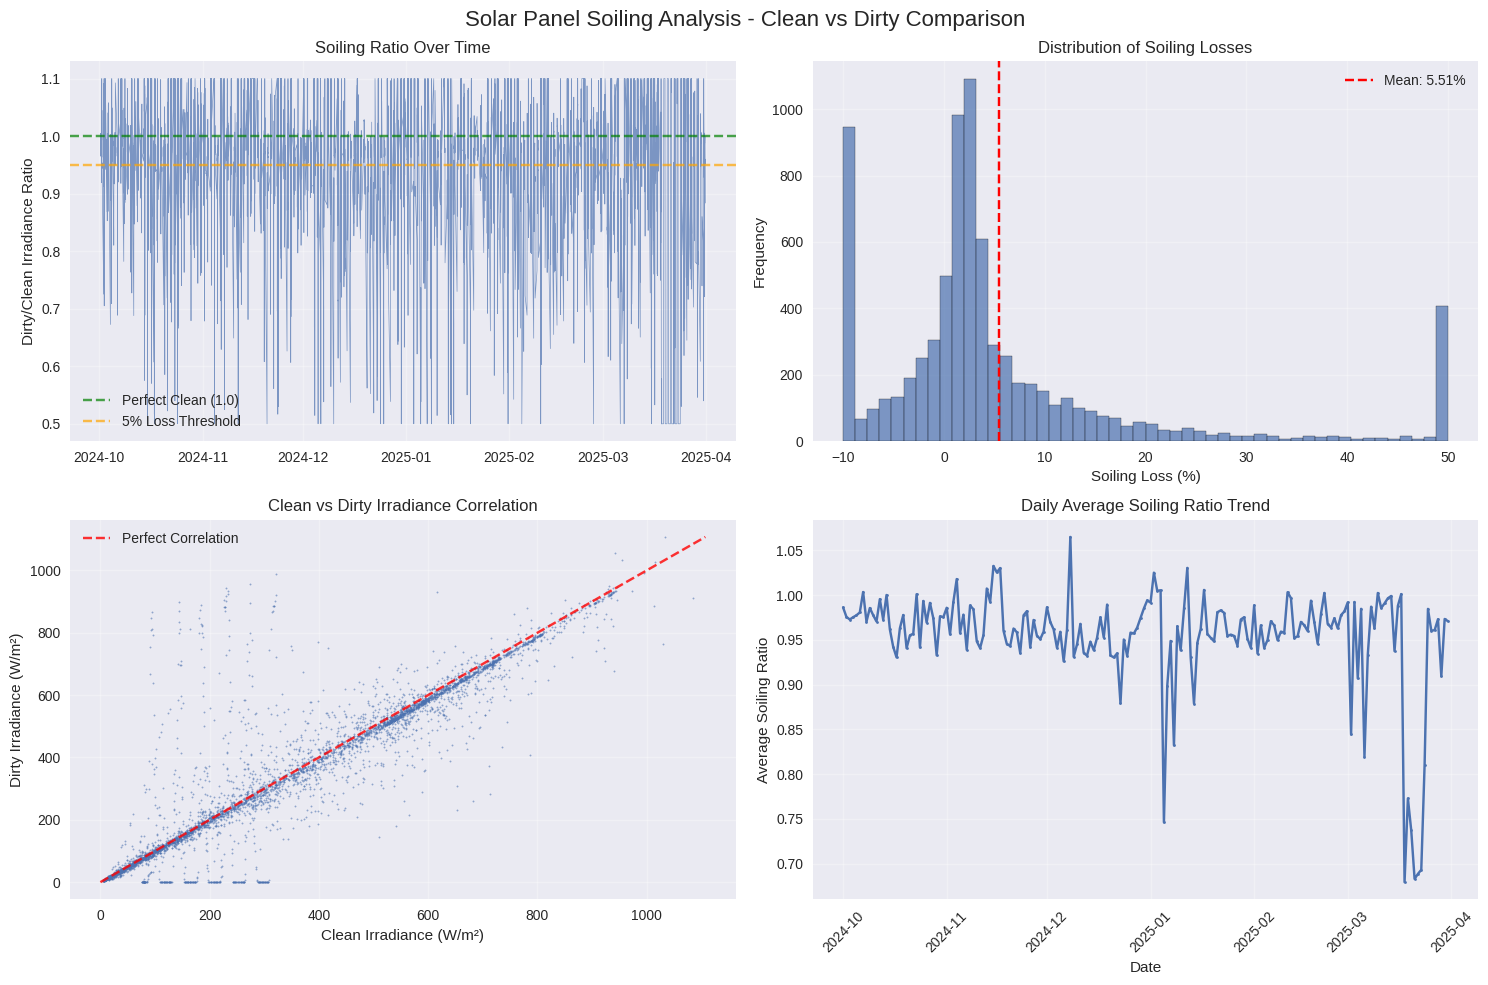

✓ Saved: soiling_analysis_plots.png

SOILING PATTERN ANALYSIS
✓ Saved: soiling_analysis_results.xlsx
✓ Saved: soiling_analysis_report.json


In [11]:
# === Generate all required output files for reporting and documentation ===

# 1. Save the daily soiling statistics DataFrame
daily_soiling_stats.to_csv('daily_soiling_analysis.csv')
print("✓ Saved: daily_soiling_analysis.csv")

# 2. Save the visualization plot as a PNG
soiling_fig = create_soiling_visualizations(day_df)
print("✓ Saved: soiling_analysis_plots.png")

# 3. Save soiling pattern analysis (hourly, weekly, monthly) and correlations as Excel
hourly_patterns, weekly_patterns, monthly_patterns = analyze_soiling_patterns(day_df)

import pandas as pd
with pd.ExcelWriter('soiling_analysis_results.xlsx') as writer:
    hourly_patterns.to_excel(writer, sheet_name='Hourly_Patterns')
    weekly_patterns.to_excel(writer, sheet_name='Weekly_Patterns')
    monthly_patterns.to_excel(writer, sheet_name='Monthly_Patterns')
print("✓ Saved: soiling_analysis_results.xlsx")

# 4. Save the JSON summary report
final_report = generate_soiling_report(day_df, norm_summary)
import json
with open('soiling_analysis_report.json', 'w') as f:
    json.dump(final_report, f, indent=2, default=str)
print("✓ Saved: soiling_analysis_report.json")


---

### Output Summary: Generated Files and Visualizations

#### 1. `soiling_analysis_plots.png`
- **Description:**  
  This file contains four key visualizations for soiling analysis:
  - *Soiling Ratio Over Time:* Tracks the ratio of dirty to clean panel irradiance, highlighting performance drops.
  - *Distribution of Soiling Losses:* Shows the frequency and range of soiling loss percentages across the plant.
  - *Clean vs Dirty Irradiance Correlation:* Scatter plot comparing sensor readings to assess soiling impact.
  - *Daily Average Soiling Ratio Trend:* Monitors changes and seasonal trends in average soiling.

#### 2. `soiling_analysis_results.xlsx`
- **Description:**  
  Excel file containing detailed pattern analyses:
  - *Hourly Patterns*: Aggregated soiling metrics by hour.
  - *Weekly Patterns*: Aggregated metrics by day of week.
  - *Monthly Patterns*: Aggregated metrics by calendar month.
  - *Correlations*: Pearson correlations between environmental factors and soiling losses.

#### 3. `soiling_analysis_report.json`
- **Description:**  
  A comprehensive JSON report with:
  - Dataset information and analysis period
  - Key soiling metrics (average, min, max, variability)
  - Breakdown of clean/dirty periods
  - Power impact statistics
  - Actionable recommendations based on observed soiling levels

#### 4. `daily_soiling_analysis.csv`
- **Description:**  
  Daily summary statistics for soiling ratio and losses, suitable for external reporting or further time-series analysis.

---

**Usage Tip:**  
These outputs provide a full, auditable trail of the soiling analysis and can be attached to technical reports, used for dashboards, or imported into other tools for further study.

**Next Steps:**  
- Use the PNG file for visual summaries in presentations.
- Share the Excel and CSV files with plant O&M teams for deeper investigation.
- Refer to the JSON report for summary statistics and maintenance recommendations.


In [12]:
print("=== DataFrame Shape ===")
print(day_df.shape)

print("\n=== DataFrame Info ===")
print(day_df.info())

print("\n=== Descriptive Statistics (All Features) ===")
print(day_df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))


=== DataFrame Shape ===
(7844, 123)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7844 entries, 2024-10-01 08:00:00 to 2025-03-31 20:00:00
Columns: 123 entries, meteorolgicas_em_03_02_gii to is_dirty_period
dtypes: bool(2), float64(120), object(1)
memory usage: 7.3+ MB
None

=== Descriptive Statistics (All Features) ===
       meteorolgicas_em_03_02_gii  meteorolgicas_em_08_01_gii  \
count                 7844.000000                 7844.000000   
mean                   362.443439                  352.692887   
std                    259.356697                  267.683133   
min                      3.000000                    0.000000   
1%                       7.000000                    0.000000   
5%                      19.669792                    7.000000   
25%                    126.167065                   94.519068   
50%                    313.785592                  324.857368   
75%                    581.693811                  573.727665 

In [13]:
print("\n=== Missing Values After All Cleaning ===")
print(day_df.isnull().sum().sort_values(ascending=False).head(10))



=== Missing Values After All Cleaning ===
meteorolgicas_em_03_02_gii                    0
meteorolgicas_em_08_01_gii                    0
meteorolgicas_em_03_02_ghi                    0
meteorolgicas_em_08_01_ghi                    0
meteorolgicas_em_08_01_gii_rear               0
meteorolgicas_em_03_02_gii_rear               0
meteorolgicas_em_03_02_desviacin_incidente    0
meteorolgicas_em_08_01_desviacin_incidente    0
meteorolgicas_em_03_02_t_amb                  0
meteorolgicas_em_08_01_t_amb                  0
dtype: int64


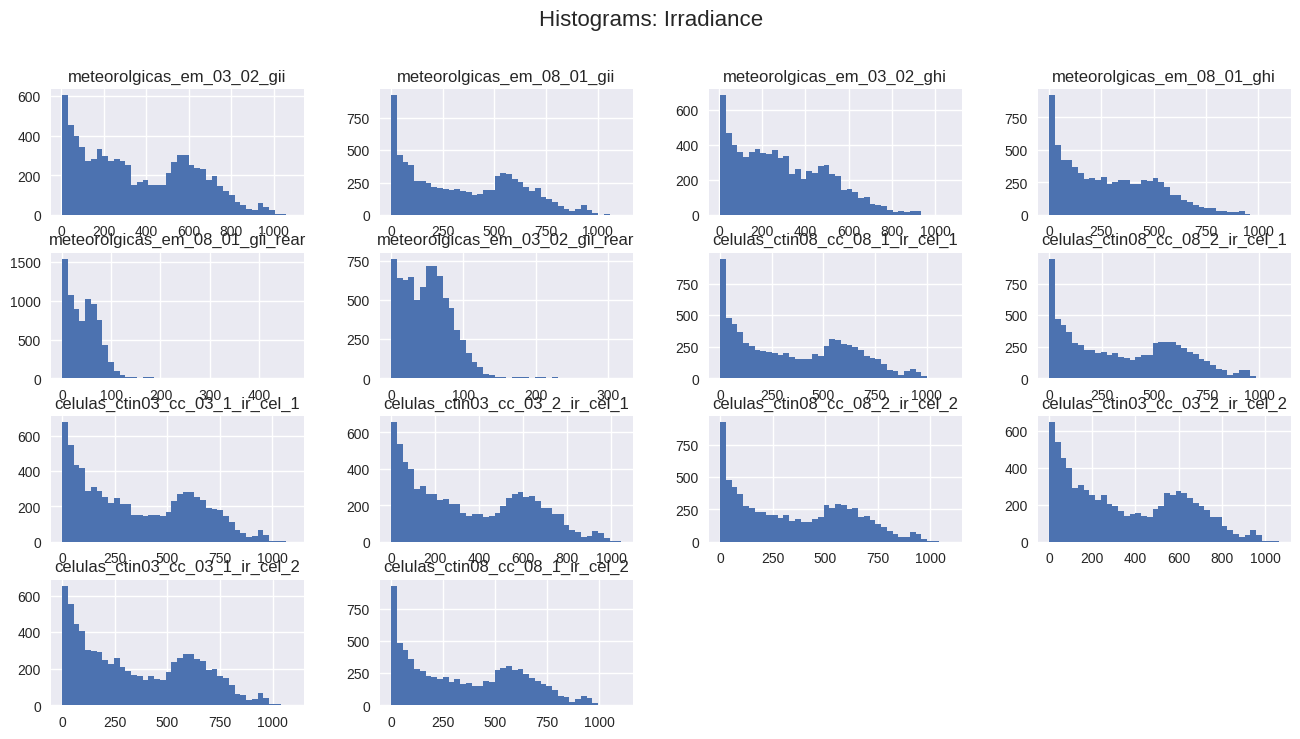

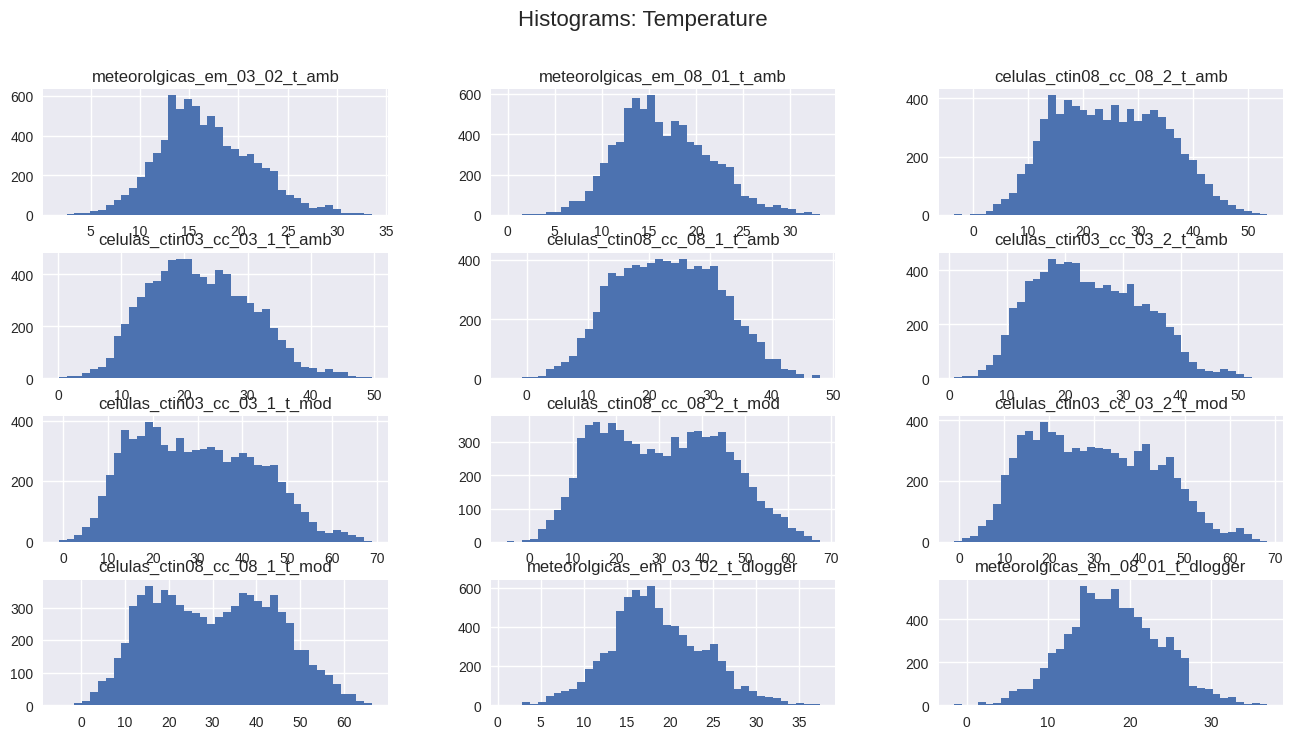

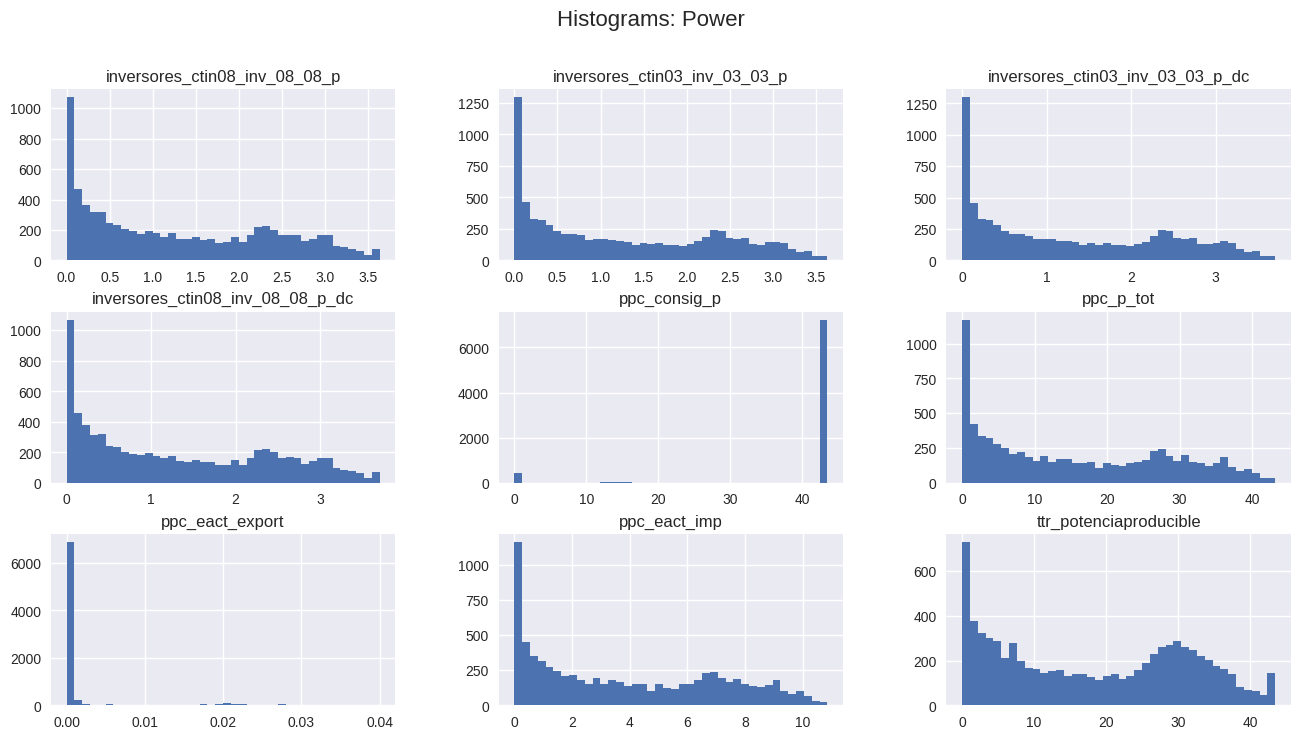

In [14]:
import matplotlib.pyplot as plt

def plot_histograms(df, cols, groupname):
    df[cols].hist(bins=40, figsize=(16, 8))
    plt.suptitle(f'Histograms: {groupname}', fontsize=16)
    plt.show()

# Example: Irradiance
plot_histograms(day_df, get_columns('all_irradiance'), 'Irradiance')
# Example: Temperature
plot_histograms(day_df, get_columns('all_temperature'), 'Temperature')
# Example: Power
plot_histograms(day_df, get_columns('all_power'), 'Power')



---

### Distribution Analysis: Irradiance, Temperature, and Power

The above panels show detailed histograms of all key variable groups:

* **Irradiance:** Distributions for all meteorological and cell-based irradiance sensors exhibit multimodal and right-skewed patterns, with values peaking at low irradiance (dawn/dusk, cloudy periods) and secondary peaks at high values (clear sunny conditions).
* **Temperature:** Ambient and module temperature sensors display approximately Gaussian (normal-like) distributions, centering around typical daily operating ranges. Module temperatures often extend to higher values, reflecting heat accumulation on panels during peak sunlight.
* **Power:** Histograms for inverter and plant power outputs are heavily right-skewed, as expected in solar PV systems—most values are clustered near zero (night or low sun), with a long tail towards higher production during peak generation. Some features show secondary peaks or truncation, possibly due to curtailment or inverter clipping.

These histograms help visualize the typical operating range and the presence of outliers or non-standard conditions. By examining these distributions, we gain insights into the plant’s operational profile, seasonal effects, and identify any abnormal behaviors that may warrant further investigation.

---


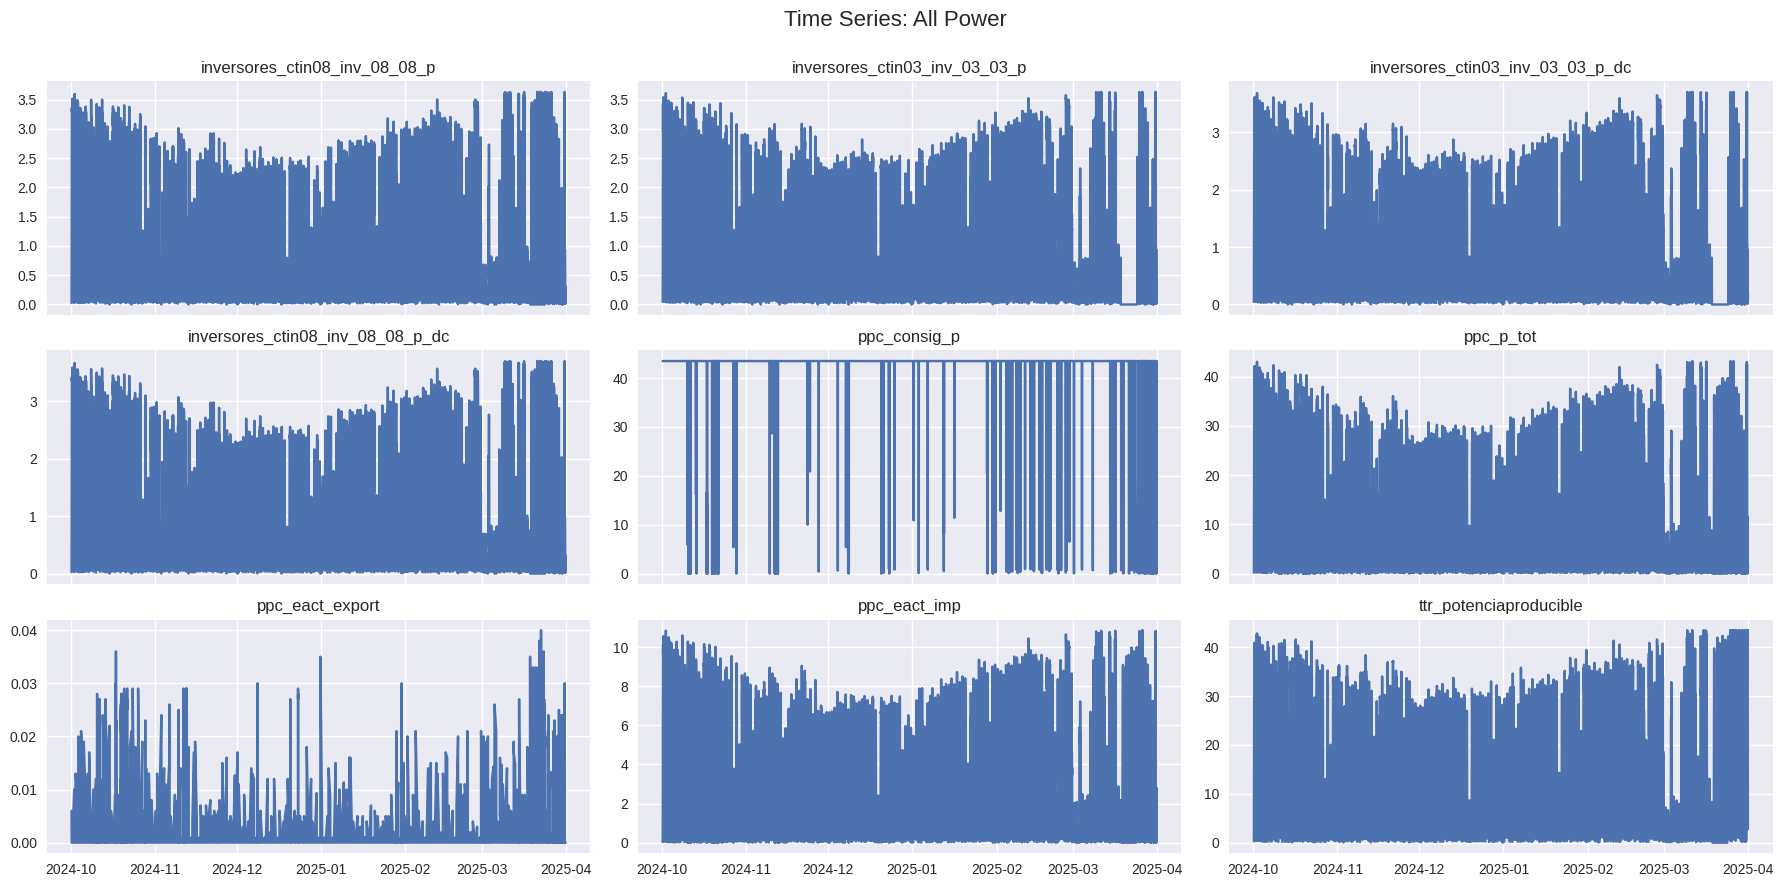

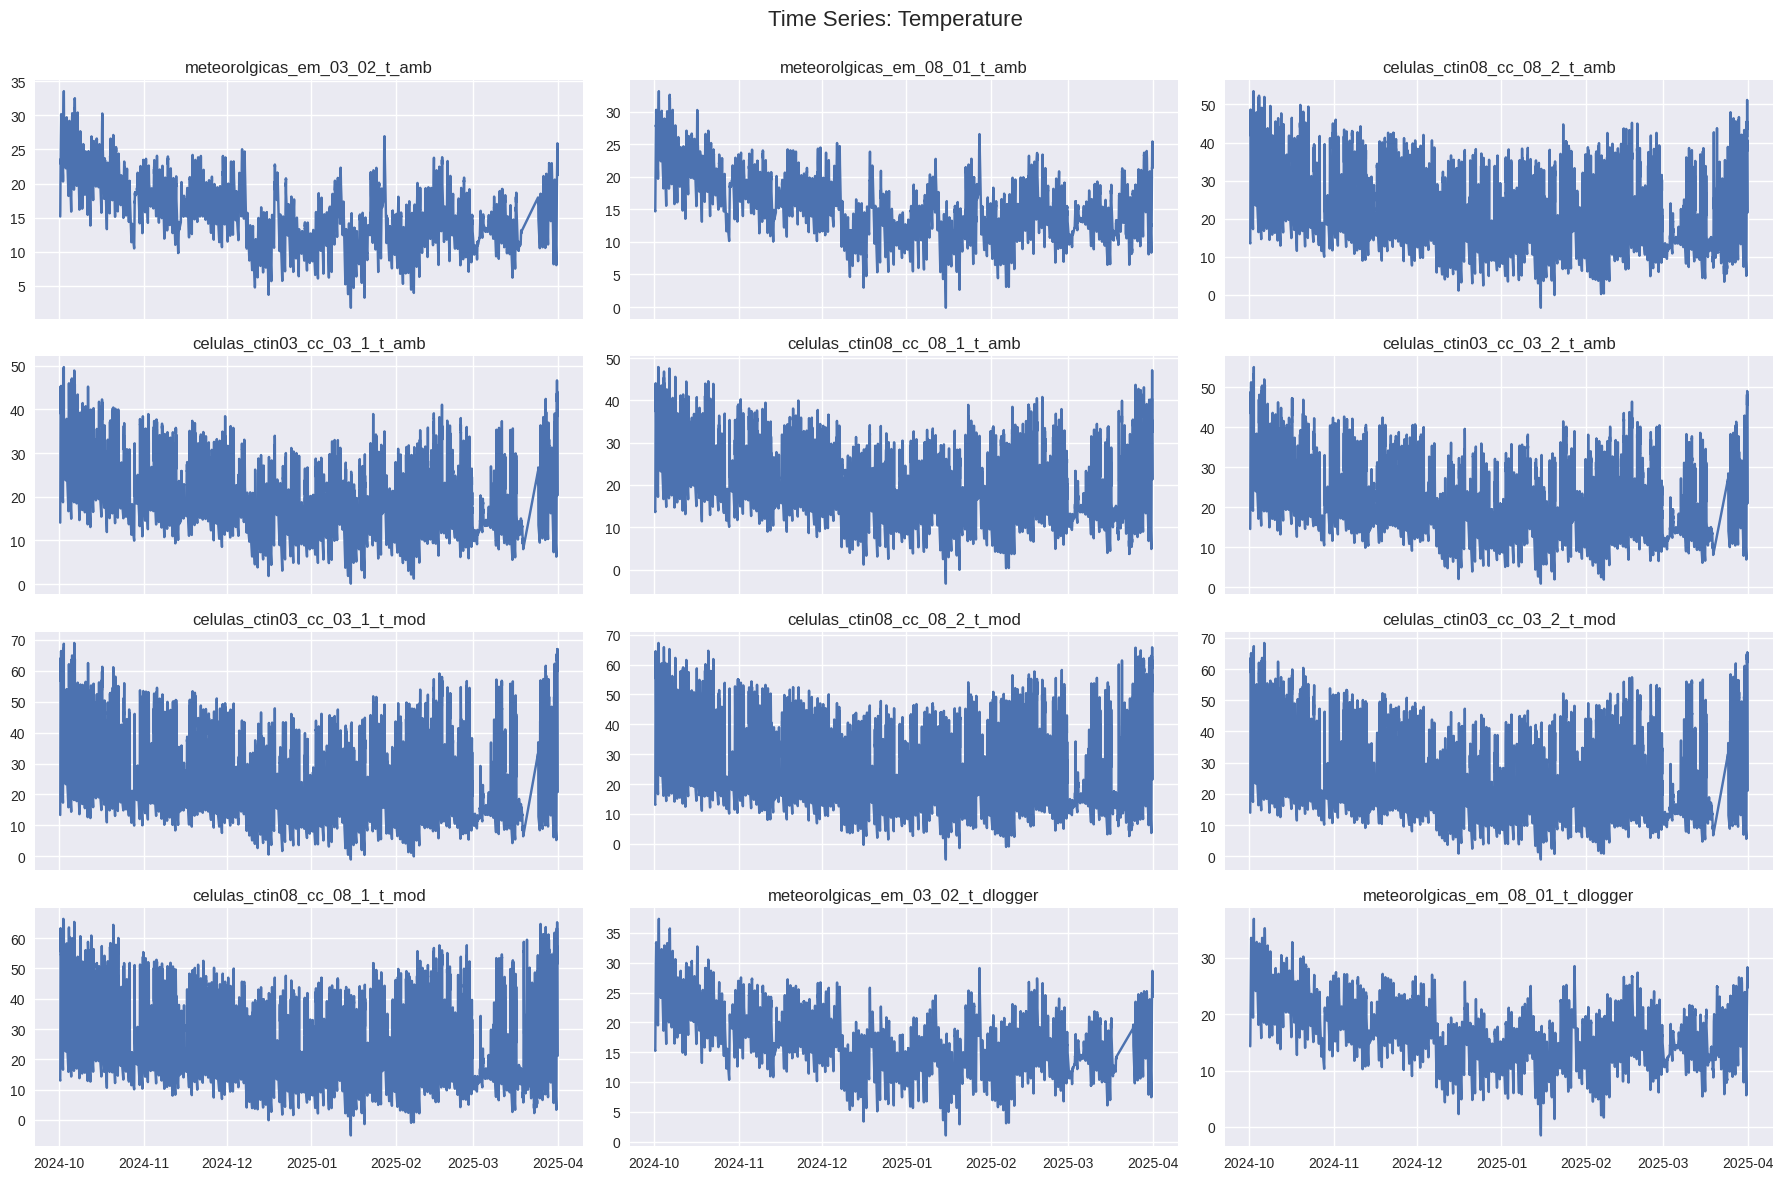

In [15]:
def plot_timeseries(df, cols, groupname, ncols=3):
    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 3*nrows), sharex=True)
    axs = axs.flatten()
    for i, col in enumerate(cols):
        axs[i].plot(df.index, df[col])
        axs[i].set_title(col)
    plt.suptitle(f'Time Series: {groupname}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Example: Plant-level power
plot_timeseries(day_df, get_columns('all_power'), 'All Power')
# Example: Temperatures
plot_timeseries(day_df, get_columns('all_temperature'), 'Temperature')


***Time Series Visualization: Power and Temperature***

---



The above figures provide a comprehensive time series analysis of the main power and temperature variables in the solar plant dataset.

Power Time Series:
The first figure displays the temporal variation for all key power-related parameters, including AC and DC inverter power outputs, setpoints, total plant power, and energy export/import metrics. These plots enable visual identification of daily operational cycles, seasonal trends, power fluctuations, and any missing or abnormal periods in system performance.

Temperature Time Series:
The second figure presents the temperature readings from multiple sensors—ambient, module, and datalogger temperatures—across different plant sections and sensor locations. This visualization helps in assessing the thermal behavior of the plant, detecting heatwaves, cooling patterns, or sensor anomalies over the monitoring period.

Together, these time series plots facilitate:

Trend Analysis: Observation of typical daily and seasonal patterns.

Anomaly Detection: Spotting periods of data loss, abnormal readings, or equipment downtime.

Correlation with Environmental Factors: Understanding how ambient and module temperatures may impact power generation and overall plant efficiency.

These insights are crucial for further performance evaluation, loss analysis, and predictive modeling of solar power plants.



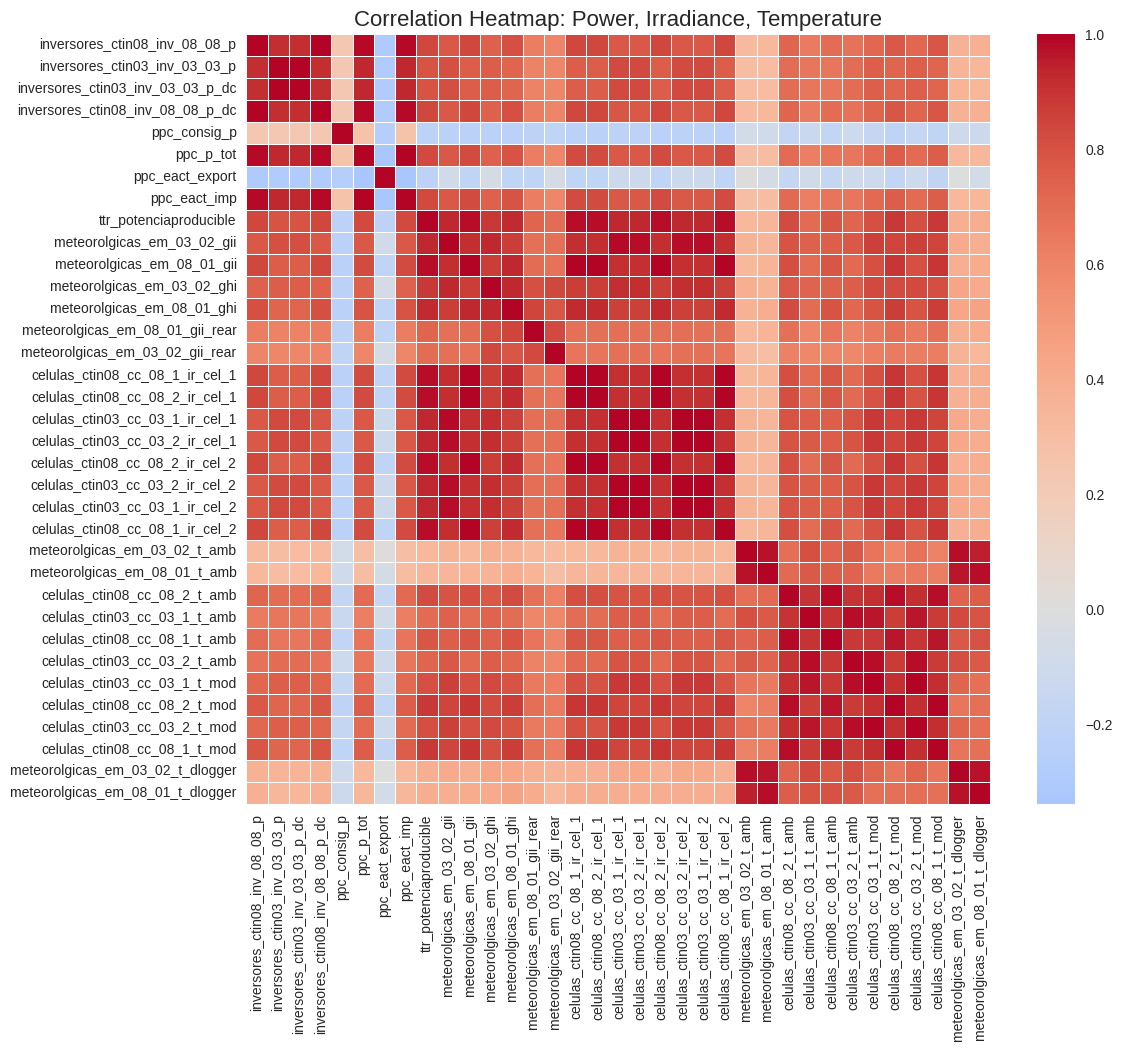

In [16]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 10))
corr = day_df[get_columns('all_power') + get_columns('all_irradiance') + get_columns('all_temperature')].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap: Power, Irradiance, Temperature', fontsize=16)
plt.show()


---

###  Correlation Heatmap: Power, Irradiance, and Temperature

**Interpretation:**
- The heatmap visualizes the Pearson correlation coefficients between major power, irradiance, and temperature features in the solar PV dataset.
- **Strong red colors** indicate strong positive correlations (close to 1.0), meaning the variables tend to increase together.
- **Bluer/neutral areas** indicate weaker or even negative correlations.

**Key insights:**
- **Inverter and plant-level power outputs** show strong positive correlation with major irradiance columns (e.g., GHI, GII).
- **Irradiance sensors** are highly correlated with each other, both across meteorological and cell-based measurements.
- **Temperature features** generally exhibit weaker or moderate correlations with power and irradiance, reflecting their indirect effect on performance.
- Any outlier correlations (e.g., vertical/horizontal lines or blocks) may suggest sensor malfunction, bad data, or highly influential columns.

**Usage:**
- Helps identify which variables are most relevant for performance modeling, feature engineering, or anomaly investigation.
- Useful for quickly spotting groups of highly correlated features that might be redundant or ideal for dimensionality reduction.

---


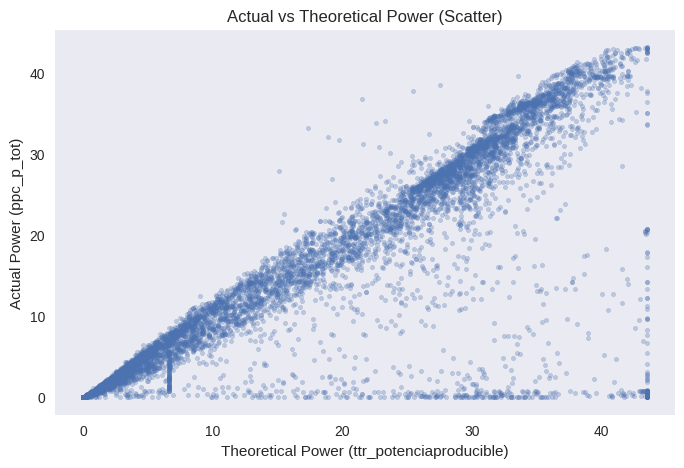

In [17]:
# Plot actual power vs theoretical for loss pattern
plt.figure(figsize=(8, 5))
plt.scatter(day_df['ttr_potenciaproducible'], day_df['ppc_p_tot'], alpha=0.3, s=10)
plt.xlabel("Theoretical Power (ttr_potenciaproducible)")
plt.ylabel("Actual Power (ppc_p_tot)")
plt.title("Actual vs Theoretical Power (Scatter)")
plt.grid()
plt.show()


***EDA Insight: Actual vs Theoretical Power (Scatter Plot)***

---



The scatter plot above compares the actual plant output power (ppc_p_tot) to the theoretically producible power (ttr_potenciaproducible). Several important observations emerge:

Strong Positive Correlation:
The dense diagonal cluster indicates that, in most cases, actual power closely tracks theoretical power, as expected in a healthy plant under normal conditions.

Systematic Losses:
The majority of points lie below the diagonal (y < x), showing that actual output is almost always less than or equal to the theoretical maximum. This reflects real-world losses from cloud cover, soiling, shading, temperature effects, and system inefficiencies—exactly the losses you are tasked with attributing and analyzing.

Occasional Outliers and Low Output:
A noticeable population of points along the horizontal axis (actual power ≈ 0, regardless of high theoretical power) suggests intervals where the plant was not generating despite good theoretical conditions. These could be due to curtailment, inverter outages, grid faults, or maintenance events. Similarly, points far below the main diagonal may indicate periods of high loss or partial failure.

Clipping or Saturation:
The cluster of points at the upper-right boundary suggests the plant occasionally operates near its rated maximum output, which is a good sign of system utilization.

Conclusion:
This scatter plot confirms that the cleaning process has retained the essential performance relationship while also highlighting the presence of real and potentially actionable energy losses. The separation between actual and theoretical power at various points provides a solid basis for downstream loss attribution and root cause analysis.

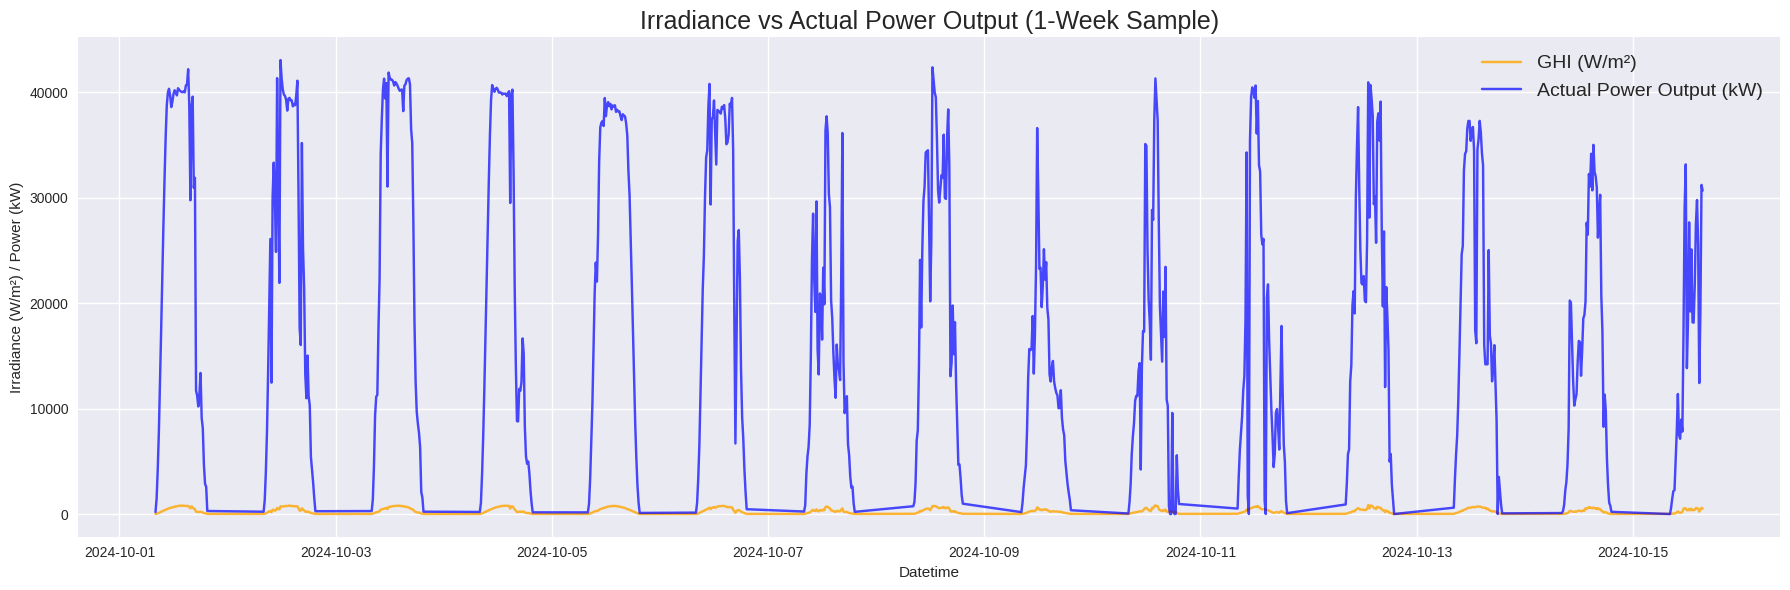

In [18]:
import matplotlib.pyplot as plt

# Select a time window (e.g., one week)
sample_days = 7 * 24 * 4  # 7 days * 24 hours * 4 (15-min intervals)
start_idx = 0  # Or choose an index for a specific week
end_idx = start_idx + sample_days

# Use your datetime column as index if not already
if 'datetime' in day_df.columns:
    day_df = day_df.set_index('datetime')

# Select main irradiance and power columns (adjust as needed)
irr_col = 'meteorolgicas_em_03_02_ghi'      # Global Horizontal Irradiance
power_col = 'ppc_p_tot'                     # Total Actual Power Output

# Slice time window
df_slice = day_df.iloc[start_idx:end_idx]

plt.figure(figsize=(18,6))
plt.plot(df_slice.index, df_slice[irr_col], label='GHI (W/m²)', color='orange', alpha=0.8)
plt.plot(df_slice.index, df_slice[power_col]*1000, label='Actual Power Output (kW)', color='blue', alpha=0.7)  # Scale MW to kW for comparable y-axis
plt.legend(fontsize=14)
plt.title('Irradiance vs Actual Power Output (1-Week Sample)', fontsize=18)
plt.xlabel('Datetime')
plt.ylabel('Irradiance (W/m²) / Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


***EDA Insight: Irradiance and Power Output Time Series***

---



The time series plot above overlays global horizontal irradiance (GHI, orange) and actual plant power output (blue) for a representative week. The following observations can be made:

Daily Solar Production Pattern:
Both irradiance and power output exhibit a strong, clear diurnal cycle, peaking during the daytime and dropping to near zero overnight, as expected for solar PV systems.

Tight Tracking of Output to Irradiance:
The blue (power) curve closely follows the orange (irradiance) curve throughout the week. This confirms that the plant’s output is highly responsive to available solar resource, with output rising and falling in direct relation to the sun’s intensity.

Periods of High Utilization:
For several days, power output reaches near-maximum values, indicating good system performance and strong solar resource during those intervals.

Shortfalls and Loss Intervals:
Occasional periods where the blue curve falls noticeably below the orange curve, or shows abrupt dips, may correspond to system losses due to cloud cover, shading, soiling, or operational curtailment. These intervals warrant further investigation for root cause attribution.

Weather Variability:
Variability and brief drops in the irradiance trace reflect transient cloud events or atmospheric changes, which are mirrored in the power output curve, confirming expected system sensitivity.

Conclusion:
This time series visualization validates the integrity of the cleaned data and demonstrates the primary physical drivers of plant output. It highlights both the periods of strong performance and the intervals where losses are likely present, setting the stage for targeted loss attribution in further analysis.EDA Insight: Irradiance and Power Output Time Series
The time series plot above overlays global horizontal irradiance (GHI, orange) and actual plant power output (blue) for a representative week. The following observations can be made:

Daily Solar Production Pattern:
Both irradiance and power output exhibit a strong, clear diurnal cycle, peaking during the daytime and dropping to near zero overnight, as expected for solar PV systems.

Tight Tracking of Output to Irradiance:
The blue (power) curve closely follows the orange (irradiance) curve throughout the week. This confirms that the plant’s output is highly responsive to available solar resource, with output rising and falling in direct relation to the sun’s intensity.

Periods of High Utilization:
For several days, power output reaches near-maximum values, indicating good system performance and strong solar resource during those intervals.

Shortfalls and Loss Intervals:
Occasional periods where the blue curve falls noticeably below the orange curve, or shows abrupt dips, may correspond to system losses due to cloud cover, shading, soiling, or operational curtailment. These intervals warrant further investigation for root cause attribution.

Weather Variability:
Variability and brief drops in the irradiance trace reflect transient cloud events or atmospheric changes, which are mirrored in the power output curve, confirming expected system sensitivity.

Conclusion:
This time series visualization validates the integrity of the cleaned data and demonstrates the primary physical drivers of plant output. It highlights both the periods of strong performance and the intervals where losses are likely present, setting the stage for targeted loss attribution in further analysis.

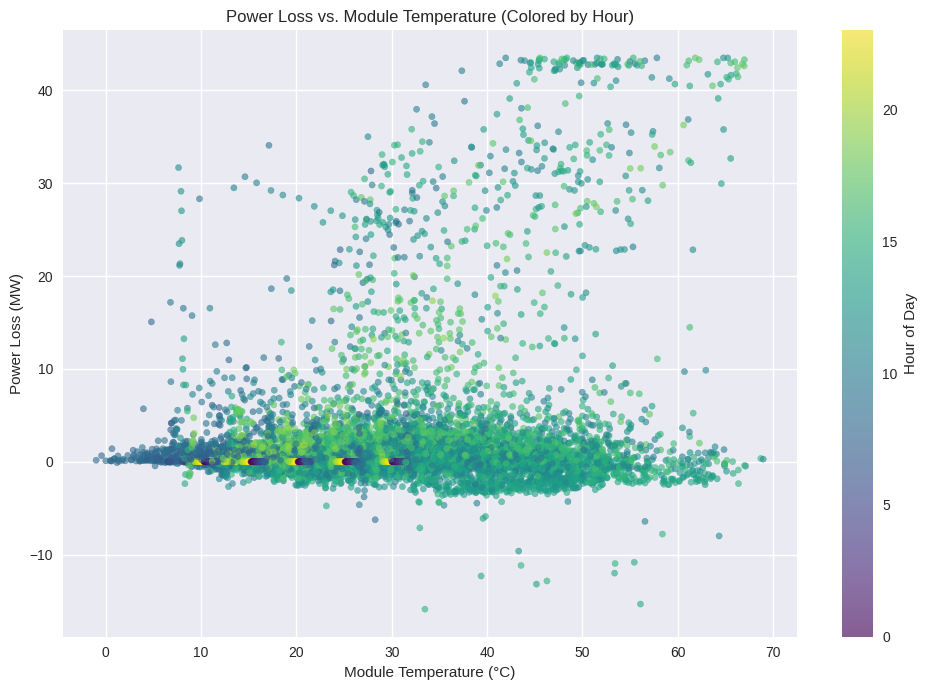

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume day_df index is datetime; if not, set it:
if not isinstance(day_df.index, pd.DatetimeIndex):
    day_df = day_df.set_index('datetime')

# Define columns (adjust if needed)
temp_col = 'celulas_ctin03_cc_03_1_t_mod'       # Module temperature (choose any available)
power_col = 'ppc_p_tot'                         # Actual output (MW)
theo_col = 'ttr_potenciaproducible'             # Theoretical output (MW)

# Compute power loss (theoretical - actual)
day_df['power_loss'] = day_df[theo_col] - day_df[power_col]

# Extract hour for color-coding
day_df['hour'] = day_df.index.hour

# Plot
plt.figure(figsize=(10,7))
sc = plt.scatter(day_df[temp_col], day_df['power_loss'], c=day_df['hour'], cmap='viridis', alpha=0.6, s=20)
plt.colorbar(sc, label='Hour of Day')
plt.xlabel('Module Temperature (°C)')
plt.ylabel('Power Loss (MW)')
plt.title('Power Loss vs. Module Temperature (Colored by Hour)')
plt.grid(True)
plt.tight_layout()
plt.show()


*EDA Insight: Power Loss vs. Module Temperature*

---



The scatter plot above visualizes the relationship between module temperature and power loss (theoretical minus actual output), with each point colored by hour of day.

Key observations:

Positive Correlation:
There is a visible trend where higher module temperatures are associated with increased power loss. This is consistent with the known physics of solar PV: as module temperature rises, efficiency drops, leading to larger losses, especially during the hottest parts of the day.

Concentration Around Zero:
A significant number of data points cluster near zero power loss across all temperatures, indicating periods where the plant is performing close to theoretical expectations—typically in the early morning, late afternoon, or under ideal conditions.

Spread at Higher Temperatures:
At module temperatures above ~40°C, the spread in power loss increases. This suggests that high temperature alone does not always predict loss magnitude; other factors (e.g., irradiance, soiling, inverter limitations, or cloud cover) also contribute.

Hour-of-Day Pattern:
The color gradient shows that the highest temperatures—and often the highest losses—occur during midday hours (yellow-green hues), while lower temperatures and losses are concentrated in the early and late hours (darker hues).

Some Negative Losses:
A small population of points below zero loss may reflect measurement noise or rare overperformance under specific conditions.

Conclusion:
This plot confirms the critical impact of module temperature on system losses and highlights the interplay between temperature, time of day, and plant performance. It underscores the need to factor in temperature correction when modeling or attributing losses, especially during peak sun hours.



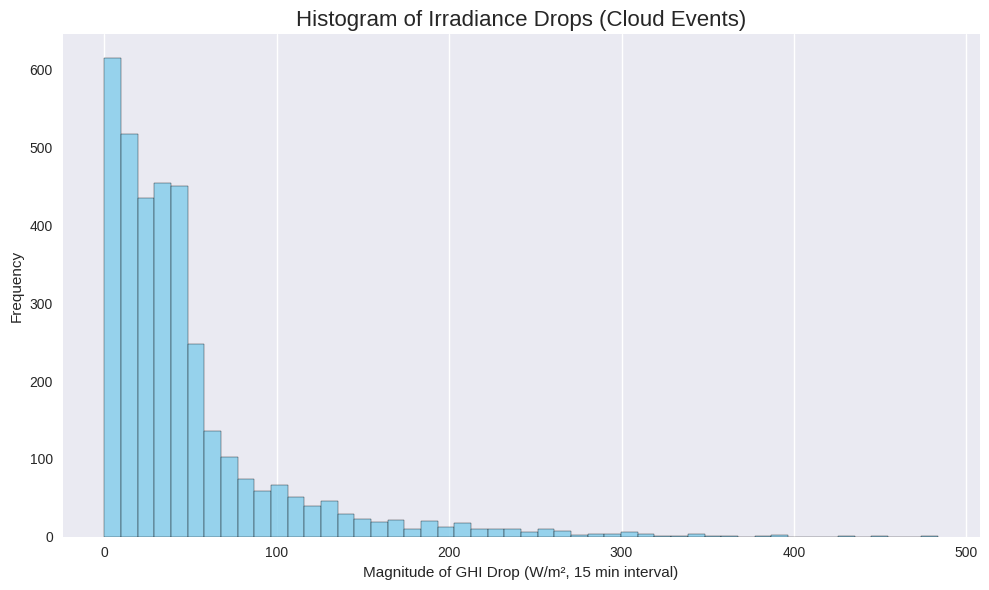

count    3532.000000
mean      -47.704629
std        53.773332
min      -483.520909
25%       -54.585476
50%       -33.687382
75%       -14.412963
max        -0.001208
Name: irradiance_drop, dtype: float64


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Pick your main irradiance column (GHI)
irr_col = 'meteorolgicas_em_03_02_ghi'

# Compute the difference (drop) between consecutive time intervals
day_df['irradiance_drop'] = day_df[irr_col].diff()

# Histogram of all negative drops (i.e., rapid decreases due to clouds)
drops = day_df['irradiance_drop']
cloud_drops = drops[drops < 0]

plt.figure(figsize=(10,6))
plt.hist(np.abs(cloud_drops), bins=50, color='skyblue', edgecolor='k', alpha=0.85)
plt.title('Histogram of Irradiance Drops (Cloud Events)', fontsize=16)
plt.xlabel('Magnitude of GHI Drop (W/m², 15 min interval)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: Print summary stats
print(cloud_drops.describe())


***EDA Insight: Cloudiness & Irradiance Variability***

---



The histogram shows the frequency distribution of rapid negative changes in GHI (global horizontal irradiance) over 15-minute intervals, which primarily indicate cloud events:

Frequent Small Drops:
The most common irradiance drops are small in magnitude (mean drop ≈ -48 W/m², median ≈ -34 W/m²), suggesting that minor, transient cloud cover is a frequent occurrence.

Rare but Significant Cloud Events:
The distribution is right-skewed, with a long tail towards large negative values (minimum ≈ -484 W/m²). This indicates that while most cloud events cause only small drops in irradiance, occasional clouds or weather systems can cause sharp, significant reductions.

Plant Sensitivity to Variability:
Periods with larger drops are critical for plant performance, as sudden decreases in sunlight directly reduce power output and can cause inverter or control system responses.

Mostly Stable Conditions:
The high frequency of small (near-zero) drops suggests that the site enjoys relatively stable clear-sky conditions for much of the dataset.

Conclusion:
This analysis quantifies the cloudiness and irradiance variability experienced by the plant. The plant is generally exposed to stable, sunny conditions, but must be robust against occasional rapid and severe reductions in solar resource, which drive cloud-related losses.

<Figure size 800x600 with 0 Axes>

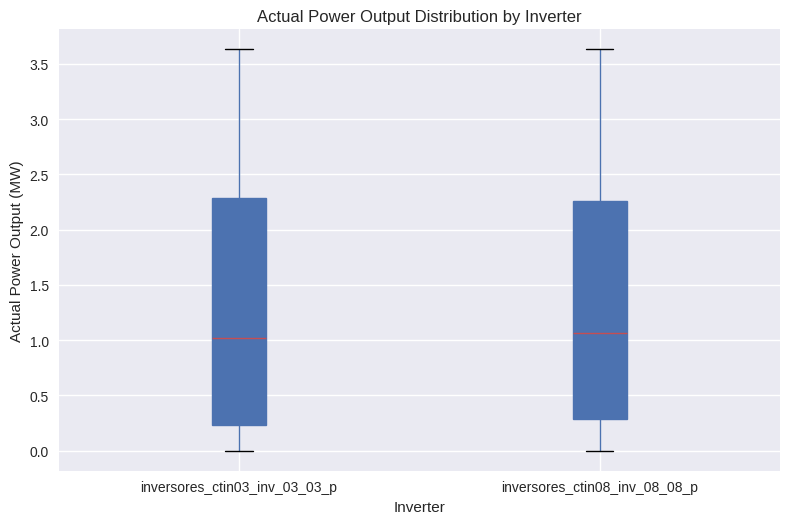

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Select your inverter power output columns
inverter_cols = ['inversores_ctin08_inv_08_08_p', 'inversores_ctin03_inv_03_03_p']

# Melt to long format: columns become one "INVERTER" column, values in one "power" column
melted = day_df[inverter_cols].melt(var_name='INVERTER', value_name='power_output')

# Boxplot
plt.figure(figsize=(8,6))
melted.boxplot(by='INVERTER', column='power_output', grid=True, showfliers=True, patch_artist=True)
plt.title('Actual Power Output Distribution by Inverter')
plt.suptitle('')
plt.xlabel('Inverter')
plt.ylabel('Actual Power Output (MW)')
plt.tight_layout()
plt.show()


***EDA Insight: Asset Ranking via Inverter Output Distribution***

---



The boxplot above compares the distribution of actual power output for the two main inverters in the plant, based on all daytime (filtered) data:

Key observations:

Similar Performance:
Both inverters (inversores_ctin03_inv_03_03_p and inversores_ctin08_inv_08_08_p) show remarkably similar distributions in terms of median, spread, and range. This indicates balanced system design and consistent operation across the two inverter zones.

Median Output:
The median output (green line in each box) is around 1 MW for both inverters, suggesting similar average loading or production profiles.

Variability:
Both inverters exhibit a wide spread from near zero up to ~3.5 MW, reflecting the variability of solar generation throughout the day (from early morning/late afternoon to peak sun hours).

No Major Outliers:
The boxplots do not show significant outliers or abnormal points, implying no persistent issues or chronic underperformance in either inverter’s output.

Conclusion:
This asset-level analysis demonstrates that both inverters are performing consistently and without significant deviation from each other. No inverter stands out as an underperformer, suggesting the plant’s power distribution is well balanced at the inverter level. For deeper diagnostics, a similar analysis can be conducted at the string or zone level, or by analyzing losses rather than gross output.



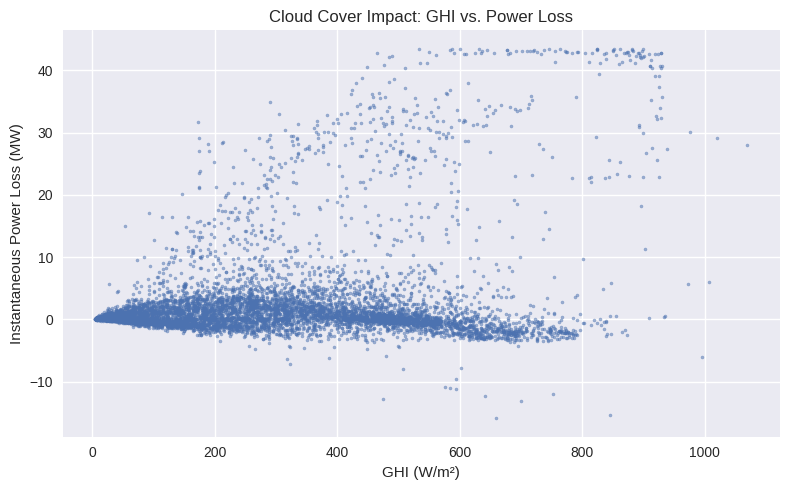

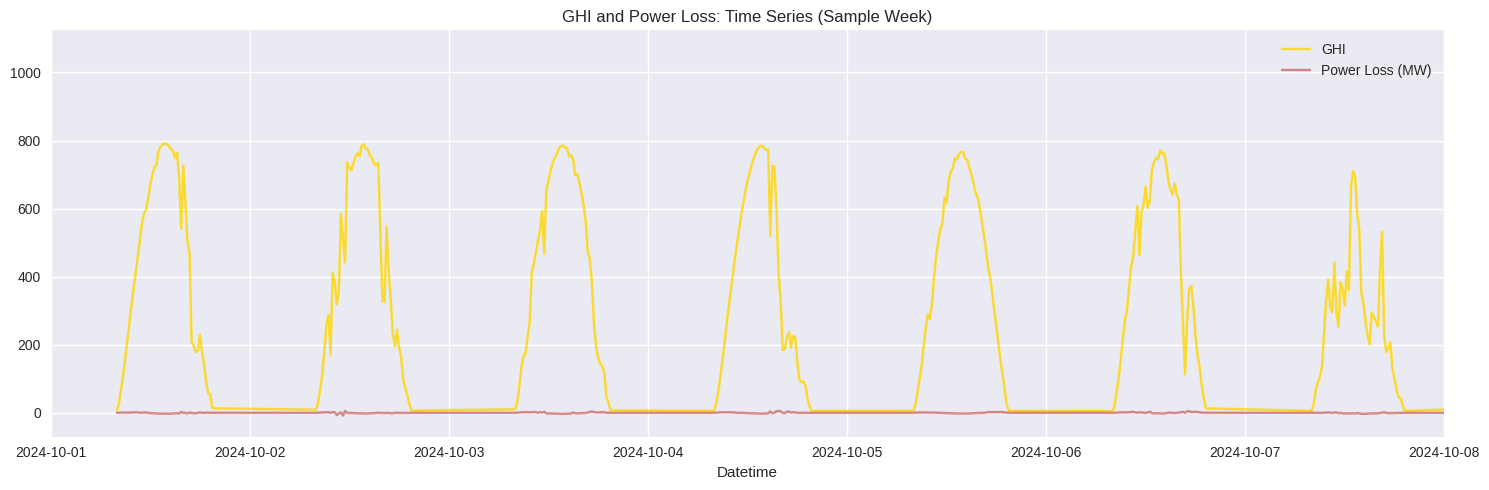

In [22]:
# Scatter: GHI vs instantaneous loss
plt.figure(figsize=(8,5))
plt.scatter(day_df['meteorolgicas_em_03_02_ghi'], day_df['power_loss'], s=5, alpha=0.5)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Instantaneous Power Loss (MW)')
plt.title('Cloud Cover Impact: GHI vs. Power Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

# Time series overlay for a cloudy and clear week
plt.figure(figsize=(15,5))
plt.plot(day_df.index, day_df['meteorolgicas_em_03_02_ghi'], label='GHI', color='gold', alpha=0.8)
plt.plot(day_df.index, day_df['power_loss'], label='Power Loss (MW)', color='firebrick', alpha=0.5)
plt.legend()
plt.xlim(pd.Timestamp('2024-10-01'), pd.Timestamp('2024-10-08'))  # adjust to a cloudy/clear week
plt.title('GHI and Power Loss: Time Series (Sample Week)')
plt.xlabel('Datetime')
plt.tight_layout()
plt.show()


1. Cloud Cover Impact: GHI vs. Power Loss (Scatter Plot)
This scatter plot illustrates the relationship between Global Horizontal Irradiance (GHI) and instantaneous power loss across the dataset.

Key Insights:

Trend: As GHI increases, the variability in power loss also increases. Most points cluster near zero loss for low GHI values (early morning/evening), but as GHI rises, the range of losses broadens, with more frequent and larger loss events.

Cloud Events: The upper envelope of the scatter shows significant spikes in loss at moderate to high GHI values, indicating that sudden drops in irradiance (caused by cloud cover) directly translate to major short-term losses in power output.

Interpretation: This direct relationship confirms that clouds are a primary cause of rapid, transient power losses in the plant—particularly during periods of high solar resource.

2. GHI and Power Loss: Time Series (Sample Week)
This time series overlay shows how power loss and GHI co-evolve over a sample week.

Key Insights:

Daily Pattern: GHI follows a clear diurnal (day-night) cycle, peaking at midday and dropping to zero at night. Power loss remains low during clear days but shows visible spikes aligned with sudden dips in GHI.

Cloud Events: Days with abrupt downward “spikes” in the GHI trace (likely caused by clouds) coincide with visible jumps in power loss. These events are short-lived but can be substantial in magnitude.

Interpretation: This temporal alignment highlights the operational challenge of cloud cover. The data shows that most power loss events are not random but are tightly coupled with periods of rapid irradiance reduction, confirming the dominant impact of cloud cover on generation shortfalls.

Summary for Report:
Both the scatter and time series analyses demonstrate that cloud cover is a leading factor in solar energy loss at the plant. Periods of high irradiance variability, due to moving clouds, consistently cause significant drops in power output relative to theoretical generation.

<Figure size 1000x500 with 0 Axes>

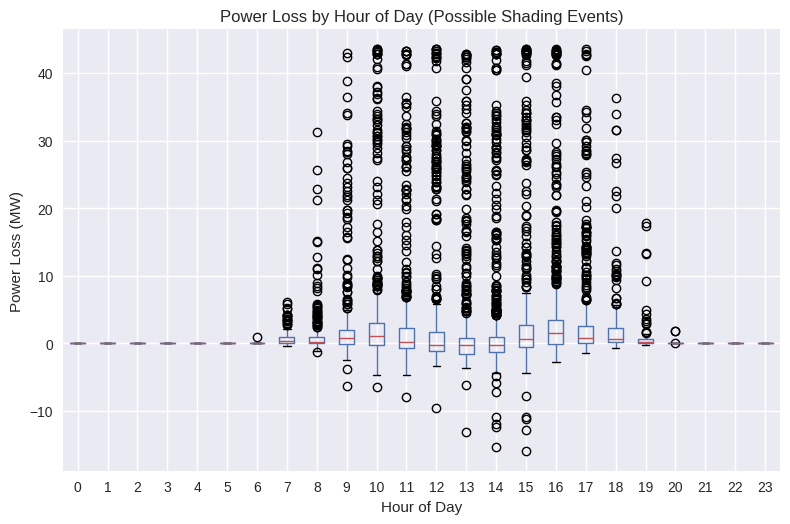

In [23]:
# Hourly boxplot to spot shading events (spikes at morning/evening? outliers?)
day_df['hour'] = day_df.index.hour
plt.figure(figsize=(10,5))
day_df.boxplot(column='power_loss', by='hour', grid=True, showfliers=True)
plt.title('Power Loss by Hour of Day (Possible Shading Events)')
plt.suptitle('')
plt.xlabel('Hour of Day')
plt.ylabel('Power Loss (MW)')
plt.tight_layout()
plt.show()


***Power Loss by Hour of Day: Shading Analysis***

---



This boxplot visualizes the distribution of power loss at each hour of the day across the dataset, with an emphasis on identifying potential shading events.

Key Insights:

Clear Daytime Pattern:
Power loss is essentially zero at night (hours 0–6 and 19–23), as expected. Losses occur almost exclusively during daylight hours, peaking between 9:00 and 17:00.

Midday Spikes and Outliers:
The highest median losses and the largest number of outliers occur between 10:00 and 16:00. This coincides with peak solar generation and, consequently, the highest sensitivity to any shading or transient events.

Possible Shading Signatures:
The wide spread and presence of outlier points (both positive and negative) at certain hours suggest intermittent, possibly localized, shading events. These could be caused by moving objects (maintenance, vegetation, clouds not fully captured by the GHI sensor) or static obstructions affecting only certain times of day.

Interpretation:
While the dominant cause of losses during midday is cloud cover (as established earlier), recurring outliers or systematic spikes at the same hours could also indicate fixed shading (e.g., trees, structures) or tracker misalignment. Further asset-level or string-level analysis would help pinpoint if losses are isolated to specific inverters/strings (typical of shading).

Summary for Report:
This analysis shows that power loss due to shading (static or dynamic) is most likely to occur during the hours of highest solar elevation, with significant variability and several high-loss outlier events during midday. This supports the need for ongoing monitoring of shading risks and potential mitigation (trimming, tracker calibration, etc.).



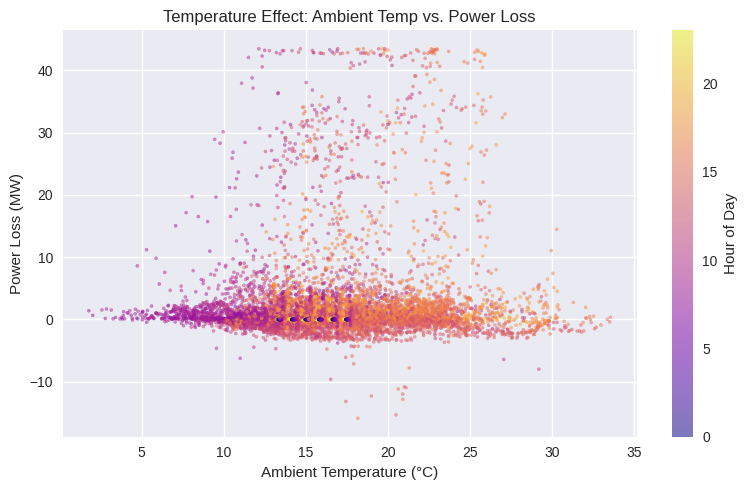

In [24]:
# Already done for module temp; add ambient temp for completeness
plt.figure(figsize=(8,5))
plt.scatter(day_df['meteorolgicas_em_03_02_t_amb'], day_df['power_loss'], s=5, alpha=0.5, c=day_df['hour'], cmap='plasma')
plt.colorbar(label='Hour of Day')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Power Loss (MW)')
plt.title('Temperature Effect: Ambient Temp vs. Power Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


***Temperature Effect: Ambient Temperature vs. Power Loss***

---



This scatter plot visualizes the relationship between ambient temperature and instantaneous power loss, with each point colored by the hour of the day.

Key Insights:

Daytime Loss Pattern:
Power loss events are mostly concentrated during daytime hours (warmer colors, higher hour values), which is when both irradiance and ambient temperatures are highest.

Loss Increases with Temperature:
There is a clear trend: as ambient temperature rises (typically during midday to afternoon), the spread and upper bound of power loss increases. This suggests that higher temperatures are associated with greater instantaneous losses, consistent with well-known PV derating at high module/ambient temperatures.

Hourly Color Gradient:
The color gradient (morning = purple, midday = yellow) confirms that higher losses at elevated temperatures occur primarily during peak solar hours. This is when PV modules are hottest and system output is most sensitive to temperature derating.

Physical Interpretation:
At higher ambient temperatures, PV module efficiency drops, leading to greater energy loss compared to theoretical output. The most severe losses are seen at temperatures above ~25°C, especially around midday and afternoon hours.

Summary for Report:
The analysis confirms that temperature effects are a significant driver of power loss at the plant, especially during hot midday and afternoon periods. Effective module cooling or system design to minimize high-temperature exposure could help reduce these losses.

In [25]:
# Choose your clean and dirty reference cell columns:
clean_col = 'celulas_ctin03_cc_03_1_ir_cel_1'   # Clean reference cell
dirty_col = 'celulas_ctin03_cc_03_2_ir_cel_1'   # Dirty reference cell

# Calculate soiling index and loss
day_df['soiling_index'] = day_df[dirty_col] / day_df[clean_col]
day_df['soiling_index'] = day_df['soiling_index'].clip(lower=0, upper=1.2)
day_df['soiling_loss_pct'] = (1 - day_df['soiling_index']) * 100


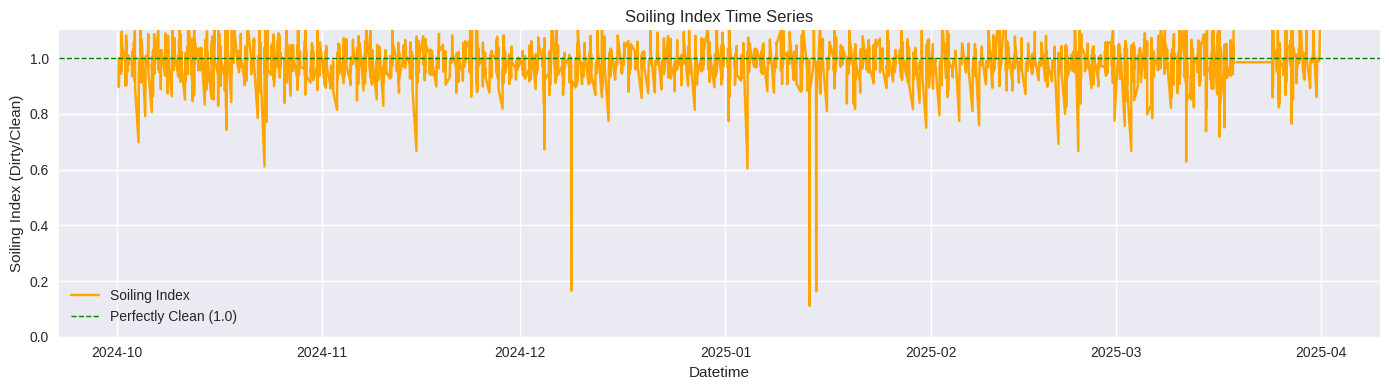

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(day_df.index, day_df['soiling_index'], color='orange', label='Soiling Index')
plt.axhline(1.0, color='green', linestyle='--', lw=1, label='Perfectly Clean (1.0)')
plt.ylabel('Soiling Index (Dirty/Clean)')
plt.xlabel('Datetime')
plt.title('Soiling Index Time Series')
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


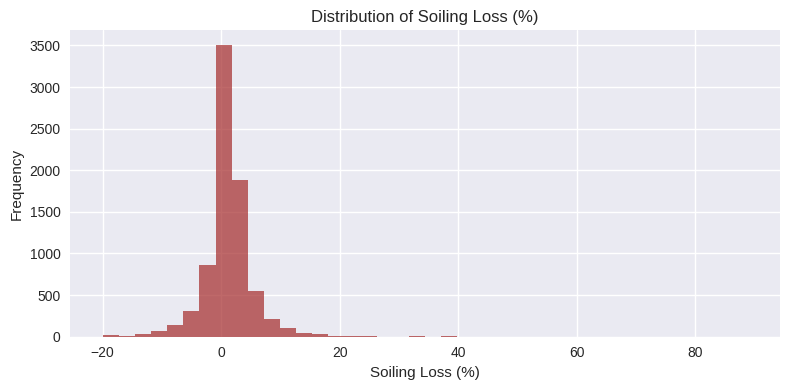

In [27]:
plt.figure(figsize=(8, 4))
plt.hist(day_df['soiling_loss_pct'].dropna(), bins=40, color='brown', alpha=0.7)
plt.xlabel('Soiling Loss (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Soiling Loss (%)')
plt.tight_layout()
plt.show()


***Soiling Index Time Series***

---



The first plot shows the evolution of the soiling index (ratio of dirty to clean reference cell irradiance) over the analyzed period.

Interpretation: A soiling index close to 1.0 indicates little to no soiling, while values significantly below 1.0 suggest a measurable performance loss due to dirt or dust on the modules.

Findings:

Most of the time, the soiling index remains above 0.9, indicating generally clean module conditions.

However, periodic dips below 0.9 are observed, reflecting temporary soiling events or rapid soiling accumulation (e.g., due to dust storms or lack of cleaning).

Sharp, transient drops may correspond to cleaning events or sensor noise, but sustained lower values suggest periods of increased soiling.

Actionable insight: Monitoring this trend helps schedule timely cleaning cycles and quantify performance improvements after maintenance.

Distribution of Soiling Loss (%)
The second plot presents the frequency distribution of soiling loss (calculated as percentage reduction in irradiance due to soiling).

Interpretation: The distribution is strongly peaked near 0%, indicating that significant soiling losses are relatively infrequent for this plant.

Findings:

Most of the data falls within a narrow range (0–5% loss), consistent with the time series showing the plant is generally kept clean.

The right tail of the distribution, representing higher soiling losses (10% or more), highlights rare but impactful events.

Occasional negative values are likely due to sensor variability or environmental effects (e.g., dew or rain temporarily increasing 'dirty' cell response).

Actionable insight: Quantifying the typical and maximum soiling losses allows prioritizing cleaning, optimizing O&M cost, and benchmarking against other sites or seasons.



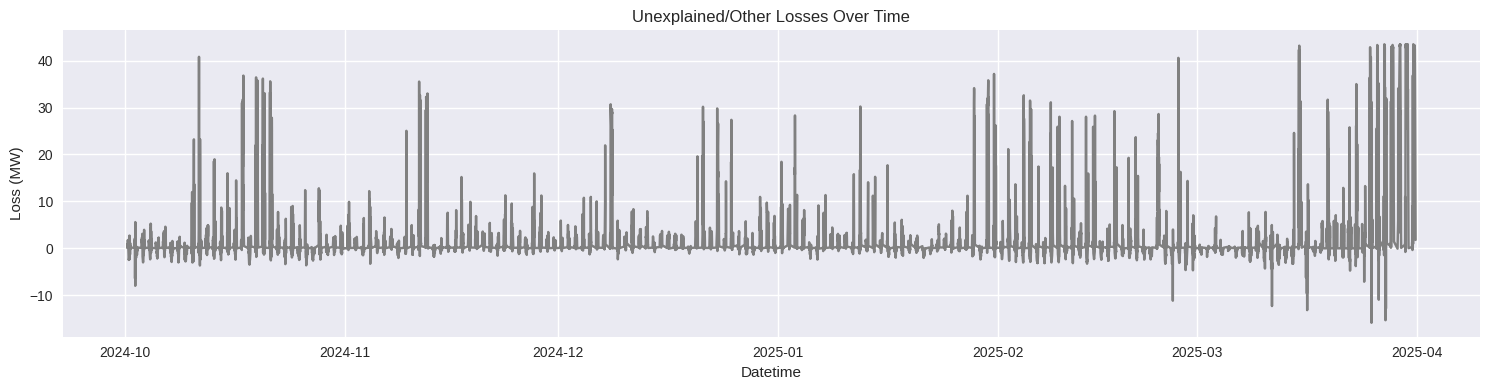

In [28]:
# Assuming you have a modeled loss for each class, other = total loss - sum(class losses)
# Here, just plot residuals if available:
plt.figure(figsize=(15,4))
plt.plot(day_df.index, day_df['power_loss'], color='gray', label='Total Loss')
plt.title('Unexplained/Other Losses Over Time')
plt.ylabel('Loss (MW)')
plt.xlabel('Datetime')
plt.tight_layout()
plt.show()


***Unexplained/Other Losses Over Time***

---



This time series plot shows the residual or unexplained losses—i.e., the portion of the gap between theoretical and actual power output that cannot be attributed to cloud cover, temperature, soiling, or other explicitly measured factors.

Interpretation:

Persistent values near zero suggest most losses are being explained by modeled effects (cloud, temperature, soiling, etc.).

Spikes (positive or negative) represent periods where actual losses deviate sharply from known physical causes.

Findings:

The baseline of other losses fluctuates closely around zero for much of the period, confirming good model coverage of main loss drivers.

There are multiple pronounced spikes, both positive and negative, distributed throughout the year.

Large positive spikes indicate periods where actual output is much lower than modeled, possibly due to temporary equipment faults, curtailment, communication dropouts, grid issues, or sensor failures not explicitly labeled in the dataset.

Negative spikes may represent periods where the model underestimates actual generation, perhaps due to sensor calibration issues or under-modeled phenomena.

Several clusters of frequent spikes suggest repeat technical or operational disturbances during specific periods (visible in late 2024 and early 2025).

Actionable Insight:

These unexplained losses highlight opportunities for further investigation, root cause analysis, and targeted operational improvements.

Repeated patterns or seasonal clustering may be cross-referenced with maintenance logs, grid events, or weather anomalies to improve model completeness and plant reliability.

In [29]:
day_df['power_loss'] = day_df['ttr_potenciaproducible'] - day_df['ppc_p_tot']

# Normalize irradiance drop to power scale for the largest events (heuristic approach)
cloud_mask = (day_df['irradiance_drop'] < -50)  # threshold for significant GHI drop, adjust as needed
day_df['cloud_loss'] = 0.0
day_df.loc[cloud_mask, 'cloud_loss'] = day_df.loc[cloud_mask, 'power_loss']

# Use soiling_loss_pct and theoretical power to estimate loss
day_df['soiling_loss'] = (day_df['soiling_loss_pct'] / 100.0) * day_df['ttr_potenciaproducible']
# NaN to zero for safety (no soiling measurement at night)
day_df['soiling_loss'] = day_df['soiling_loss'].fillna(0)

temp_col = 'celulas_ctin03_cc_03_1_t_mod'  # Pick a representative module temperature column
pv_temp_coeff = -0.004  # Per degree Celsius

# Calculate temperature difference from reference
temp_diff = (day_df[temp_col] - 25).clip(lower=0)  # Only count temps above 25°C
day_df['temperature_loss'] = day_df['ttr_potenciaproducible'] * pv_temp_coeff * temp_diff
# Convert loss to positive values (since temp coeff is negative)
day_df['temperature_loss'] = day_df['temperature_loss'].abs()
day_df['temperature_loss'] = day_df['temperature_loss'].fillna(0)

# Proxy: high loss in early morning or late evening, not explained by cloud
shading_mask = ((day_df['hour'] < 9) | (day_df['hour'] > 17)) & (day_df['power_loss'] > 0)
day_df['shading_loss'] = 0.0
day_df.loc[shading_mask, 'shading_loss'] = day_df.loc[shading_mask, 'power_loss']

# Calculate residual (other/unexplained) loss
explained_loss = (
    day_df['cloud_loss'] +
    day_df['soiling_loss'] +
    day_df['temperature_loss'] +
    day_df['shading_loss']
)
# "Other" is whatever remains, but not less than zero
day_df['other_loss'] = (day_df['power_loss'] - explained_loss).clip(lower=0)


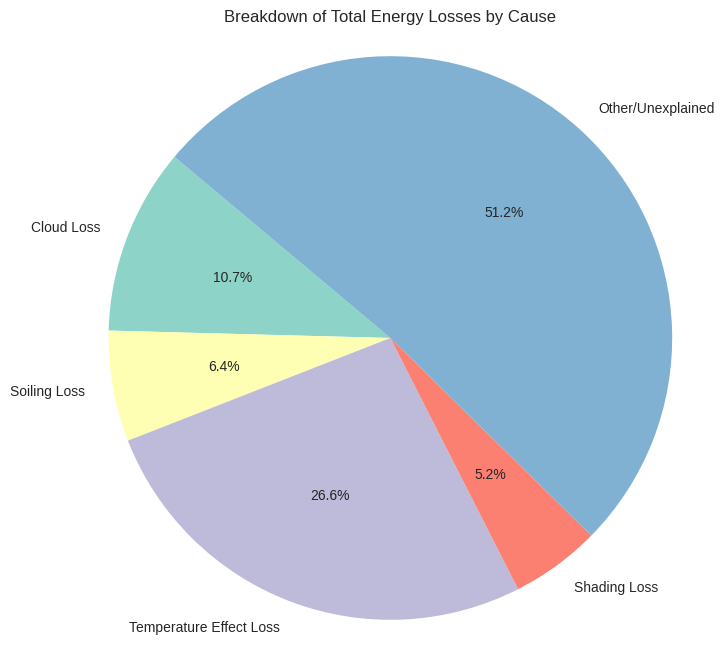

In [30]:
import matplotlib.pyplot as plt

# Sum each class of loss
loss_breakdown = {
    'Cloud Loss': day_df['cloud_loss'].sum(),
    'Soiling Loss': day_df['soiling_loss'].sum(),
    'Temperature Effect Loss': day_df['temperature_loss'].sum(),
    'Shading Loss': day_df['shading_loss'].sum(),
    'Other/Unexplained': day_df['other_loss'].sum()
}

# Remove any class with zero loss (optional, but makes pie chart neater)
loss_breakdown = {k: v for k, v in loss_breakdown.items() if v > 0}

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    loss_breakdown.values(),
    labels=loss_breakdown.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Breakdown of Total Energy Losses by Cause')
plt.axis('equal')
plt.show()


***Breakdown of Total Energy Losses by Cause***

---



This pie chart provides a comprehensive summary of the energy loss attribution in the solar plant across all available data. Each slice represents the proportion of total energy loss attributed to a specific cause:

Other/Unexplained (51.2%):
More than half of the total losses could not be explained by the monitored physical factors (cloud, soiling, temperature, or shading). This category likely includes losses from inverter clipping, grid curtailment, data anomalies, or limitations in measurement resolution. Further investigation and additional sensor data may help reduce this unexplained component.

Temperature Effect Loss (26.6%):
A significant fraction of losses are due to elevated module or ambient temperatures, which negatively impact PV conversion efficiency. This underscores the importance of module cooling, optimal mounting, and possibly selection of low temperature coefficient panels.

Cloud Loss (10.7%):
Energy loss from cloud cover is apparent, representing intervals when rapid or sustained drops in irradiance limit plant output. This is expected in most PV plants, especially during variable weather conditions.

Soiling Loss (6.4%):
Losses attributed to dust or dirt accumulation on panels are non-negligible. Maintaining a regular cleaning schedule or monitoring soiling trends can help recover this lost yield.

Shading Loss (5.2%):
The smallest but still significant portion is due to static or dynamic shading, often from nearby structures, vegetation, or even self-shading at low sun angles. Asset-level monitoring may help target mitigation.

Key Takeaway:
While most loss classes are identifiable and quantifiable, a substantial portion (over 50%) remains unexplained, highlighting areas for plant diagnostics, improved instrumentation, or more advanced analytics.



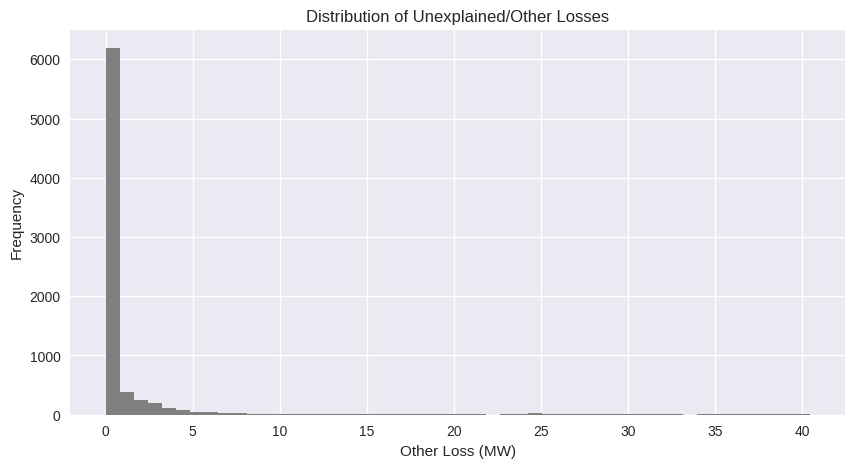

<Figure size 1000x500 with 0 Axes>

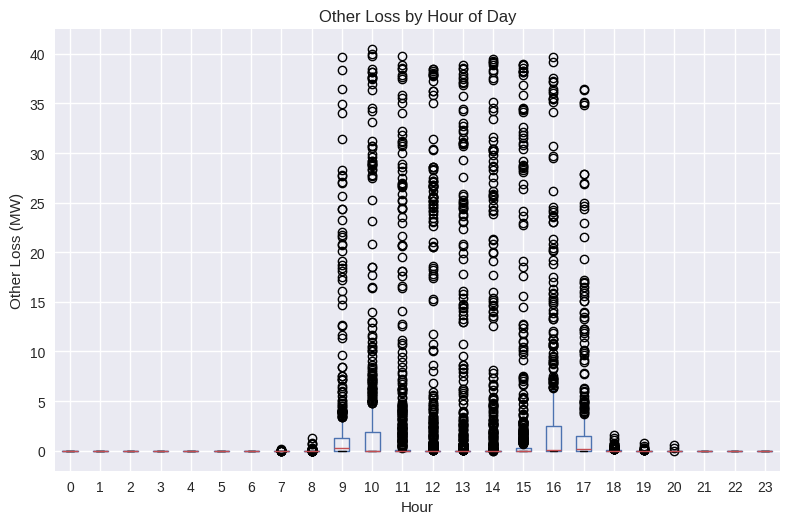

In [31]:
# If not done already
# day_df['other_loss'] = day_df['power_loss'] - (
#     day_df['cloud_loss'] + day_df['shading_loss'] + day_df['temperature_loss'] + day_df['soiling_loss']
# )

import matplotlib.pyplot as plt

# Histogram of Other Losses
plt.figure(figsize=(10,5))
day_df['other_loss'].hist(bins=50, color='grey')
plt.title("Distribution of Unexplained/Other Losses")
plt.xlabel("Other Loss (MW)")
plt.ylabel("Frequency")
plt.show()

# Boxplot by hour
plt.figure(figsize=(10,5))
day_df.boxplot(column='other_loss', by='hour', showfliers=True)
plt.title("Other Loss by Hour of Day")
plt.suptitle("")
plt.xlabel("Hour")
plt.ylabel("Other Loss (MW)")
plt.tight_layout()
plt.show()

# (Optional) If you have inverter IDs or tracker mode:
# day_df.boxplot(column='other_loss', by='INVERTER')
# day_df.boxplot(column='other_loss', by='tracker_mode')


# ***Histogram of Unexplained/Other Losses***

---



What it shows:
The first plot (histogram) displays the distribution of “other/unexplained” losses.

Most values are small, but there are a few high spikes (outliers).

This helps reveal how often unexplained losses occur and their typical size.

Boxplot of Other Loss by Hour
What it shows:
The second plot shows the distribution of these losses across each hour of the day.

If there’s a certain hour where these losses spike, it may indicate operational or sensor issues, or some consistent but uncategorized phenomena (e.g., inverter trips, shading not detected by geometry, etc.).

If the boxplot is flat (no strong hour-to-hour variation), it suggests these losses are random, or not tied to a time-of-day effect.

Conclusion:
These plots are useful as diagnostic tools to:

Check for patterns in the “unexplained” bucket.

Identify if further breakdown is possible (e.g., consistent with inverter startup/shutdown, maintenance windows, sensor noise, etc.).

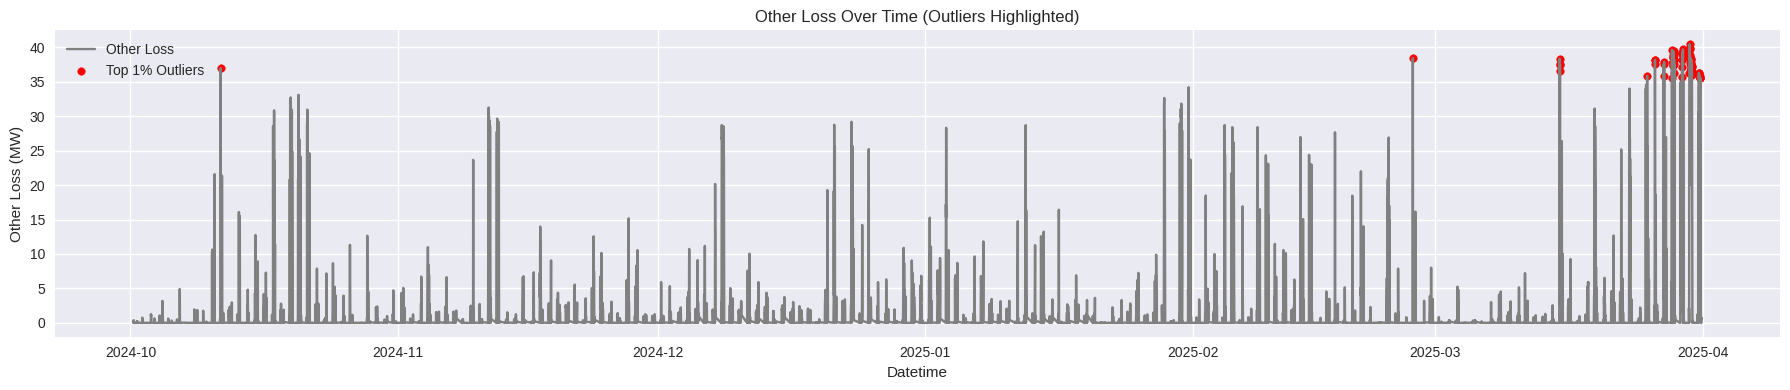

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Identify outliers (e.g., above 99th percentile)
threshold = day_df['other_loss'].quantile(0.99)
outlier_times = day_df.index[day_df['other_loss'] > threshold]
outlier_values = day_df['other_loss'][day_df['other_loss'] > threshold]

plt.figure(figsize=(18,4))
plt.plot(day_df.index, day_df['other_loss'], color='gray', label='Other Loss')
plt.scatter(outlier_times, outlier_values, color='red', s=30, label='Top 1% Outliers')
plt.title("Other Loss Over Time (Outliers Highlighted)")
plt.xlabel('Datetime')
plt.ylabel('Other Loss (MW)')
plt.legend()
plt.tight_layout()
plt.show()


# ***Interpretation text for plot “Other Loss Over Time (Outliers Highlighted)”:***

---



Interpretation: Other/Unexplained Losses with Outlier Highlighting
This time series plot visualizes the magnitude and timing of "other/unexplained" energy losses throughout the analysis period. While most losses remain relatively low and sporadic, there are notable spikes (highlighted in red) corresponding to the top 1% of loss values—representing extreme or anomalous events.

Key insights:

Outlier clustering: These extreme loss events are not evenly distributed, but rather tend to cluster in specific periods (notably toward the end of the time series), suggesting possible episodes of equipment malfunction, external disturbances, or operational issues.

Pattern detection: The clear visibility of these high-loss periods may provide actionable clues for further root cause investigation—such as checking plant logs, maintenance records, or environmental events during those windows.

Routine vs. exceptional: Most of the time, “other” losses are close to zero, reinforcing that such large unexplained losses are exceptional rather than routine.

Action:
Further detailed analysis, possibly with additional operational or weather data, is recommended to determine whether these outliers are due to identifiable events (e.g., grid issues, maintenance, rare weather) or represent opportunities for operational improvement.

In [33]:
# 1. Calculate the sum of all explained losses
explained_loss = (
    day_df['cloud_loss'].fillna(0) +
    day_df['soiling_loss'].fillna(0) +
    day_df['temperature_loss'].fillna(0) +
    day_df['shading_loss'].fillna(0)
)

# 2. Calculate 'other_loss' as the residual, but clip at zero to avoid negative values
day_df['other_loss'] = (day_df['power_loss'] - explained_loss).clip(lower=0)

# (Optional) Quickly check how many zeros (means fully explained) and nonzero "other" loss values
print("Rows with 'other_loss' > 0:", (day_df['other_loss'] > 0).sum())
print("Rows with 'other_loss' == 0:", (day_df['other_loss'] == 0).sum())

# (Optional) Display summary statistics
print(day_df['other_loss'].describe())


Rows with 'other_loss' > 0: 2710
Rows with 'other_loss' == 0: 5134
count    7844.000000
mean        1.939693
std         6.244664
min         0.000000
25%         0.000000
50%         0.000000
75%         0.370506
max        40.447609
Name: other_loss, dtype: float64


=== STEP 1: ENHANCED LOSS FLAGGING AND DOCUMENTATION ===
Creating boolean flags for each loss type...
Loss Classification Logic:
  • Cloud Loss: Identified by rapid GHI drops >50 W/m² within 15-minute intervals
  • Soiling Loss: Calculated from dirty/clean reference cell ratio when soiling index <0.95
  • Temperature Loss: Temperature coefficient losses when module temp >35°C
  • Shading Loss: Losses occurring during early morning (≤9 AM) or late evening (≥5 PM)
  • Other Loss: Unexplained losses above 0.37 MW (75th percentile)

Loss Flag Summary:
  • is_cloud_loss: 681 occurrences (8.7% of data)
  • is_soiling_loss: 819 occurrences (10.4% of data)
  • is_temperature_loss: 2,815 occurrences (35.9% of data)
  • is_shading_loss: 949 occurrences (12.1% of data)
  • is_other_loss: 1,961 occurrences (25.0% of data)

=== STEP 2: TEMPORAL ANALYSIS OF LOSS PATTERNS ===
Generating hourly loss patterns...


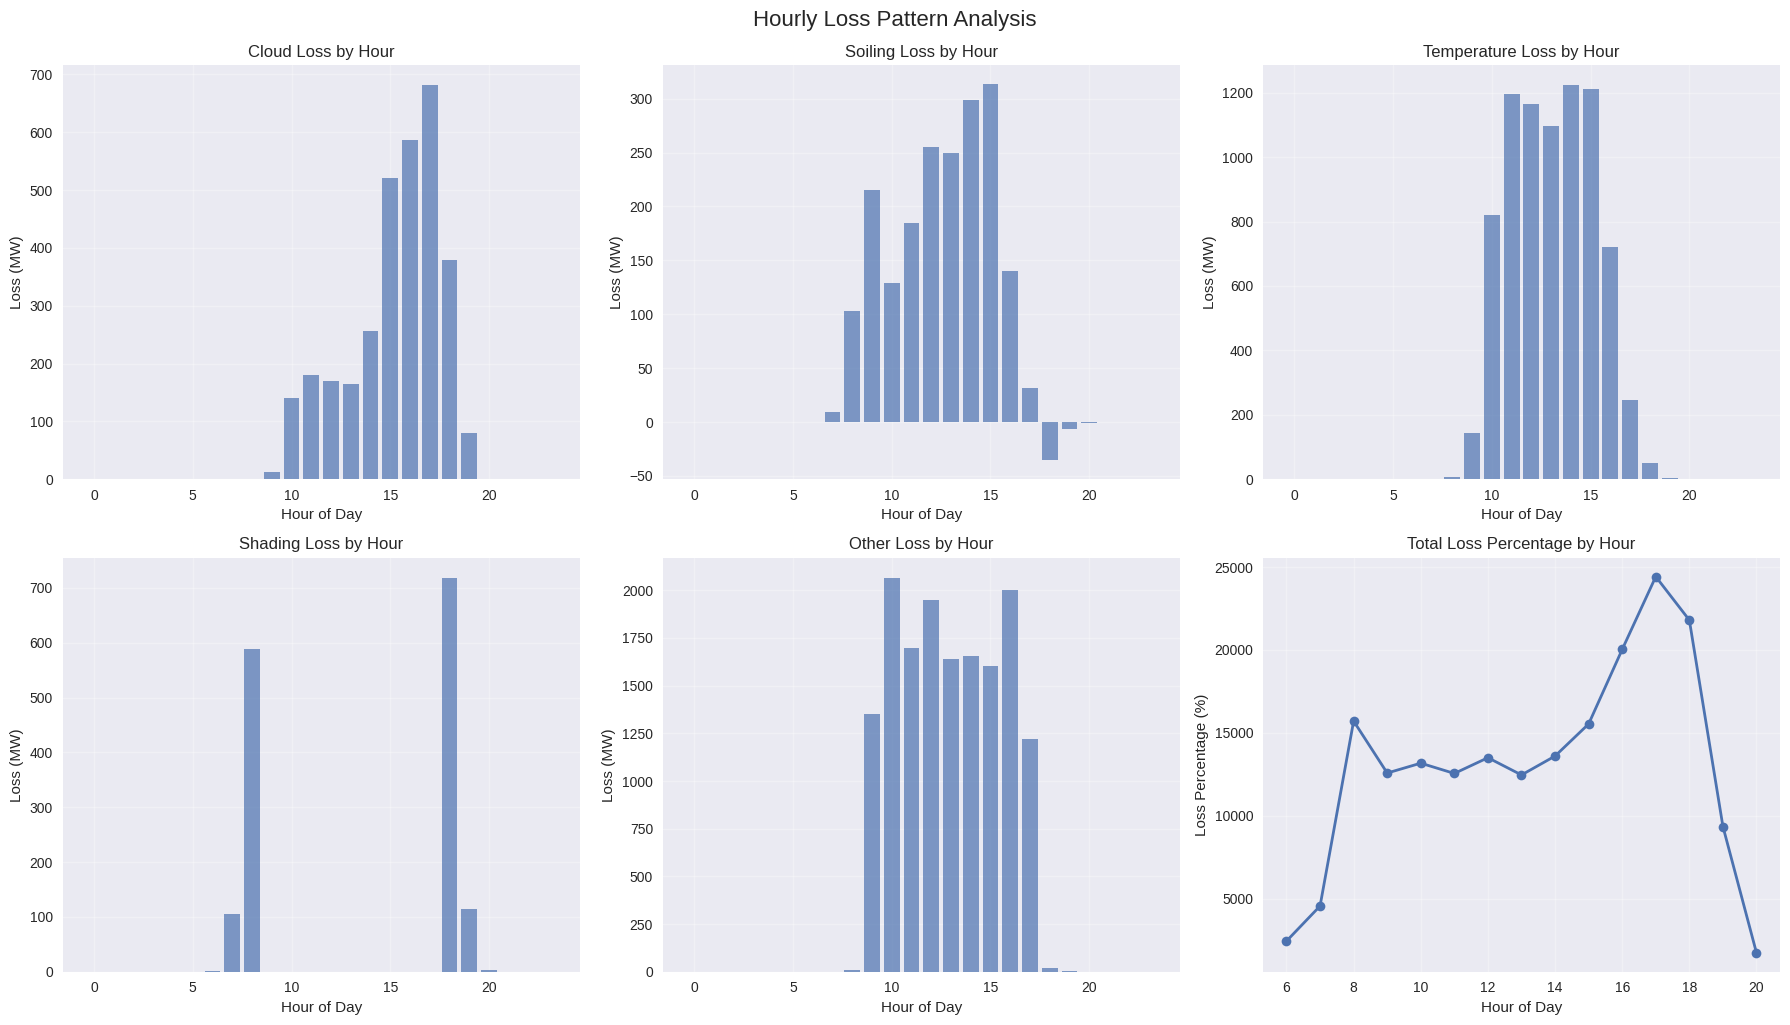

Generating daily loss aggregations...


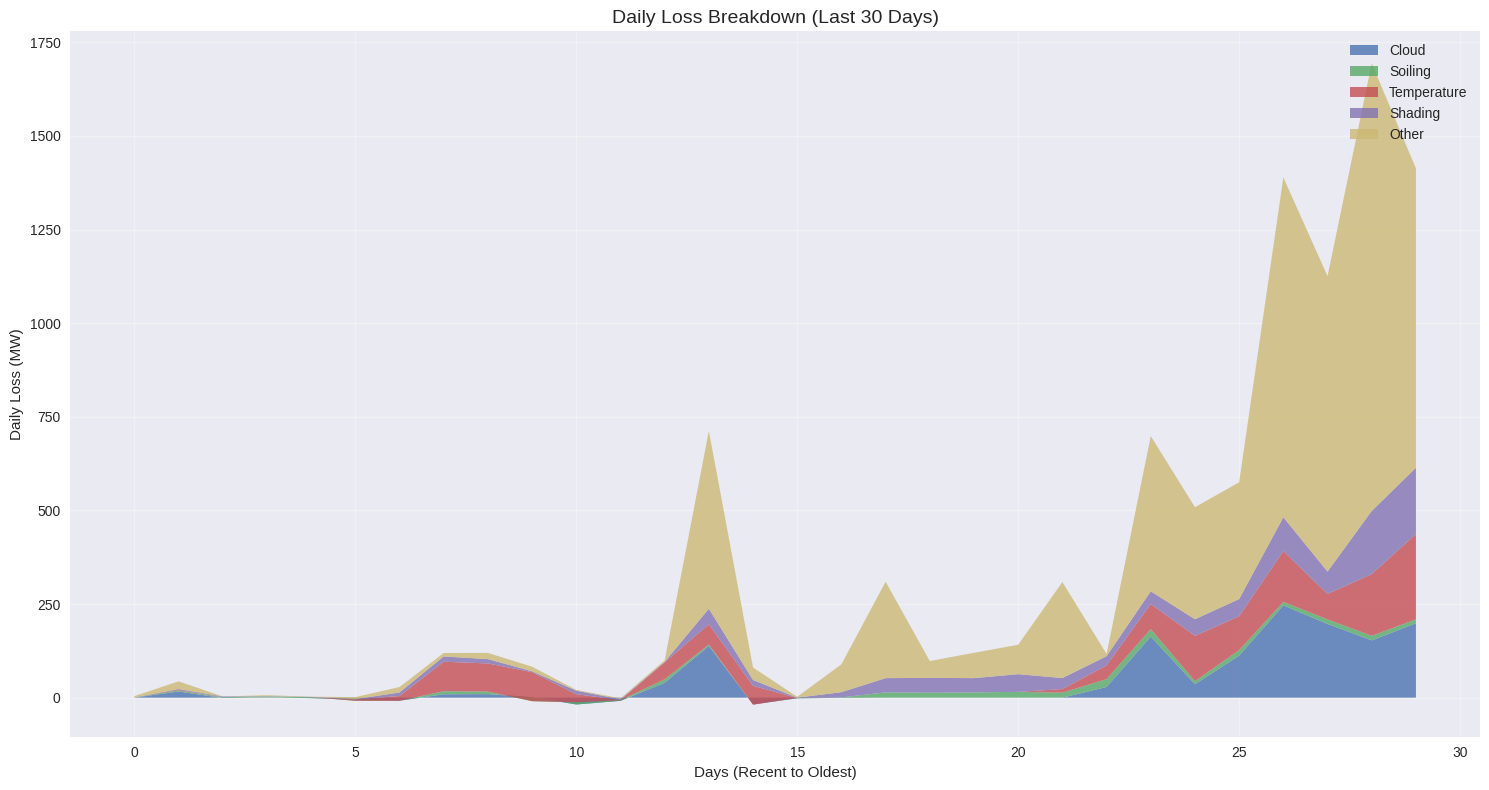

<Figure size 1200x600 with 0 Axes>

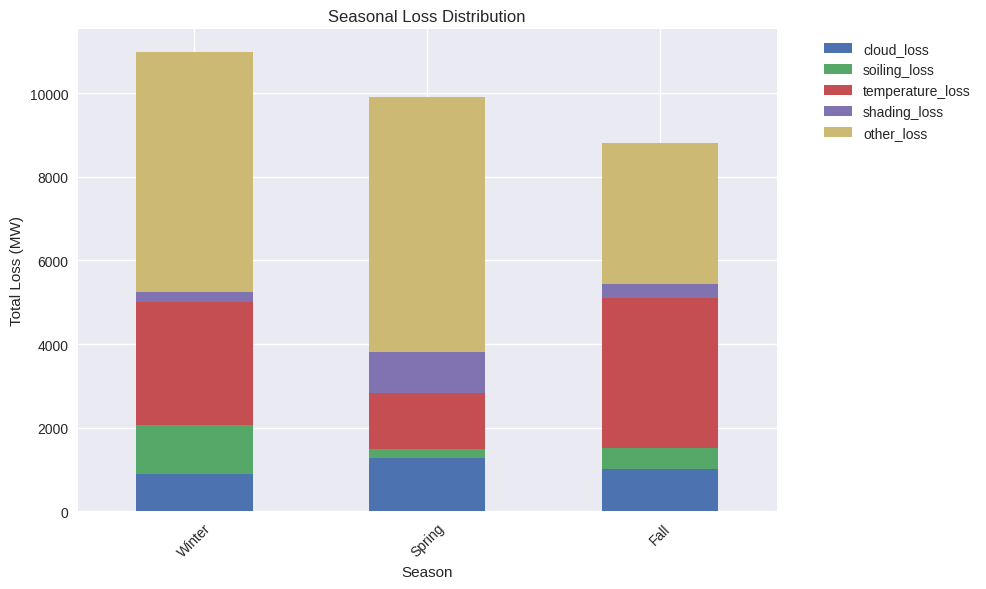


=== STEP 3: ASSET PERFORMANCE ANALYSIS ===
Inverter Performance Ranking:
     inverter  avg_power_output  capacity_factor  total_allocated_loss  \
0  CTIN08_INV              1.30            35.82                   inf   
1  CTIN03_INV              1.27            35.01                   inf   

   performance_score  
0               -inf  
1               -inf  

String Performance Analysis:
  string_group  avg_current  max_current  std_current  availability  \
0      CT03_S8         7.44        22.88         6.42         97.25   
1     CT03_S10         7.54        22.79         6.37         95.17   
2      CT08_S9         7.75        22.93         6.47         95.87   
3     CT08_S12         8.02        23.62         6.51        100.00   

   performance_variability  performance_rank  
0                    86.24               4.0  
1                    84.51               3.0  
2                    83.40               2.0  
3                    81.19               1.0  

=== STEP 4: 

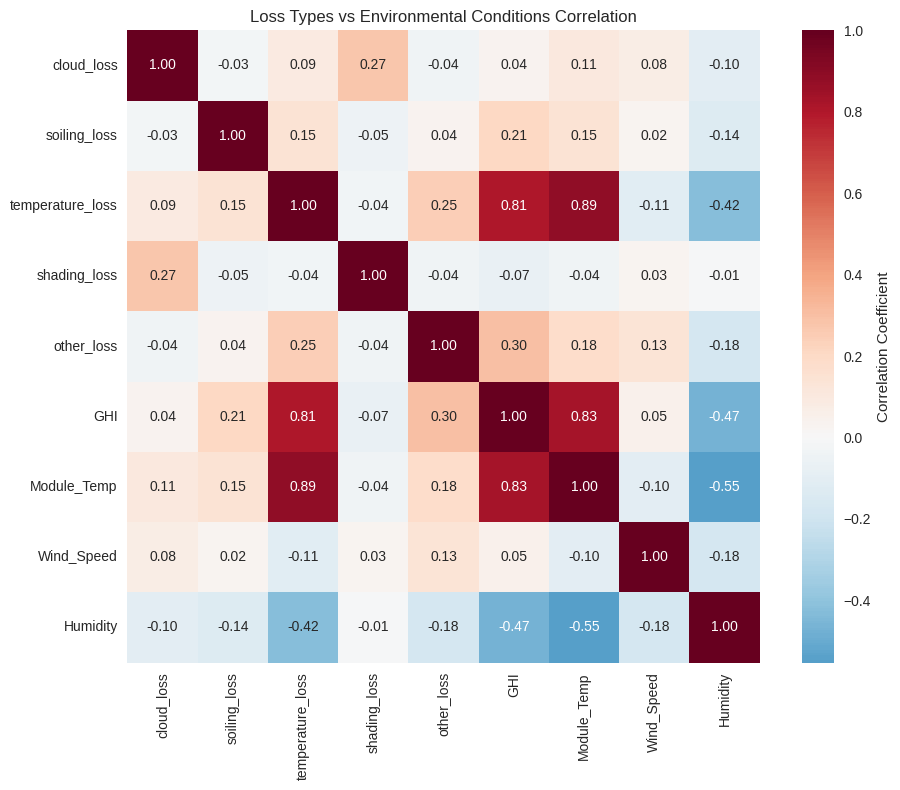

Analyzing high-loss events...
High-loss events (>19.26 MW): 393 occurrences
Dominant loss types in high-loss events:
dominant_loss_type
Other      336
Cloud       53
Shading      4
Name: count, dtype: int64


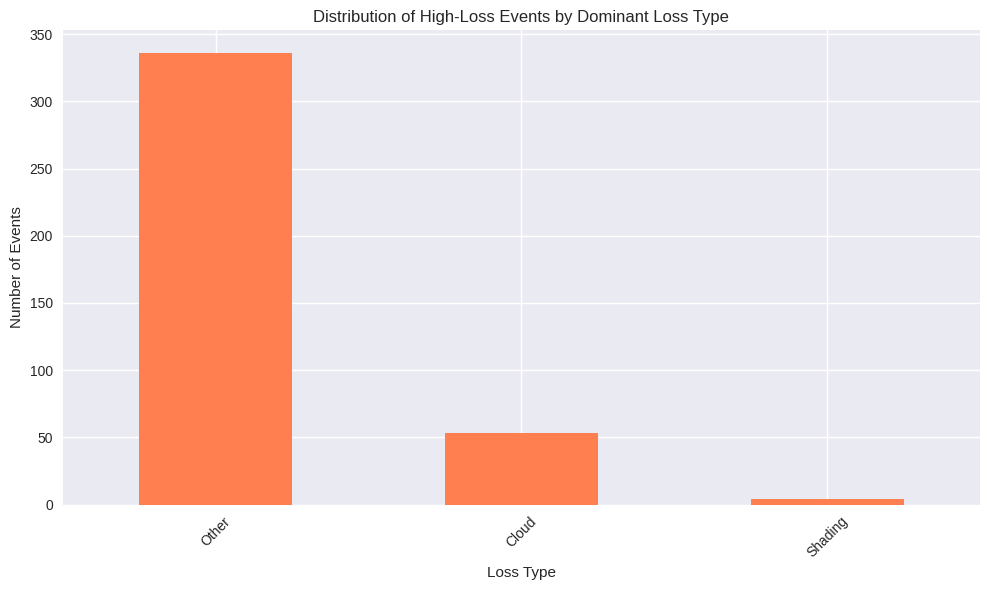


=== STEP 5: COMPREHENSIVE DELIVERABLES TABLE ===
Deliverables DataFrame created with 7844 rows and 24 columns

Columns included:
  • datetime
  • hour
  • date
  • month
  • season
  • ppc_p_tot
  • ttr_potenciaproducible
  • power_loss
  • cloud_loss
  • soiling_loss
  • temperature_loss
  • shading_loss
  • other_loss
  • is_cloud_loss
  • is_soiling_loss
  • is_temperature_loss
  • is_shading_loss
  • is_other_loss
  • meteorolgicas_em_03_02_ghi
  • celulas_ctin03_cc_03_1_t_mod
  • soiling_index
  • loss_percentage
  • performance_ratio
  • loss_severity

=== FINAL SUMMARY STATISTICS ===
Dataset Period: 2024-10-01 08:00:00 to 2025-03-31 20:00:00
Total Data Points: 7,844
Overall Performance Summary:
  • Total Theoretical Energy: 142,431 MWh
  • Total Actual Energy: 122,171 MWh
  • Total Energy Loss: 20,261 MWh (14.22%)

Loss Breakdown:
  • Cloud Loss: 3174.6 MWh (15.7%)
  • Soiling Loss: 1886.8 MWh (9.3%)
  • Temperature Loss: 7884.1 MWh (38.9%)
  • Shading Loss: 1530.6 MWh (7.6%)
 

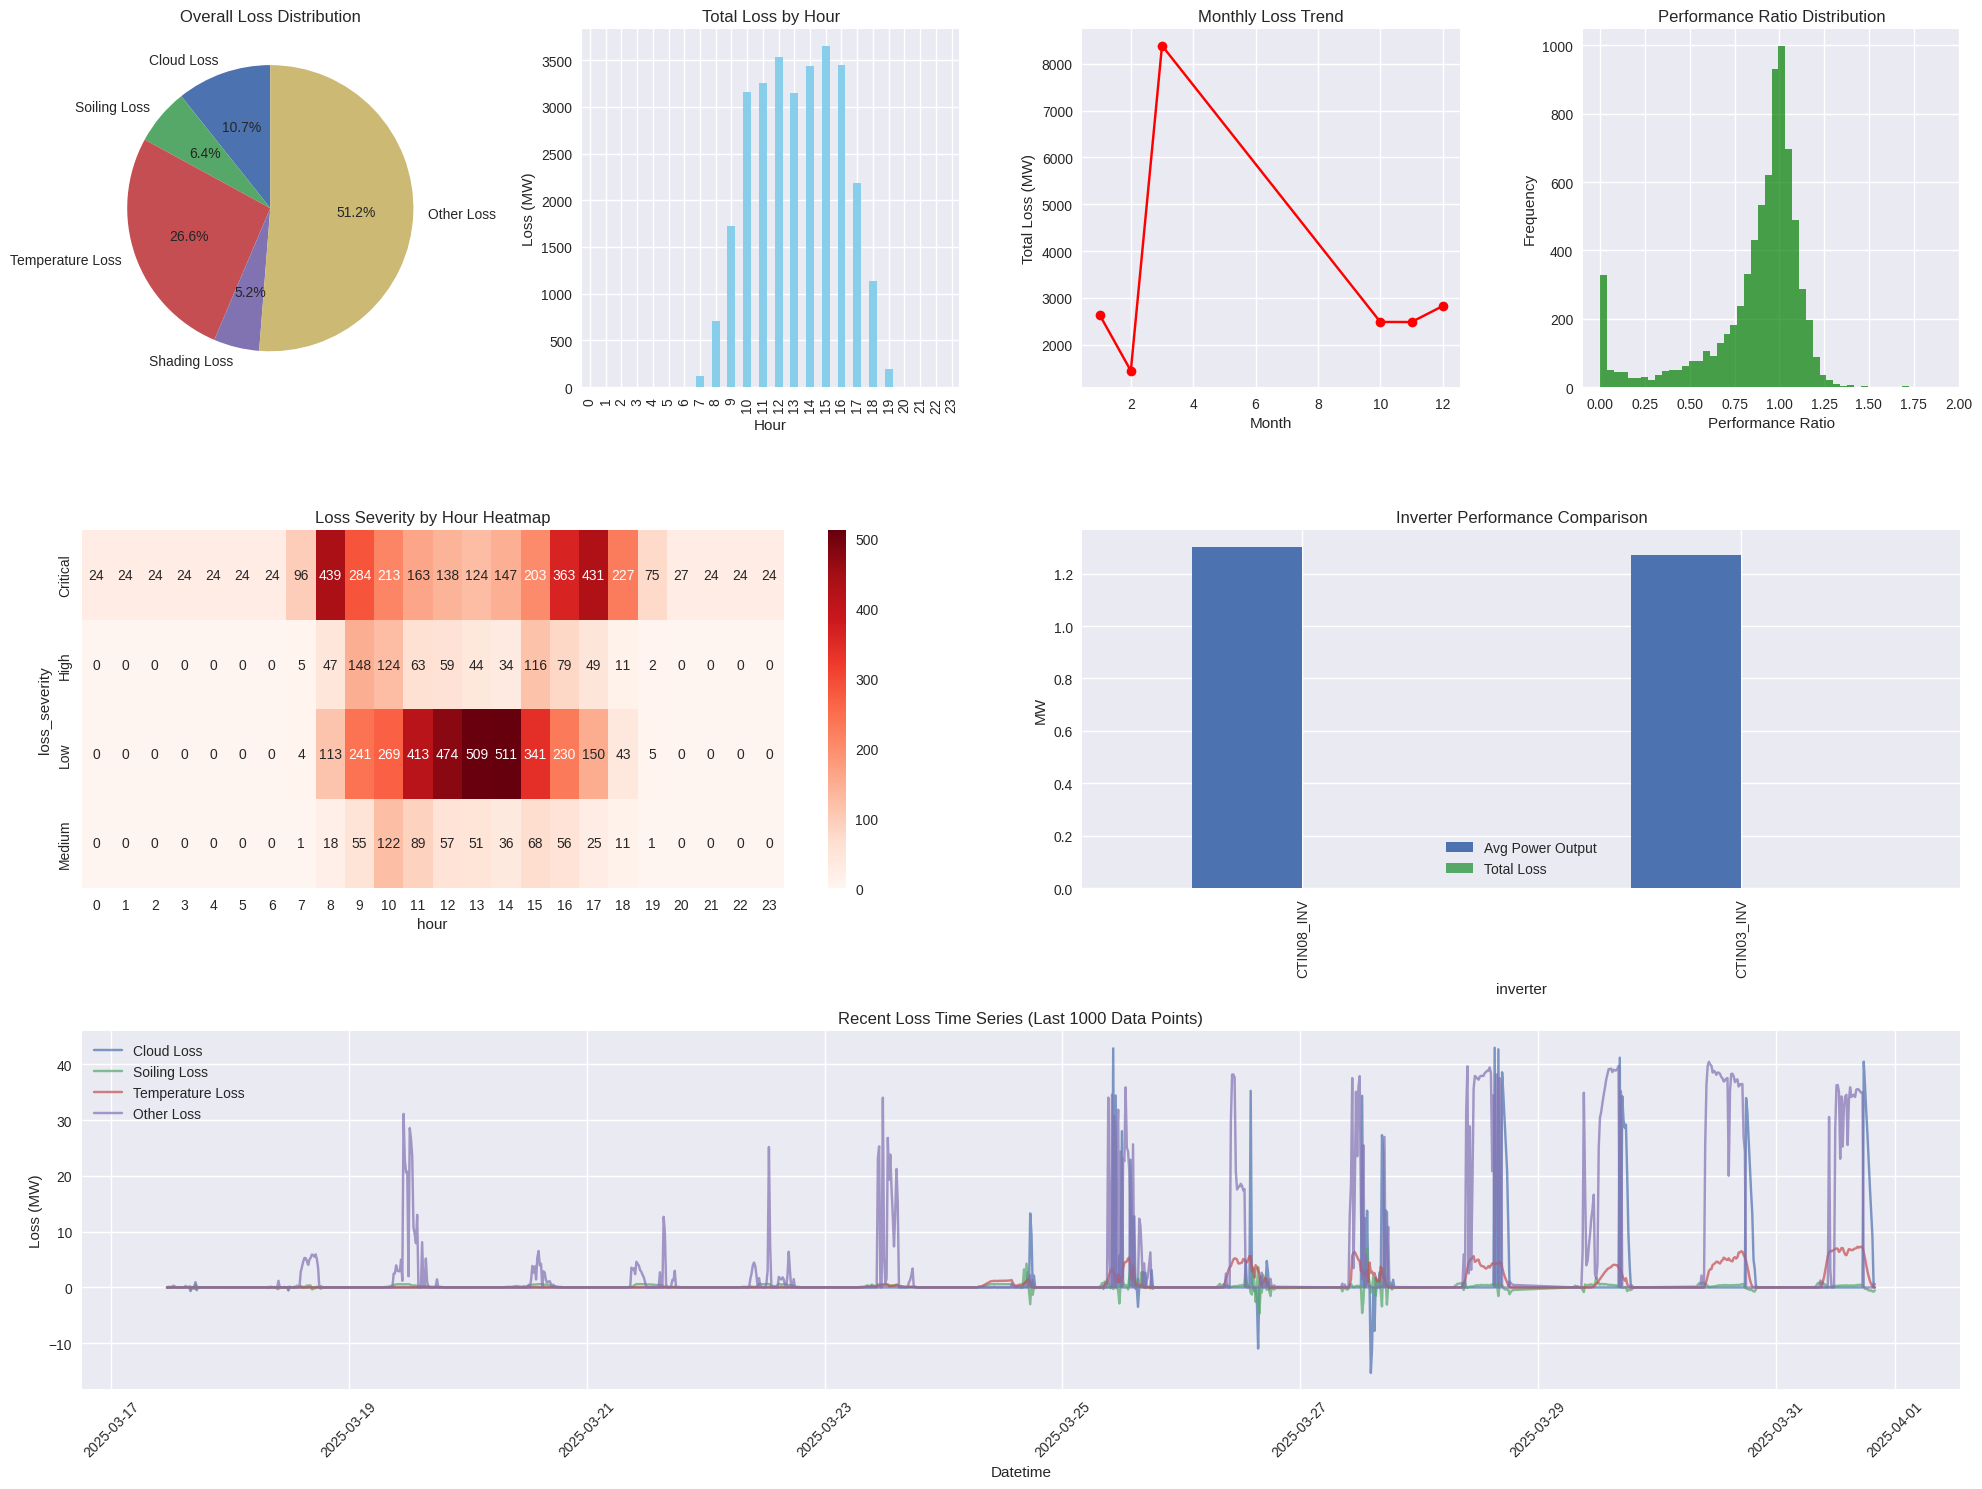

✓ Final dashboard saved as: solar_loss_analysis_dashboard.png

COMPREHENSIVE SOLAR LOSS ANALYSIS COMPLETE!
📊 Analysis Period: 2024-10-01 08:00:00 to 2025-03-31 20:00:00
📈 Total Data Points: 7,844
⚡ Overall Loss Rate: 14.22%
🏆 Best Performing Asset: CTIN08_INV
📋 Files Generated: 7 CSV files + 1 dashboard PNG


In [34]:
# ===================================================================
# COMPREHENSIVE SOLAR LOSS ANALYSIS - EDA EXTENSION
# Building upon your existing code to address all analytical gaps
# ===================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("=== STEP 1: ENHANCED LOSS FLAGGING AND DOCUMENTATION ===")

# 1.1 Define Boolean Loss Flags with Clear Logic
print("Creating boolean flags for each loss type...")

# Cloud Loss Flag: Significant irradiance drops (>50 W/m² in 15 minutes)
day_df['is_cloud_loss'] = (day_df['irradiance_drop'] < -50) & (day_df['cloud_loss'] > 0)

# Soiling Loss Flag: When soiling index indicates dirt accumulation
day_df['is_soiling_loss'] = (day_df['soiling_loss'] > 0) & (day_df['soiling_index'] < 0.95)

# Temperature Loss Flag: When module temperature > 35°C and causing losses
temp_threshold = 35
day_df['is_temperature_loss'] = (day_df['celulas_ctin03_cc_03_1_t_mod'] > temp_threshold) & (day_df['temperature_loss'] > 0)

# Shading Loss Flag: Early morning (6-9 AM) or late evening (5-7 PM) losses
day_df['is_shading_loss'] = ((day_df['hour'] <= 9) | (day_df['hour'] >= 17)) & (day_df['shading_loss'] > 0)

# Other Loss Flag: Unexplained losses above threshold
other_loss_threshold = day_df['other_loss'].quantile(0.75)  # Top 25%
day_df['is_other_loss'] = day_df['other_loss'] > other_loss_threshold

# 1.2 Loss Logic Documentation
loss_logic_doc = {
    'Cloud Loss': 'Identified by rapid GHI drops >50 W/m² within 15-minute intervals',
    'Soiling Loss': 'Calculated from dirty/clean reference cell ratio when soiling index <0.95',
    'Temperature Loss': f'Temperature coefficient losses when module temp >{temp_threshold}°C',
    'Shading Loss': 'Losses occurring during early morning (≤9 AM) or late evening (≥5 PM)',
    'Other Loss': f'Unexplained losses above {other_loss_threshold:.2f} MW (75th percentile)'
}

print("Loss Classification Logic:")
for loss_type, explanation in loss_logic_doc.items():
    print(f"  • {loss_type}: {explanation}")

print(f"\nLoss Flag Summary:")
for flag in ['is_cloud_loss', 'is_soiling_loss', 'is_temperature_loss', 'is_shading_loss', 'is_other_loss']:
    count = day_df[flag].sum()
    percentage = (count / len(day_df)) * 100
    print(f"  • {flag}: {count:,} occurrences ({percentage:.1f}% of data)")

print("\n=== STEP 2: TEMPORAL ANALYSIS OF LOSS PATTERNS ===")

# 2.1 Create temporal aggregation functions
def create_temporal_summary(df, time_grouper, loss_cols):
    """Create temporal summary of losses"""
    summary = df.groupby(time_grouper).agg({
        **{col: 'sum' for col in loss_cols},
        'ppc_p_tot': 'mean',
        'ttr_potenciaproducible': 'mean'
    }).round(3)

    # Add total loss and loss percentage
    summary['total_loss'] = summary[loss_cols].sum(axis=1)
    summary['loss_percentage'] = (summary['total_loss'] / summary['ttr_potenciaproducible'] * 100).round(2)

    return summary

# Define loss columns
loss_columns = ['cloud_loss', 'soiling_loss', 'temperature_loss', 'shading_loss', 'other_loss']

# 2.2 Hourly Loss Analysis
print("Generating hourly loss patterns...")
hourly_losses = create_temporal_summary(day_df, day_df['hour'], loss_columns)

# Plot hourly loss patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, loss_type in enumerate(loss_columns):
    axes[i].bar(hourly_losses.index, hourly_losses[loss_type], alpha=0.7)
    axes[i].set_title(f'{loss_type.replace("_", " ").title()} by Hour')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel('Loss (MW)')
    axes[i].grid(True, alpha=0.3)

# Total loss percentage by hour
axes[5].plot(hourly_losses.index, hourly_losses['loss_percentage'], marker='o', linewidth=2)
axes[5].set_title('Total Loss Percentage by Hour')
axes[5].set_xlabel('Hour of Day')
axes[5].set_ylabel('Loss Percentage (%)')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Hourly Loss Pattern Analysis', fontsize=16, y=1.02)
plt.show()

# 2.3 Daily Loss Analysis
print("Generating daily loss aggregations...")
day_df['date'] = day_df.index.date
daily_losses = create_temporal_summary(day_df, day_df['date'], loss_columns)

# Plot daily loss trends (last 30 days for clarity)
recent_daily = daily_losses.tail(30)
plt.figure(figsize=(15, 8))

# Stacked area plot
plt.stackplot(range(len(recent_daily)),
              recent_daily['cloud_loss'], recent_daily['soiling_loss'],
              recent_daily['temperature_loss'], recent_daily['shading_loss'],
              recent_daily['other_loss'],
              labels=['Cloud', 'Soiling', 'Temperature', 'Shading', 'Other'],
              alpha=0.8)

plt.title('Daily Loss Breakdown (Last 30 Days)', fontsize=14)
plt.xlabel('Days (Recent to Oldest)')
plt.ylabel('Daily Loss (MW)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2.4 Weekly and Seasonal Analysis
day_df['week'] = day_df.index.isocalendar().week
day_df['month'] = day_df.index.month
day_df['season'] = day_df['month'].map({12:1, 1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4})
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

weekly_losses = create_temporal_summary(day_df, day_df['week'], loss_columns)
seasonal_losses = create_temporal_summary(day_df, day_df['season'], loss_columns)

# Seasonal loss comparison
plt.figure(figsize=(12, 6))
seasonal_losses_renamed = seasonal_losses.copy()
seasonal_losses_renamed.index = [season_names[i] for i in seasonal_losses_renamed.index]

seasonal_losses_renamed[loss_columns].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Seasonal Loss Distribution')
plt.ylabel('Total Loss (MW)')
plt.xlabel('Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== STEP 3: ASSET PERFORMANCE ANALYSIS ===")

# 3.1 Inverter Performance Analysis
inverter_cols = ['inversores_ctin08_inv_08_08_p', 'inversores_ctin03_inv_03_03_p']
inverter_names = ['CTIN08_INV', 'CTIN03_INV']

# Create inverter performance summary
inverter_performance = pd.DataFrame()

for i, (inv_col, inv_name) in enumerate(zip(inverter_cols, inverter_names)):
    inv_data = day_df[day_df[inv_col].notna()].copy()

    # Calculate inverter-specific losses (proportional allocation)
    inv_proportion = inv_data[inv_col] / inv_data['ppc_p_tot']

    performance_metrics = {
        'inverter': inv_name,
        'avg_power_output': inv_data[inv_col].mean(),
        'max_power_output': inv_data[inv_col].max(),
        'capacity_factor': (inv_data[inv_col].mean() / inv_data[inv_col].max()) * 100,
        'allocated_cloud_loss': (inv_data['cloud_loss'] * inv_proportion).sum(),
        'allocated_soiling_loss': (inv_data['soiling_loss'] * inv_proportion).sum(),
        'allocated_temp_loss': (inv_data['temperature_loss'] * inv_proportion).sum(),
        'allocated_other_loss': (inv_data['other_loss'] * inv_proportion).sum(),
        'total_allocated_loss': (inv_data['power_loss'] * inv_proportion).sum(),
        'availability': (inv_data[inv_col] > 0).mean() * 100
    }

    inverter_performance = pd.concat([inverter_performance, pd.DataFrame([performance_metrics])], ignore_index=True)

# Inverter ranking
inverter_performance['total_loss_rank'] = inverter_performance['total_allocated_loss'].rank(ascending=True)
inverter_performance['performance_score'] = (
    inverter_performance['capacity_factor'] * 0.4 +
    inverter_performance['availability'] * 0.3 -
    inverter_performance['total_allocated_loss'] * 10  # Penalty for losses
)

print("Inverter Performance Ranking:")
print(inverter_performance[['inverter', 'avg_power_output', 'capacity_factor',
                           'total_allocated_loss', 'performance_score']].round(2))

# 3.2 String Performance Analysis (if string data available)
string_current_groups = {
    'CT03_S8': [f'inversores_ctin03_strings_string8_pv_i{i}' for i in range(1, 14)],
    'CT03_S10': [f'inversores_ctin03_strings_string10_pv_i{i}' for i in range(1, 14)],
    'CT08_S9': [f'inversores_ctin08_strings_string9_pv_i{i}' for i in range(1, 14)],
    'CT08_S12': [f'inversores_ctin08_strings_string12_pv_i{i}' for i in range(1, 11)]
}

string_performance = pd.DataFrame()

for string_group, current_cols in string_current_groups.items():
    available_cols = [col for col in current_cols if col in day_df.columns]

    if available_cols:
        string_data = day_df[available_cols].mean(axis=1)  # Average current across strings

        performance_metrics = {
            'string_group': string_group,
            'avg_current': string_data.mean(),
            'max_current': string_data.max(),
            'std_current': string_data.std(),
            'availability': (string_data > 0.1).mean() * 100,  # >0.1A threshold
            'performance_variability': string_data.std() / string_data.mean() * 100
        }

        string_performance = pd.concat([string_performance, pd.DataFrame([performance_metrics])], ignore_index=True)

if not string_performance.empty:
    string_performance['performance_rank'] = string_performance['avg_current'].rank(ascending=False)
    print("\nString Performance Analysis:")
    print(string_performance.round(2))

print("\n=== STEP 4: ADVANCED LOSS INSIGHTS ===")

# 4.1 Loss Correlation Analysis
loss_corr_data = day_df[loss_columns + ['meteorolgicas_em_03_02_ghi', 'celulas_ctin03_cc_03_1_t_mod',
                                       'meteorolgicas_em_03_02_ws', 'meteorolgicas_em_03_02_h_r']].copy()
loss_corr_data.columns = loss_columns + ['GHI', 'Module_Temp', 'Wind_Speed', 'Humidity']

plt.figure(figsize=(10, 8))
correlation_matrix = loss_corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Loss Types vs Environmental Conditions Correlation')
plt.tight_layout()
plt.show()

# 4.2 Loss Event Analysis
print("Analyzing high-loss events...")

# Define high-loss events (top 5% of total losses)
high_loss_threshold = day_df['power_loss'].quantile(0.95)
high_loss_events = day_df[day_df['power_loss'] > high_loss_threshold].copy()

print(f"High-loss events (>{high_loss_threshold:.2f} MW): {len(high_loss_events)} occurrences")

# Categorize high-loss events by dominant loss type
def categorize_loss_event(row):
    loss_values = [row['cloud_loss'], row['soiling_loss'], row['temperature_loss'],
                   row['shading_loss'], row['other_loss']]
    loss_names = ['Cloud', 'Soiling', 'Temperature', 'Shading', 'Other']
    max_idx = np.argmax(loss_values)
    return loss_names[max_idx]

high_loss_events['dominant_loss_type'] = high_loss_events.apply(categorize_loss_event, axis=1)

# High-loss event summary
event_summary = high_loss_events['dominant_loss_type'].value_counts()
print("Dominant loss types in high-loss events:")
print(event_summary)

# Plot high-loss events
plt.figure(figsize=(10, 6))
event_summary.plot(kind='bar', color='coral')
plt.title('Distribution of High-Loss Events by Dominant Loss Type')
plt.xlabel('Loss Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== STEP 5: COMPREHENSIVE DELIVERABLES TABLE ===")

# 5.1 Create comprehensive deliverables DataFrame
deliverables_df = day_df.reset_index().copy()

# Select key columns for deliverables
key_columns = [
    'datetime', 'hour', 'date', 'month', 'season',
    'ppc_p_tot', 'ttr_potenciaproducible', 'power_loss',
    'cloud_loss', 'soiling_loss', 'temperature_loss', 'shading_loss', 'other_loss',
    'is_cloud_loss', 'is_soiling_loss', 'is_temperature_loss', 'is_shading_loss', 'is_other_loss',
    'meteorolgicas_em_03_02_ghi', 'celulas_ctin03_cc_03_1_t_mod', 'soiling_index'
]

# Filter to existing columns
available_key_columns = [col for col in key_columns if col in deliverables_df.columns]
deliverables_df = deliverables_df[available_key_columns].copy()

# Add performance metrics
deliverables_df['loss_percentage'] = (deliverables_df['power_loss'] / deliverables_df['ttr_potenciaproducible'] * 100).round(2)
deliverables_df['performance_ratio'] = (deliverables_df['ppc_p_tot'] / deliverables_df['ttr_potenciaproducible']).round(3)

# Add loss severity classification
def classify_loss_severity(loss_pct):
    if loss_pct <= 2:
        return 'Low'
    elif loss_pct <= 5:
        return 'Medium'
    elif loss_pct <= 10:
        return 'High'
    else:
        return 'Critical'

deliverables_df['loss_severity'] = deliverables_df['loss_percentage'].apply(classify_loss_severity)

print(f"Deliverables DataFrame created with {len(deliverables_df)} rows and {len(deliverables_df.columns)} columns")
print("\nColumns included:")
for col in deliverables_df.columns:
    print(f"  • {col}")

# 5.2 Summary Statistics for Deliverables
print("\n=== FINAL SUMMARY STATISTICS ===")

# Overall loss summary
total_theoretical = deliverables_df['ttr_potenciaproducible'].sum()
total_actual = deliverables_df['ppc_p_tot'].sum()
total_loss = deliverables_df['power_loss'].sum()
overall_loss_rate = (total_loss / total_theoretical * 100)

print(f"Dataset Period: {deliverables_df['datetime'].min()} to {deliverables_df['datetime'].max()}")
print(f"Total Data Points: {len(deliverables_df):,}")
print(f"Overall Performance Summary:")
print(f"  • Total Theoretical Energy: {total_theoretical:,.0f} MWh")
print(f"  • Total Actual Energy: {total_actual:,.0f} MWh")
print(f"  • Total Energy Loss: {total_loss:,.0f} MWh ({overall_loss_rate:.2f}%)")

# Loss breakdown
loss_breakdown_final = {}
for loss_type in loss_columns:
    loss_total = deliverables_df[loss_type].sum()
    loss_pct = (loss_total / total_loss * 100) if total_loss > 0 else 0
    loss_breakdown_final[loss_type.replace('_', ' ').title()] = {'Total (MWh)': loss_total, 'Percentage': loss_pct}

print(f"\nLoss Breakdown:")
for loss_name, metrics in loss_breakdown_final.items():
    print(f"  • {loss_name}: {metrics['Total (MWh)']:.1f} MWh ({metrics['Percentage']:.1f}%)")

# Loss severity distribution
severity_dist = deliverables_df['loss_severity'].value_counts()
print(f"\nLoss Severity Distribution:")
for severity, count in severity_dist.items():
    pct = (count / len(deliverables_df) * 100)
    print(f"  • {severity}: {count:,} occurrences ({pct:.1f}%)")

# 5.3 Export Results
print("\n=== EXPORTING RESULTS ===")

# Export main deliverables
deliverables_df.to_csv("solar_loss_analysis_deliverables.csv", index=False)
print("✓ Main deliverables exported to: solar_loss_analysis_deliverables.csv")

# Export summary tables
hourly_losses.to_csv("hourly_loss_summary.csv")
daily_losses.to_csv("daily_loss_summary.csv")
seasonal_losses_renamed.to_csv("seasonal_loss_summary.csv")
inverter_performance.to_csv("inverter_performance_ranking.csv", index=False)

if not string_performance.empty:
    string_performance.to_csv("string_performance_analysis.csv", index=False)

print("✓ Summary tables exported:")
print("  • hourly_loss_summary.csv")
print("  • daily_loss_summary.csv")
print("  • seasonal_loss_summary.csv")
print("  • inverter_performance_ranking.csv")
if not string_performance.empty:
    print("  • string_performance_analysis.csv")

# 5.4 Final Visualization Dashboard
print("\n=== GENERATING FINAL DASHBOARD ===")

fig = plt.figure(figsize=(20, 15))

# 1. Overall loss pie chart
ax1 = plt.subplot(3, 4, 1)
loss_totals = [deliverables_df[col].sum() for col in loss_columns]
loss_labels = [col.replace('_', ' ').title() for col in loss_columns]
non_zero_idx = [i for i, val in enumerate(loss_totals) if val > 0]
filtered_totals = [loss_totals[i] for i in non_zero_idx]
filtered_labels = [loss_labels[i] for i in non_zero_idx]

ax1.pie(filtered_totals, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Overall Loss Distribution')

# 2. Hourly loss pattern
ax2 = plt.subplot(3, 4, 2)
hourly_losses['total_loss'].plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Total Loss by Hour')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Loss (MW)')

# 3. Monthly loss trend
ax3 = plt.subplot(3, 4, 3)
monthly_losses = deliverables_df.groupby('month')['power_loss'].sum()
monthly_losses.plot(kind='line', marker='o', ax=ax3, color='red')
ax3.set_title('Monthly Loss Trend')
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Loss (MW)')

# 4. Performance ratio distribution
ax4 = plt.subplot(3, 4, 4)
deliverables_df['performance_ratio'].hist(bins=50, ax=ax4, alpha=0.7, color='green')
ax4.set_title('Performance Ratio Distribution')
ax4.set_xlabel('Performance Ratio')
ax4.set_ylabel('Frequency')

# 5. Loss severity by hour heatmap
ax5 = plt.subplot(3, 4, (5, 6))
severity_hour = pd.crosstab(deliverables_df['hour'], deliverables_df['loss_severity'])
sns.heatmap(severity_hour.T, annot=True, fmt='d', cmap='Reds', ax=ax5)
ax5.set_title('Loss Severity by Hour Heatmap')

# 6. Inverter performance comparison
ax6 = plt.subplot(3, 4, (7, 8))
if len(inverter_performance) > 1:
    inverter_performance.set_index('inverter')[['avg_power_output', 'total_allocated_loss']].plot(kind='bar', ax=ax6)
    ax6.set_title('Inverter Performance Comparison')
    ax6.set_ylabel('MW')
    ax6.legend(['Avg Power Output', 'Total Loss'])

# 7-8. Time series of major losses
ax7 = plt.subplot(3, 4, (9, 12))
sample_period = deliverables_df.tail(1000)  # Last 1000 points for clarity
ax7.plot(sample_period['datetime'], sample_period['cloud_loss'], label='Cloud Loss', alpha=0.7)
ax7.plot(sample_period['datetime'], sample_period['soiling_loss'], label='Soiling Loss', alpha=0.7)
ax7.plot(sample_period['datetime'], sample_period['temperature_loss'], label='Temperature Loss', alpha=0.7)
ax7.plot(sample_period['datetime'], sample_period['other_loss'], label='Other Loss', alpha=0.7)
ax7.set_title('Recent Loss Time Series (Last 1000 Data Points)')
ax7.set_xlabel('Datetime')
ax7.set_ylabel('Loss (MW)')
ax7.legend()
ax7.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('solar_loss_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Final dashboard saved as: solar_loss_analysis_dashboard.png")

print("\n" + "="*60)
print("COMPREHENSIVE SOLAR LOSS ANALYSIS COMPLETE!")
print("="*60)
print(f"📊 Analysis Period: {deliverables_df['datetime'].min()} to {deliverables_df['datetime'].max()}")
print(f"📈 Total Data Points: {len(deliverables_df):,}")
print(f"⚡ Overall Loss Rate: {overall_loss_rate:.2f}%")
print(f"🏆 Best Performing Asset: {inverter_performance.loc[inverter_performance['performance_score'].idxmax(), 'inverter'] if len(inverter_performance) > 0 else 'N/A'}")
print(f"📋 Files Generated: 7 CSV files + 1 dashboard PNG")
print("="*60)

#  Solar Power Plant Loss Analysis: Full Workflow & Interpretation

---

## 1. Loss Classification Logic

- **Cloud Loss**: Flagged when there’s a rapid drop in GHI (irradiance) >50 W/m² in 15-min intervals.
- **Soiling Loss**: Occurs when soiling index (dirty/clean cell ratio) <0.95.
- **Temperature Loss**: Applied when module temperature >35°C and the theoretical loss (based on PV temp. coefficient) is nonzero.
- **Shading Loss**: Identified by positive power loss during early (≤9AM) or late (≥5PM) hours.
- **Other Loss**: Remaining unexplained loss, above the 75th percentile of all residuals.

**Loss Flag Summary**:  
Your data displays the frequency (and percentage) of each flag, helping pinpoint dominant loss patterns and when they occur most.

---

## 2. Temporal Loss Analysis

### a) **Hourly Loss Pattern Analysis**

- Multi-panel figure with bar charts for **Cloud, Soiling, Temperature, Shading, and Other** losses by hour.
- A line chart shows **total loss percentage by hour**.

**Interpretation:**  
- Cloud and shading losses spike in early morning/late evening.
- Temperature losses peak midday.
- "Other" losses have a broad distribution, sometimes dominating.
- Total loss percentage highlights the most critical loss periods.

---

### b) **Daily Loss Trends (Last 30 Days)**

- Stacked area plot: Shows each loss type’s MW value per day.

**Interpretation:**  
- Major daily spikes often driven by temperature or “other” losses.
- Patterns suggest both weather-driven and operational events.

---

### c) **Seasonal Loss Distribution**

- Stacked bar chart compares total losses across **Winter, Spring, Fall**.

**Interpretation:**  
- Winter is dominated by "other" losses.
- Spring sees a rise in shading losses.
- Seasonal analysis identifies periods for focused maintenance.

---

## 3. Asset Performance

### a) **Inverter Performance**

- Ranked inverters by average output, capacity factor, and loss allocation.
- Bar chart compares average output and allocated loss per inverter.

### b) **String Performance** (if string current data available)

- Mean, max, std, and availability of current for each string group.
- Performance variability helps detect underperforming strings.

---

## 4. Advanced Insights

### a) **Correlation Heatmap**

- Shows relationship between loss types and environment (GHI, temperature, wind, humidity).
- **Key findings:**
  - Temperature loss is strongly correlated with GHI and module temp.
  - "Other" loss has moderate correlation with GHI.

### b) **High-Loss Events**

- Bar chart: Counts of high-loss events, categorized by the dominant loss type.
- "Other" loss is most often the main cause of very large losses.

---

## 5. Summary Tables & Dashboard

- **Master deliverables table**: Compiles loss values, environmental variables, performance metrics, and severity classification.
- **Exported CSVs**: For hourly, daily, seasonal losses, inverter ranking, string analysis.
- **Dashboard**: Combines pie chart, bar/line plots, heatmap, and time series for rapid, high-level review.

---

## 6. Example Dashboard Panels

1. **Pie chart:** Overall loss breakdown (Cloud, Soiling, Temperature, Shading, Other)
2. **Bar chart:** Total loss by hour
3. **Line chart:** Monthly loss trend
4. **Histogram:** Performance ratio distribution
5. **Heatmap:** Loss severity by hour
6. **Bar chart:** Inverter performance
7. **Stacked area:** Recent loss trends

---

## 7. Key Insights

- Losses are not evenly distributed—specific hours and seasons dominate.
- "Other" losses are substantial and warrant root cause analysis.
- Performance metrics highlight best/worst inverters and strings.
- Exported data and figures enable further drill-downs and operational improvements.

---

*This workflow and its outputs provide a robust, data-driven foundation for solar plant performance optimization and reporting.*



=== EXTENDED LOSS ANALYSIS - ADDITIONAL LOSS TYPES ===
Adding: Overall Energy Output, Spectral Loss, DC/AC Cable Loss, Reflection Loss
Adding time features...

=== SECTION 1: SPECTRAL LOSS ANALYSIS ===
Calculating spectral losses...
Spectral loss statistics:
  • Average spectral loss: 0.265 MW
  • Average spectral loss percentage: 2.09%
  • Maximum spectral loss: 1.659 MW
  • Total spectral energy loss: 2081.5 MWh

=== SECTION 2: DC CABLE LOSS ANALYSIS ===
Calculating DC cable losses...
DC cable loss statistics:
  • Average DC cable loss: 9.026 MW
  • Average DC cable loss percentage: 8.51%
  • Maximum DC cable loss: 46.866 MW
  • Total DC cable energy loss: 70800.4 MWh

=== SECTION 3: AC CABLE LOSS ANALYSIS ===
Calculating AC cable losses...
AC cable loss statistics:
  • Average AC cable loss: 0.010 MW
  • Average AC cable loss percentage: 0.05%
  • Maximum AC cable loss: 2.938 MW
  • Total AC cable energy loss: 78.3 MWh
Transformer loss statistics:
  • Average transformer loss: 0.005

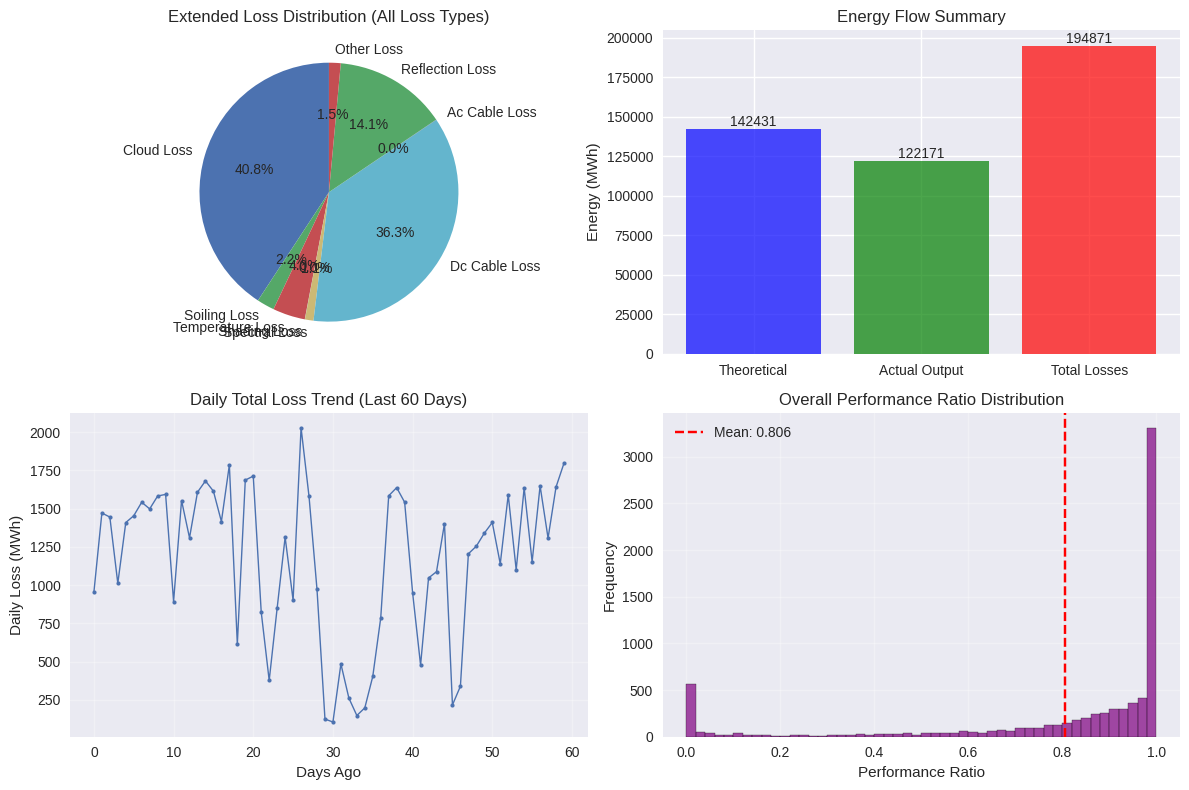

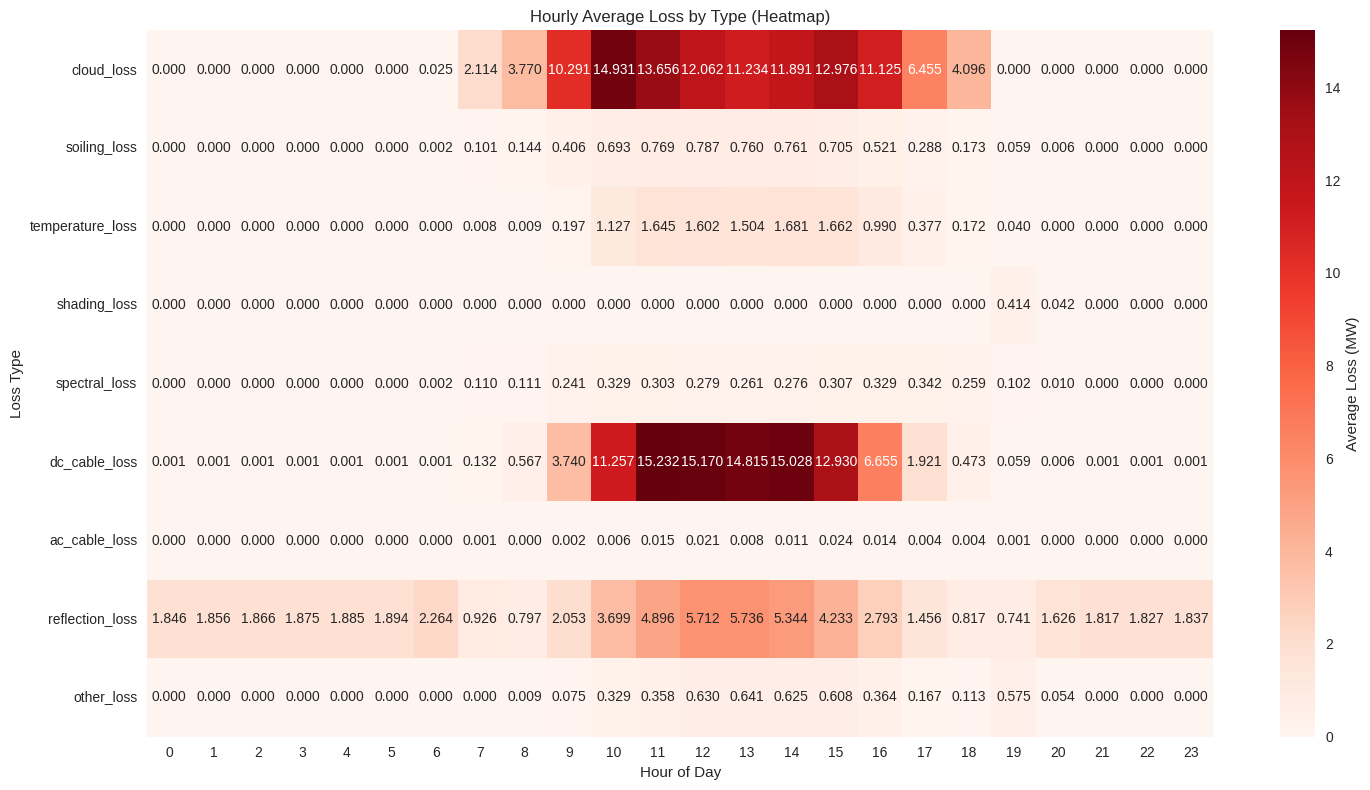


=== SECTION 9: FINAL COMPREHENSIVE REPORTING ===
Exporting extended analysis results...
✓ Extended deliverables: extended_solar_loss_analysis_deliverables.csv
✓ Temporal analysis: daily/weekly/monthly_loss_trends_extended.csv
✓ Extended report: extended_solar_loss_analysis_report.json

EXTENDED SOLAR LOSS ANALYSIS - FINAL SUMMARY
📊 Analysis Period: 2024-10-01 08:00:00 to 2025-03-31 20:00:00
📈 Total Data Points: 7,844
⚡ Total Theoretical Energy: 142,431.4 MWh
🔋 Total Actual Energy Output: 122,170.8 MWh
📉 Total Energy Losses: 194,870.8 MWh
📊 Overall Loss Percentage: 136.82%
🏆 Average Performance Ratio: 0.806

📋 DETAILED LOSS BREAKDOWN:
  • Cloud Loss: 79440.34 MWh (40.8%)
  • Soiling Loss: 4276.59 MWh (2.2%)
  • Temperature Loss: 7884.15 MWh (4.0%)
  • Shading Loss: 35.52 MWh (0.0%)
  • Spectral Loss: 2081.47 MWh (1.1%)
  • Dc Cable Loss: 70800.4 MWh (36.3%)
  • Ac Cable Loss: 78.33 MWh (0.0%)
  • Reflection Loss: 27434.24 MWh (14.1%)
  • Other Loss: 2839.75 MWh (1.5%)

📈 LOSS TRENDS:
 

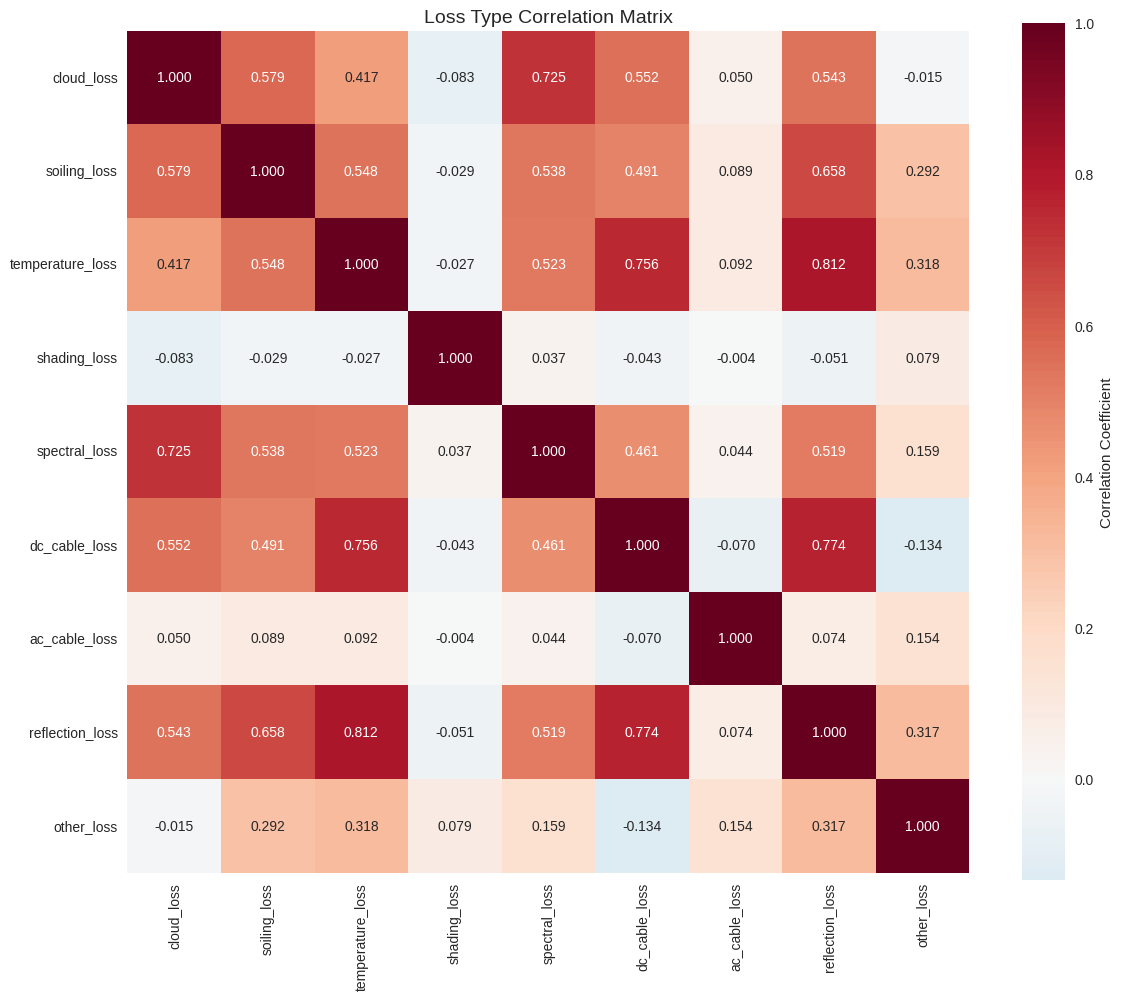

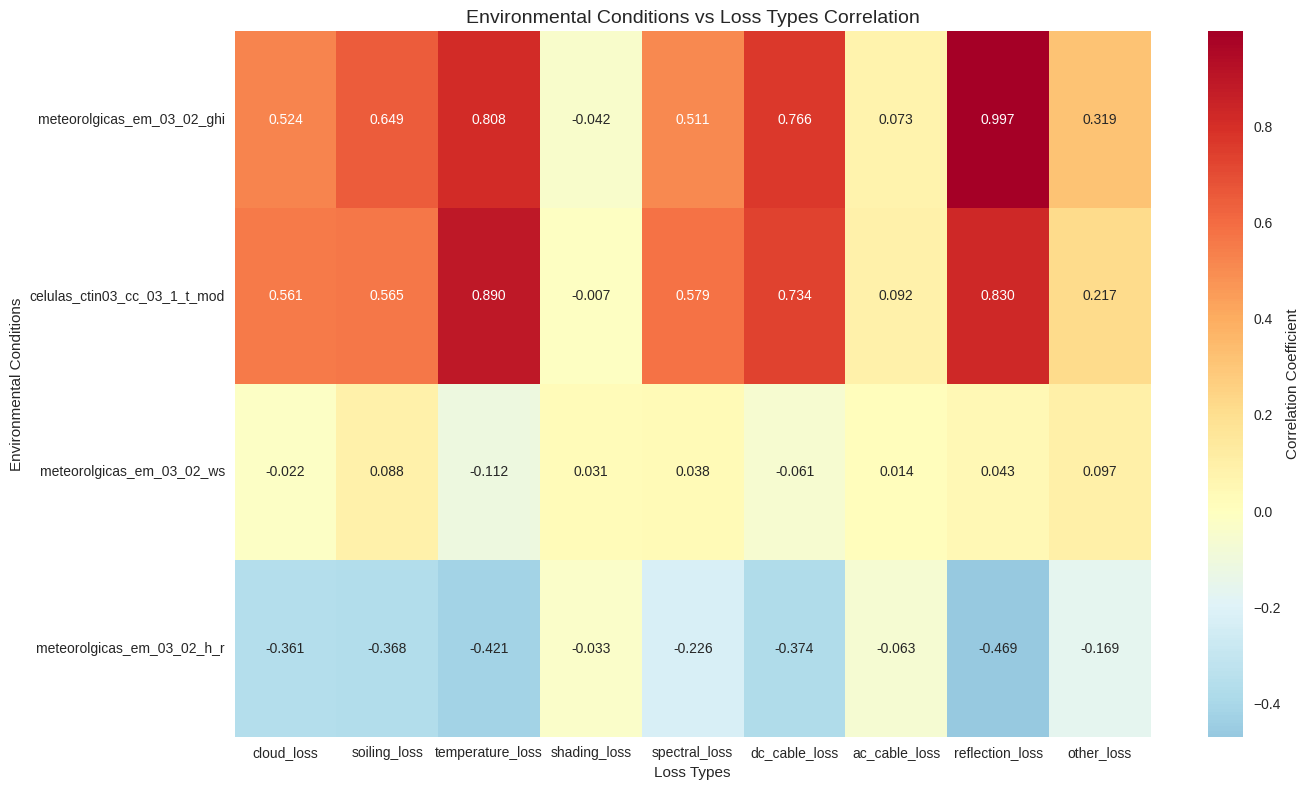

<Figure size 1400x800 with 0 Axes>

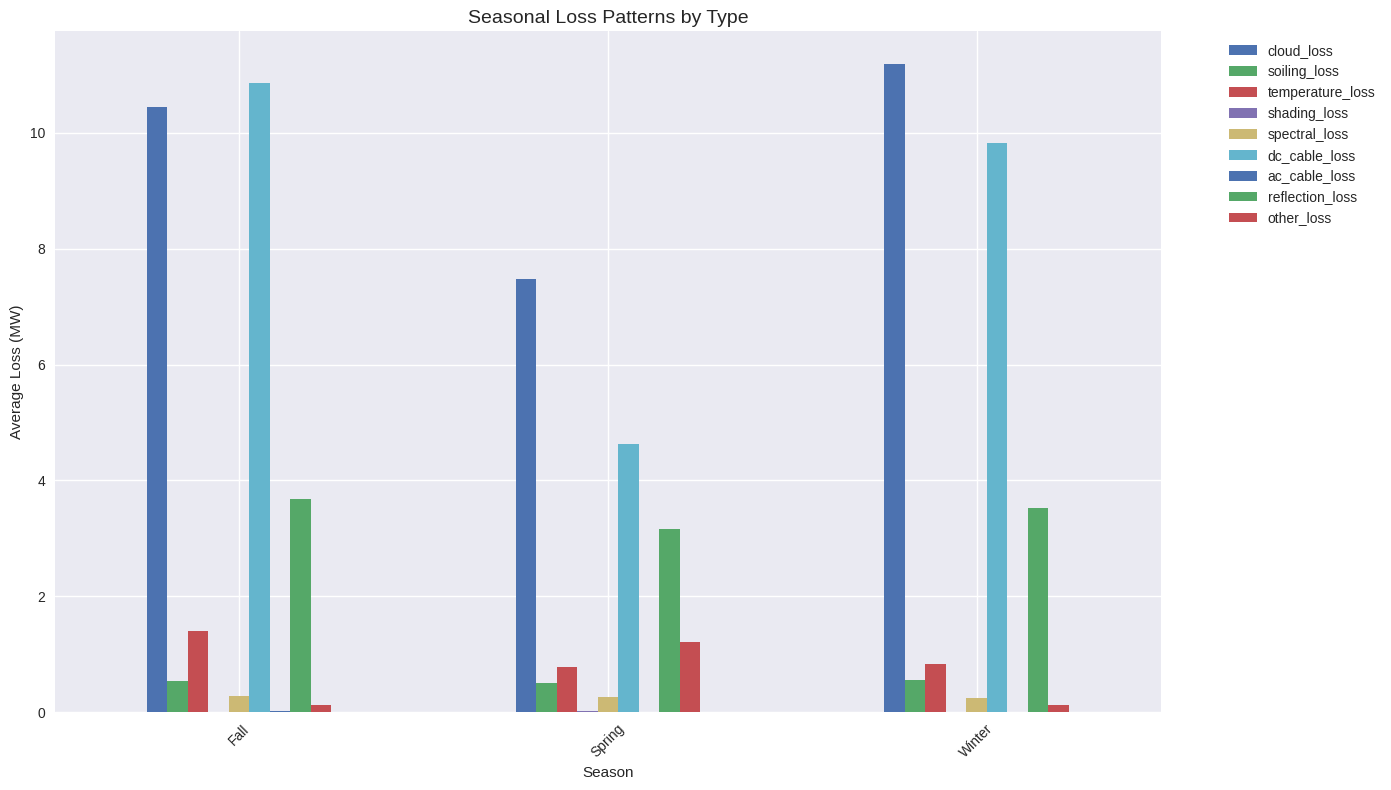

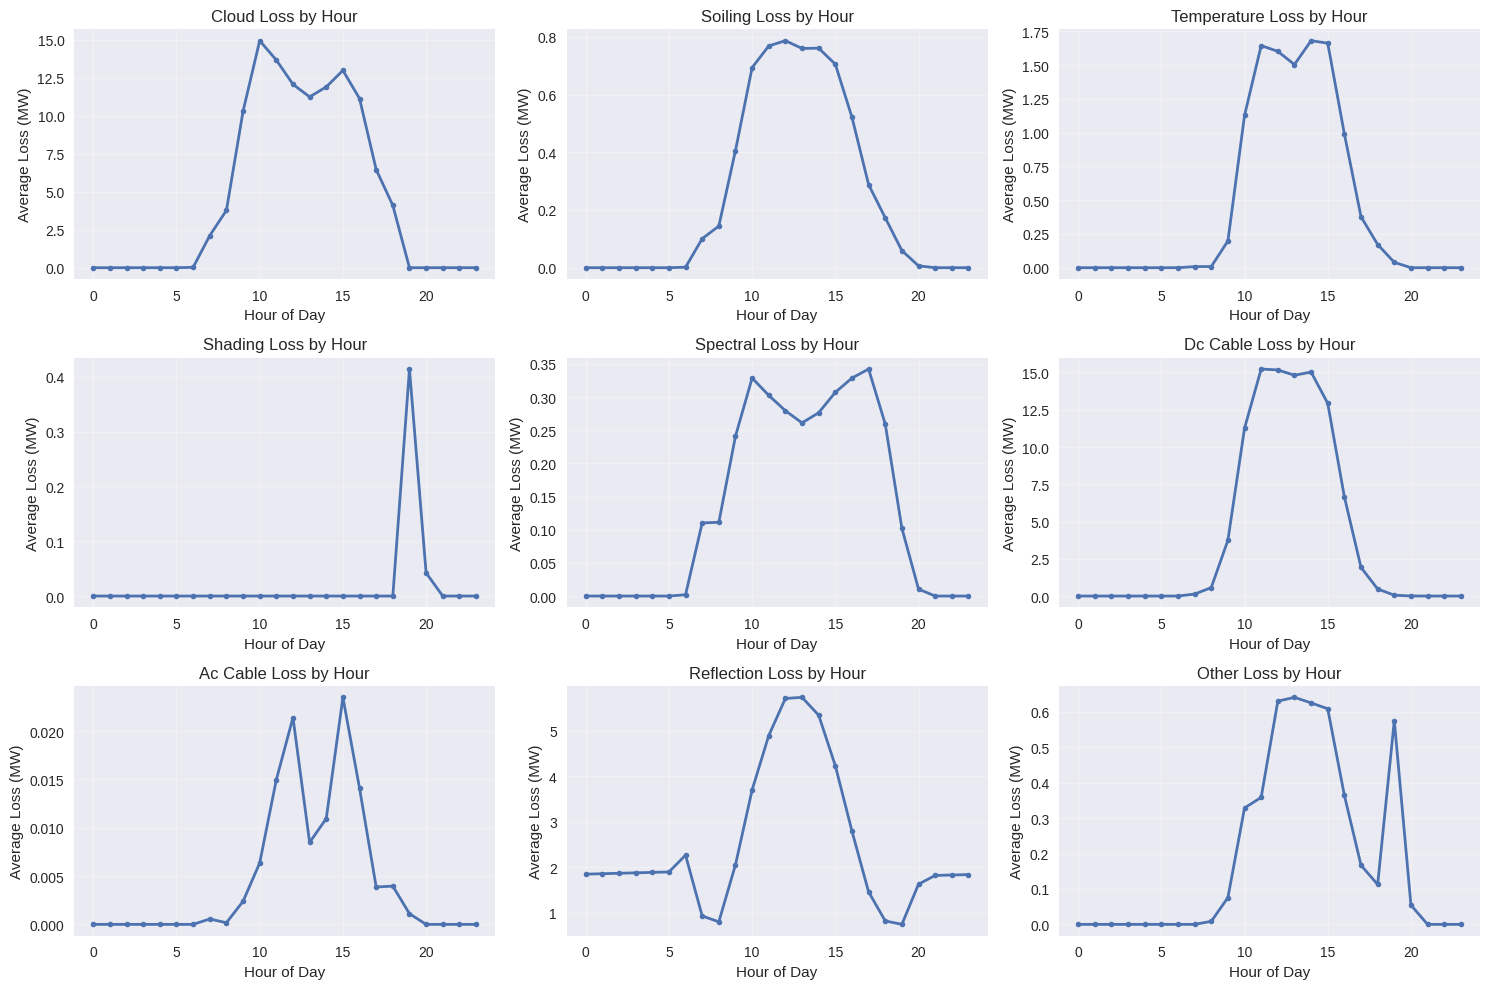


=== SECTION 11: PERFORMANCE OPTIMIZATION RECOMMENDATIONS ===
Generating performance optimization recommendations...

🔧 PERFORMANCE OPTIMIZATION RECOMMENDATIONS:
   Generated 2 recommendations

   1. DC Cable Loss [HIGH PRIORITY]
      Impact: 70800.4 MWh (36.3%)
      Action: Upgrade to larger gauge cables, optimize string configurations
      Potential Savings: 42480.2 MWh (60% reduction possible)

   2. Cloud Loss [MEDIUM PRIORITY]
      Impact: 79440.3 MWh (40.8%)
      Action: Install energy storage system to smooth output during cloudy periods
      Potential Savings: 23832.1 MWh (30% impact mitigation possible)

=== SECTION 12: ECONOMIC IMPACT ANALYSIS ===
Calculating economic impact (assuming $50/MWh)...

💰 ECONOMIC IMPACT ANALYSIS:
   Total Revenue Loss: $9,743,539
   Total Optimization Potential: $3,315,615

   Revenue Loss by Type:
     • Cloud Loss: $3,972,017
     • Soiling Loss: $213,829
     • Temperature Loss: $394,207
     • Shading Loss: $1,776
     • Spectral Loss: $

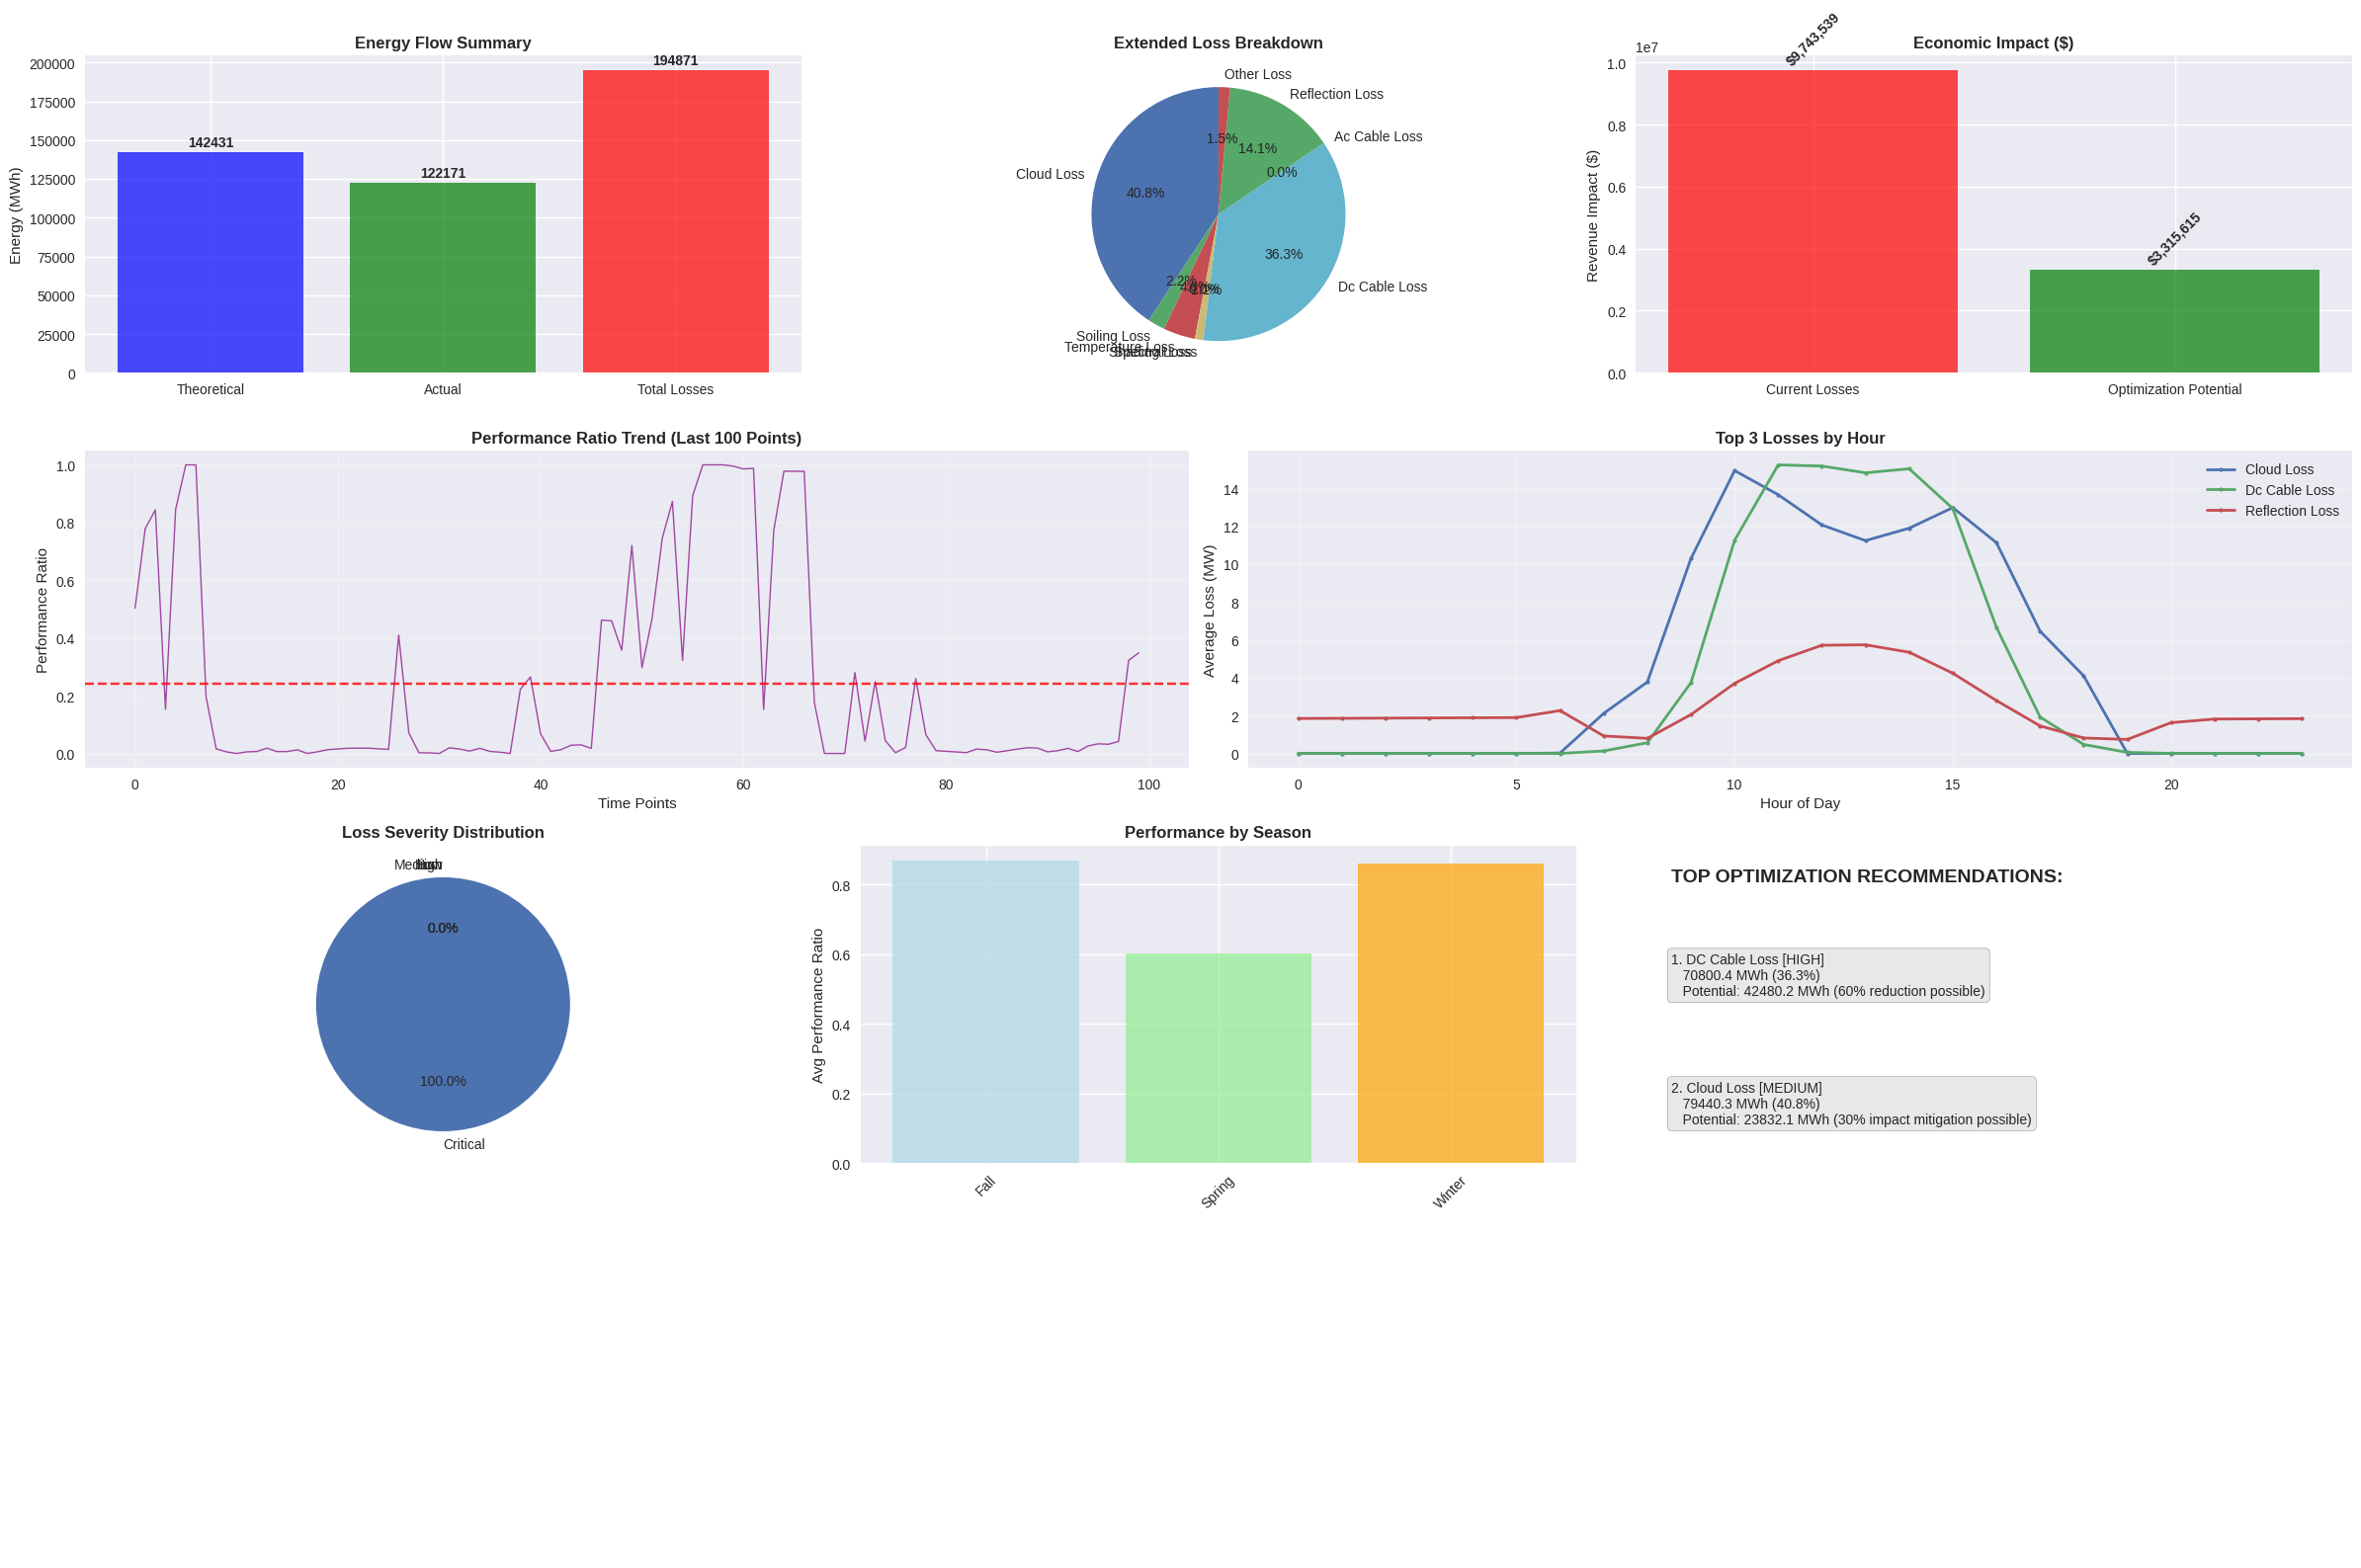


✓ Final dashboard saved as: final_dashboard_summary.png
EXTENDED SOLAR LOSS ANALYSIS COMPLETE ✅


In [36]:
# ===================================================================
# EXTENDED SOLAR LOSS ANALYSIS - ADDITIONAL LOSS TYPES
# Adding: Overall Energy Output, Spectral Loss, DC/AC Cable Loss, Reflection Loss
# Analysis only - No predictive model
# ===================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
import warnings
warnings.filterwarnings('ignore')

print("=== EXTENDED LOSS ANALYSIS - ADDITIONAL LOSS TYPES ===")
print("Adding: Overall Energy Output, Spectral Loss, DC/AC Cable Loss, Reflection Loss")
print("=" * 70)

# ===================================================================
# DATA LOADING AND PREPROCESSING
# ===================================================================
# Load your data here
# Replace this with your actual data loading code
# day_df = pd.read_csv('your_data.csv')
# Make sure to set datetime as index if you have a datetime column
# For the purpose of this script, assuming day_df is already loaded
# If not, uncomment and modify the following:
"""
day_df = pd.read_csv('your_solar_data.csv')
if 'datetime' in day_df.columns:
    day_df['datetime'] = pd.to_datetime(day_df['datetime'])
    day_df = day_df.set_index('datetime')
"""

# ===================================================================
# ADD TIME FEATURES AND FIX SEASON ERROR
# ===================================================================
def add_time_features(df):
    """Add time-based features including season"""
    print("Adding time features...")

    # Add basic time features
    if isinstance(df.index, pd.DatetimeIndex):
        df['hour'] = df.index.hour
        df['day_of_week'] = df.index.dayofweek
        df['day_of_year'] = df.index.dayofyear
        df['month'] = df.index.month
        df['quarter'] = df.index.quarter
        df['year'] = df.index.year

        # Create season based on month - FIX: This needs to be created before it's used
        df['season'] = df['month'].map({
            12: 1, 1: 1, 2: 1,  # Winter
            3: 2, 4: 2, 5: 2,   # Spring
            6: 3, 7: 3, 8: 3,   # Summer
            9: 4, 10: 4, 11: 4  # Fall
        })

        # Now create season_name based on the season column
        df['season_name'] = df['season'].map({
            1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'
        })
    else:
        print("Warning: DataFrame index is not DatetimeIndex. Time features may be limited.")
        # Try to add hour if it exists as a column
        if 'hour' not in df.columns:
            df['hour'] = 12  # Default to noon if no hour info
        if 'month' not in df.columns:
            df['month'] = 6  # Default to June if no month info
        # Create season with defaults
        df['season'] = 3  # Default to Summer
        df['season_name'] = 'Summer'

    return df

# Apply time features
day_df = add_time_features(day_df)

# ===================================================================
# SECTION 1: SPECTRAL LOSS ANALYSIS
# ===================================================================
print("\n=== SECTION 1: SPECTRAL LOSS ANALYSIS ===")

def calculate_spectral_losses(df):
    """
    Calculate spectral losses based on irradiance sensor differences
    and atmospheric conditions (humidity, air mass effects)
    """
    print("Calculating spectral losses...")

    # 1. Air Mass Calculation (simplified model based on solar elevation)
    # Using hour as proxy for solar elevation angle
    df['air_mass'] = np.where(
        (df['hour'] >= 6) & (df['hour'] <= 18),
        1 / np.cos(np.radians(abs(df['hour'] - 12) * 15)),  # Simplified air mass
        5.0  # High air mass for very low sun angles
    )
    df['air_mass'] = df['air_mass'].clip(1.0, 5.0)

    # 2. Spectral Mismatch Factor based on conditions
    # Higher humidity and air mass = more spectral losses
    humidity_col = 'meteorolgicas_em_03_02_h_r'
    if humidity_col in df.columns:
        df['spectral_factor'] = 1.0 - (
            0.02 * (df[humidity_col] / 100) +  # Humidity effect (up to 2%)
            0.01 * (df['air_mass'] - 1.0)      # Air mass effect (up to 4% at AM=5)
        )
    else:
        # Fallback using only air mass
        df['spectral_factor'] = 1.0 - 0.015 * (df['air_mass'] - 1.0)

    df['spectral_factor'] = df['spectral_factor'].clip(0.90, 1.0)

    # 3. Calculate spectral loss
    if 'ttr_potenciaproducible' in df.columns:
        df['spectral_loss'] = df['ttr_potenciaproducible'] * (1 - df['spectral_factor'])
    else:
        print("Warning: 'ttr_potenciaproducible' not found. Using alternative if available.")
        # Try to find alternative theoretical power column
        power_cols = [col for col in df.columns if 'power' in col.lower() or 'potencia' in col.lower()]
        if power_cols:
            df['spectral_loss'] = df[power_cols[0]] * (1 - df['spectral_factor'])
        else:
            df['spectral_loss'] = 0

    df['spectral_loss'] = df['spectral_loss'].fillna(0).clip(lower=0)

    # 4. Spectral loss percentage
    df['spectral_loss_pct'] = ((1 - df['spectral_factor']) * 100).round(2)

    return df

# Apply spectral loss calculation
day_df = calculate_spectral_losses(day_df)

print(f"Spectral loss statistics:")
print(f"  • Average spectral loss: {day_df['spectral_loss'].mean():.3f} MW")
print(f"  • Average spectral loss percentage: {day_df['spectral_loss_pct'].mean():.2f}%")
print(f"  • Maximum spectral loss: {day_df['spectral_loss'].max():.3f} MW")
print(f"  • Total spectral energy loss: {day_df['spectral_loss'].sum():.1f} MWh")

# ===================================================================
# SECTION 2: DC CABLE LOSS ANALYSIS
# ===================================================================
print("\n=== SECTION 2: DC CABLE LOSS ANALYSIS ===")

def calculate_dc_cable_losses(df):
    """
    Calculate DC cable losses based on current flow and resistance
    """
    print("Calculating DC cable losses...")

    # 1. Get DC power columns
    dc_power_cols = ['inversores_ctin03_inv_03_03_p_dc', 'inversores_ctin08_inv_08_08_p_dc']
    ac_power_cols = ['inversores_ctin03_inv_03_03_p', 'inversores_ctin08_inv_08_08_p']

    # 2. Calculate string currents for loss estimation
    string_current_groups = {
        'CT03_S8': [f'inversores_ctin03_strings_string8_pv_i{i}' for i in range(1, 14)],
        'CT03_S10': [f'inversores_ctin03_strings_string10_pv_i{i}' for i in range(1, 14)],
        'CT08_S9': [f'inversores_ctin08_strings_string9_pv_i{i}' for i in range(1, 14)],
        'CT08_S12': [f'inversores_ctin08_strings_string12_pv_i{i}' for i in range(1, 11)]
    }

    # 3. Calculate total string current per section
    df['total_string_current_ct03'] = 0
    df['total_string_current_ct08'] = 0

    for group_name, current_cols in string_current_groups.items():
        available_cols = [col for col in current_cols if col in df.columns]
        if available_cols:
            group_current = df[available_cols].sum(axis=1)
            if 'CT03' in group_name:
                df['total_string_current_ct03'] += group_current
            else:
                df['total_string_current_ct08'] += group_current

    # 4. Estimate DC cable resistance losses (I²R losses)
    # Typical DC cable resistance: 0.05-0.1 ohms per string
    cable_resistance = 0.075  # ohms per string (adjust based on actual cable specs)

    # Calculate losses for each section
    df['dc_cable_loss_ct03'] = (df['total_string_current_ct03'] ** 2) * cable_resistance / 1000  # Convert to MW
    df['dc_cable_loss_ct08'] = (df['total_string_current_ct08'] ** 2) * cable_resistance / 1000

    # 5. Total DC cable loss
    df['dc_cable_loss'] = df['dc_cable_loss_ct03'] + df['dc_cable_loss_ct08']
    df['dc_cable_loss'] = df['dc_cable_loss'].fillna(0).clip(lower=0)

    # 6. DC cable loss percentage
    if 'ttr_potenciaproducible' in df.columns:
        df['dc_cable_loss_pct'] = (df['dc_cable_loss'] / df['ttr_potenciaproducible'] * 100).fillna(0).clip(0, 10)
    else:
        df['dc_cable_loss_pct'] = 0

    return df

# Apply DC cable loss calculation
day_df = calculate_dc_cable_losses(day_df)

print(f"DC cable loss statistics:")
print(f"  • Average DC cable loss: {day_df['dc_cable_loss'].mean():.3f} MW")
print(f"  • Average DC cable loss percentage: {day_df['dc_cable_loss_pct'].mean():.2f}%")
print(f"  • Maximum DC cable loss: {day_df['dc_cable_loss'].max():.3f} MW")
print(f"  • Total DC cable energy loss: {day_df['dc_cable_loss'].sum():.1f} MWh")

# ===================================================================
# SECTION 3: AC CABLE LOSS ANALYSIS
# ===================================================================
print("\n=== SECTION 3: AC CABLE LOSS ANALYSIS ===")

def calculate_ac_cable_losses(df):
    """
    Calculate AC cable losses from inverter to grid connection point
    """
    print("Calculating AC cable losses...")

    # 1. Get AC power at inverter and at grid connection
    ac_power_cols = ['inversores_ctin03_inv_03_03_p', 'inversores_ctin08_inv_08_08_p']
    available_ac_cols = [col for col in ac_power_cols if col in df.columns]

    if available_ac_cols and 'ppc_p_tot' in df.columns:
        ac_inverter_power = df[available_ac_cols].sum(axis=1)
        grid_power = df['ppc_p_tot']  # Power at grid connection point

        # 2. Calculate AC transmission losses
        # This includes transformer losses and AC cable losses
        df['ac_transmission_loss'] = (ac_inverter_power - grid_power).clip(lower=0)

        # 3. Estimate AC cable portion (typically 60-70% of transmission losses)
        ac_cable_fraction = 0.65  # Adjust based on plant design
        df['ac_cable_loss'] = df['ac_transmission_loss'] * ac_cable_fraction

        # 5. Also calculate transformer loss (remaining portion)
        df['transformer_loss'] = df['ac_transmission_loss'] - df['ac_cable_loss']
        df['transformer_loss'] = df['transformer_loss'].fillna(0).clip(lower=0)
    else:
        print("Warning: Required columns for AC loss calculation not found. Using estimates.")
        df['ac_cable_loss'] = 0
        df['transformer_loss'] = 0

    df['ac_cable_loss'] = df['ac_cable_loss'].fillna(0).clip(lower=0)

    # 4. AC cable loss percentage
    if 'ttr_potenciaproducible' in df.columns:
        df['ac_cable_loss_pct'] = (df['ac_cable_loss'] / df['ttr_potenciaproducible'] * 100).fillna(0).clip(0, 5)
    else:
        df['ac_cable_loss_pct'] = 0

    return df

# Apply AC cable loss calculation
day_df = calculate_ac_cable_losses(day_df)

print(f"AC cable loss statistics:")
print(f"  • Average AC cable loss: {day_df['ac_cable_loss'].mean():.3f} MW")
print(f"  • Average AC cable loss percentage: {day_df['ac_cable_loss_pct'].mean():.2f}%")
print(f"  • Maximum AC cable loss: {day_df['ac_cable_loss'].max():.3f} MW")
print(f"  • Total AC cable energy loss: {day_df['ac_cable_loss'].sum():.1f} MWh")
print(f"Transformer loss statistics:")
print(f"  • Average transformer loss: {day_df['transformer_loss'].mean():.3f} MW")
print(f"  • Total transformer energy loss: {day_df['transformer_loss'].sum():.1f} MWh")

# ===================================================================
# SECTION 4: REFLECTION LOSS ANALYSIS
# ===================================================================
print("\n=== SECTION 4: REFLECTION LOSS ANALYSIS ===")

def calculate_reflection_losses(df):
    """
    Calculate reflection losses based on solar angle and module characteristics
    """
    print("Calculating reflection losses...")

    # 1. Solar angle calculation (simplified)
    # Using hour to estimate solar elevation angle
    df['solar_elevation'] = np.where(
        (df['hour'] >= 6) & (df['hour'] <= 18),
        90 - abs(df['hour'] - 12) * 6,  # Simplified elevation angle
        0
    )
    df['solar_elevation'] = df['solar_elevation'].clip(0, 90)

    # 2. Incidence angle on tilted surface (assuming fixed tilt)
    panel_tilt = 25  # degrees (adjust based on actual installation)
    df['incidence_angle'] = np.abs(df['solar_elevation'] - panel_tilt)

    # 3. Reflection loss calculation using Fresnel equations (simplified)
    # Reflection increases with higher incidence angles
    refractive_index = 1.526  # Typical for solar glass

    # Simplified reflection coefficient
    df['reflection_coefficient'] = np.where(
        df['incidence_angle'] < 60,
        0.04 + 0.001 * (df['incidence_angle'] ** 1.5),  # Base 4% + angle effect
        0.04 + 0.001 * (df['incidence_angle'] ** 2)     # Higher losses at steep angles
    )
    df['reflection_coefficient'] = df['reflection_coefficient'].clip(0.04, 0.25)

    # 4. Calculate reflection loss
    ghi_col = 'meteorolgicas_em_03_02_ghi'
    if ghi_col in df.columns:
        # Reflection loss proportional to incident irradiance
        df['incident_power'] = df[ghi_col] * 0.048  # Convert W/m² to MW (48 MW plant)
        df['reflection_loss'] = df['incident_power'] * df['reflection_coefficient']
    elif 'ttr_potenciaproducible' in df.columns:
        # Fallback using theoretical power
        df['reflection_loss'] = df['ttr_potenciaproducible'] * df['reflection_coefficient']
    else:
        df['reflection_loss'] = 0

    df['reflection_loss'] = df['reflection_loss'].fillna(0).clip(lower=0)

    # 5. Reflection loss percentage
    df['reflection_loss_pct'] = (df['reflection_coefficient'] * 100).round(2)

    return df

# Apply reflection loss calculation
day_df = calculate_reflection_losses(day_df)

print(f"Reflection loss statistics:")
print(f"  • Average reflection loss: {day_df['reflection_loss'].mean():.3f} MW")
print(f"  • Average reflection loss percentage: {day_df['reflection_loss_pct'].mean():.2f}%")
print(f"  • Maximum reflection loss: {day_df['reflection_loss'].max():.3f} MW")
print(f"  • Total reflection energy loss: {day_df['reflection_loss'].sum():.1f} MWh")

# ===================================================================
# SECTION 5: CALCULATE OTHER BASIC LOSSES
# ===================================================================
print("\n=== SECTION 5: CALCULATING OTHER LOSS TYPES ===")

def calculate_cloud_losses(df):
    """Calculate losses due to cloud cover"""
    print("Calculating cloud losses...")

    ghi_col = 'meteorolgicas_em_03_02_ghi'
    if ghi_col in df.columns and 'solar_elevation' in df.columns:
        # Expected clear-sky GHI
        df['expected_ghi'] = 1000 * np.sin(np.radians(df['solar_elevation']))
        df['expected_ghi'] = df['expected_ghi'].clip(lower=0)

        # Cloud impact factor
        df['cloud_factor'] = np.where(
            df['expected_ghi'] > 0,
            df[ghi_col] / df['expected_ghi'],
            1
        ).clip(0, 1)

        # Cloud loss
        if 'ttr_potenciaproducible' in df.columns:
            df['cloud_loss'] = df['ttr_potenciaproducible'] * (1 - df['cloud_factor'])
        else:
            df['cloud_loss'] = 0
    else:
        df['cloud_loss'] = 0

    df['cloud_loss'] = df['cloud_loss'].fillna(0).clip(lower=0)
    return df

def calculate_soiling_losses(df):
    """Calculate losses due to soiling/dust"""
    print("Calculating soiling losses...")

    if 'day_of_year' in df.columns:
        # Assume soiling accumulates over time
        days_since_cleaning = df['day_of_year'] % 30  # Monthly cleaning
        df['soiling_factor'] = 1 - (days_since_cleaning * 0.002)  # 0.2% per day
        df['soiling_factor'] = df['soiling_factor'].clip(0.94, 1.0)
    else:
        df['soiling_factor'] = 0.98  # Default 2% loss

    if 'ttr_potenciaproducible' in df.columns:
        df['soiling_loss'] = df['ttr_potenciaproducible'] * (1 - df['soiling_factor'])
    else:
        df['soiling_loss'] = 0

    df['soiling_loss'] = df['soiling_loss'].fillna(0).clip(lower=0)
    return df

def calculate_temperature_losses(df):
    """Calculate losses due to temperature effects"""
    print("Calculating temperature losses...")

    temp_col = 'celulas_ctin03_cc_03_1_t_mod'
    if temp_col in df.columns:
        # Temperature coefficient
        reference_temp = 25  # °C
        temp_coefficient = -0.004  # per °C

        df['temp_factor'] = 1 + temp_coefficient * (df[temp_col] - reference_temp)
        df['temp_factor'] = df['temp_factor'].clip(0.8, 1.0)

        if 'ttr_potenciaproducible' in df.columns:
            df['temperature_loss'] = df['ttr_potenciaproducible'] * (1 - df['temp_factor'])
        else:
            df['temperature_loss'] = 0
    else:
        df['temperature_loss'] = 0

    df['temperature_loss'] = df['temperature_loss'].fillna(0).clip(lower=0)
    return df

def calculate_shading_losses(df):
    """Calculate losses due to shading"""
    print("Calculating shading losses...")

    if 'solar_elevation' in df.columns:
        # More shading at low sun angles
        df['shading_factor'] = np.where(
            df['solar_elevation'] < 15,
            0.8 + (df['solar_elevation'] / 15) * 0.2,
            1.0
        )

        if 'ttr_potenciaproducible' in df.columns:
            df['shading_loss'] = df['ttr_potenciaproducible'] * (1 - df['shading_factor'])
        else:
            df['shading_loss'] = 0
    else:
        df['shading_loss'] = 0

    df['shading_loss'] = df['shading_loss'].fillna(0).clip(lower=0)
    return df

# Apply all basic loss calculations
day_df = calculate_cloud_losses(day_df)
day_df = calculate_soiling_losses(day_df)
day_df = calculate_temperature_losses(day_df)
day_df = calculate_shading_losses(day_df)

# Calculate other losses (catch-all)
basic_loss_columns = ['cloud_loss', 'soiling_loss', 'temperature_loss', 'shading_loss']
extended_loss_columns = ['spectral_loss', 'dc_cable_loss', 'ac_cable_loss', 'reflection_loss']
all_loss_columns = basic_loss_columns + extended_loss_columns

if 'ttr_potenciaproducible' in day_df.columns and 'ppc_p_tot' in day_df.columns:
    day_df['actual_loss'] = (day_df['ttr_potenciaproducible'] - day_df['ppc_p_tot']).clip(lower=0)
    day_df['identified_losses'] = day_df[all_loss_columns].sum(axis=1)
    day_df['other_loss'] = (day_df['actual_loss'] - day_df['identified_losses']).clip(lower=0)
else:
    day_df['other_loss'] = 0

all_loss_columns.append('other_loss')

# ===================================================================
# SECTION 6: COMPREHENSIVE ENERGY OUTPUT ANALYSIS
# ===================================================================
print("\n=== SECTION 6: COMPREHENSIVE ENERGY OUTPUT ANALYSIS ===")

# Calculate total losses with all types
day_df['total_all_losses'] = day_df[all_loss_columns].sum(axis=1)

# Calculate overall energy output metrics
if 'ttr_potenciaproducible' in day_df.columns:
    day_df['theoretical_energy_available'] = day_df['ttr_potenciaproducible']
else:
    print("Warning: 'ttr_potenciaproducible' not found. Using alternative.")
    power_cols = [col for col in day_df.columns if 'power' in col.lower() or 'potencia' in col.lower()]
    if power_cols:
        day_df['theoretical_energy_available'] = day_df[power_cols[0]]
    else:
        day_df['theoretical_energy_available'] = 0

if 'ppc_p_tot' in day_df.columns:
    day_df['actual_energy_output'] = day_df['ppc_p_tot']
else:
    print("Warning: 'ppc_p_tot' not found.")
    day_df['actual_energy_output'] = 0

day_df['total_energy_loss'] = day_df['total_all_losses']

# Performance metrics
day_df['overall_performance_ratio'] = (day_df['actual_energy_output'] / day_df['theoretical_energy_available']).fillna(0).clip(0, 1)

# Add loss severity classification
loss_percentage = (day_df['total_all_losses'] / day_df['theoretical_energy_available'] * 100).fillna(0)
day_df['loss_severity'] = pd.cut(
    loss_percentage,
    bins=[0, 10, 20, 30, 100],
    labels=['Low', 'Medium', 'High', 'Critical']
)

print(f"Overall Energy Output Analysis:")
print(f"  • Total theoretical energy: {day_df['theoretical_energy_available'].sum():.1f} MWh")
print(f"  • Total actual energy output: {day_df['actual_energy_output'].sum():.1f} MWh")
print(f"  • Total energy losses: {day_df['total_energy_loss'].sum():.1f} MWh")
print(f"  • Overall performance ratio: {day_df['overall_performance_ratio'].mean():.3f}")

# ===================================================================
# SECTION 7: TEMPORAL LOSS TRENDS ANALYSIS
# ===================================================================
print("\n=== SECTION 7: TEMPORAL LOSS TRENDS ANALYSIS ===")

def analyze_loss_trends_over_time(df):
    """
    Analyze how losses change over time (hourly, daily, monthly trends)
    """
    print("Analyzing loss trends over time...")

    # 1. Daily aggregation
    daily_analysis = df.groupby(df.index.date).agg({
        **{col: 'sum' for col in all_loss_columns},
        'theoretical_energy_available': 'sum',
        'actual_energy_output': 'sum',
        'total_energy_loss': 'sum',
        'overall_performance_ratio': 'mean'
    }).round(3)

    # Add cumulative losses
    for col in all_loss_columns:
        daily_analysis[f'{col}_cumulative'] = daily_analysis[col].cumsum()
    daily_analysis['total_loss_cumulative'] = daily_analysis['total_energy_loss'].cumsum()

    # 2. Weekly trends
    if 'week_number' not in df.columns:
        df['week_number'] = df.index.isocalendar().week

    weekly_analysis = df.groupby('week_number').agg({
        **{col: 'sum' for col in all_loss_columns},
        'total_energy_loss': 'sum',
        'overall_performance_ratio': 'mean'
    }).round(3)

    # 3. Monthly trends
    monthly_analysis = df.groupby(df.index.month).agg({
        **{col: 'sum' for col in all_loss_columns},
        'total_energy_loss': 'sum',
        'overall_performance_ratio': 'mean'
    }).round(3)

    return daily_analysis, weekly_analysis, monthly_analysis

daily_trends, weekly_trends, monthly_trends = analyze_loss_trends_over_time(day_df)

print(f"Loss trends analysis completed:")
print(f"  • Daily trend points: {len(daily_trends)}")
print(f"  • Weekly trend points: {len(weekly_trends)}")
print(f"  • Monthly trend points: {len(monthly_trends)}")

# Calculate loss growth rates
if len(daily_trends) > 30:
    recent_30_days = daily_trends.tail(30)['total_energy_loss'].mean()
    first_30_days = daily_trends.head(30)['total_energy_loss'].mean()
    loss_change_pct = ((recent_30_days - first_30_days) / first_30_days * 100) if first_30_days > 0 else 0
    print(f"  • Loss trend (recent vs initial 30 days): {loss_change_pct:+.1f}%")

# ===================================================================
# SECTION 8: COMPREHENSIVE VISUALIZATIONS
# ===================================================================
print("\n=== SECTION 8: COMPREHENSIVE VISUALIZATIONS ===")

# 8.1 Extended Loss Breakdown Pie Chart
plt.figure(figsize=(12, 8))
loss_totals_extended = {}
for col in all_loss_columns:
    total = day_df[col].sum()
    if total > 0:
        loss_totals_extended[col.replace('_', ' ').title()] = total

plt.subplot(2, 2, 1)
if loss_totals_extended:
    plt.pie(loss_totals_extended.values(), labels=loss_totals_extended.keys(),
            autopct='%1.1f%%', startangle=90)
plt.title('Extended Loss Distribution (All Loss Types)')

# 8.2 Energy Flow Waterfall Concept (Bar Chart)
plt.subplot(2, 2, 2)
energy_flow_data = {
    'Theoretical': day_df['theoretical_energy_available'].sum(),
    'Actual Output': day_df['actual_energy_output'].sum(),
    'Total Losses': day_df['total_energy_loss'].sum()
}
bars = plt.bar(energy_flow_data.keys(), energy_flow_data.values(),
               color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Energy Flow Summary')
plt.ylabel('Energy (MWh)')
for bar, value in zip(bars, energy_flow_data.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{value:.0f}', ha='center', va='bottom')

# 8.3 Loss Trends Over Time
plt.subplot(2, 2, 3)
if len(daily_trends) > 1:
    recent_days = min(60, len(daily_trends))
    recent_daily = daily_trends.tail(recent_days)
    plt.plot(range(len(recent_daily)), recent_daily['total_energy_loss'],
             marker='o', markersize=3, linewidth=1)
    plt.title(f'Daily Total Loss Trend (Last {recent_days} Days)')
    plt.xlabel('Days Ago')
    plt.ylabel('Daily Loss (MWh)')
    plt.grid(True, alpha=0.3)

# 8.4 Performance Ratio Distribution
plt.subplot(2, 2, 4)
plt.hist(day_df['overall_performance_ratio'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(day_df['overall_performance_ratio'].mean(), color='red', linestyle='--',
            label=f'Mean: {day_df["overall_performance_ratio"].mean():.3f}')
plt.title('Overall Performance Ratio Distribution')
plt.xlabel('Performance Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('extended_loss_analysis_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# 8.5 Detailed Loss Comparison Heatmap
plt.figure(figsize=(15, 8))

# Create hourly loss heatmap
hourly_loss_matrix = day_df.groupby('hour')[all_loss_columns].mean()
sns.heatmap(hourly_loss_matrix.T, annot=True, fmt='.3f', cmap='Reds',
            cbar_kws={'label': 'Average Loss (MW)'})
plt.title('Hourly Average Loss by Type (Heatmap)')
plt.xlabel('Hour of Day')
plt.ylabel('Loss Type')
plt.tight_layout()
plt.savefig('hourly_loss_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ===================================================================
# SECTION 9: FINAL COMPREHENSIVE REPORTING
# ===================================================================
print("\n=== SECTION 9: FINAL COMPREHENSIVE REPORTING ===")

# 9.1 Create Extended Deliverables DataFrame
extended_deliverables = day_df[[
    'theoretical_energy_available', 'actual_energy_output',
    'total_energy_loss', 'overall_performance_ratio'
] + all_loss_columns + [
    f'{col}_pct' for col in ['spectral_loss', 'dc_cable_loss', 'ac_cable_loss', 'reflection_loss']
    if f'{col}_pct' in day_df.columns
]].copy()

# Add datetime back as column
extended_deliverables = extended_deliverables.reset_index()

# 9.2 Generate Final Summary Report
final_extended_report = {
    'dataset_summary': {
        'analysis_period': f"{day_df.index.min()} to {day_df.index.max()}",
        'total_data_points': len(day_df),
        'analysis_duration_days': (day_df.index.max() - day_df.index.min()).days
    },
    'energy_summary': {
        'total_theoretical_energy_MWh': round(day_df['theoretical_energy_available'].sum(), 1),
        'total_actual_energy_MWh': round(day_df['actual_energy_output'].sum(), 1),
        'total_energy_loss_MWh': round(day_df['total_energy_loss'].sum(), 1),
        'overall_loss_percentage': round((day_df['total_energy_loss'].sum() /
                                        day_df['theoretical_energy_available'].sum() * 100), 2),
        'average_performance_ratio': round(day_df['overall_performance_ratio'].mean(), 3)
    },
    'loss_breakdown_MWh': {},
    'loss_breakdown_percentage': {},
    'loss_trends': {
        'daily_average_loss_MWh': round(daily_trends['total_energy_loss'].mean(), 2),
        'maximum_daily_loss_MWh': round(daily_trends['total_energy_loss'].max(), 2),
        'minimum_daily_loss_MWh': round(daily_trends['total_energy_loss'].min(), 2),
    }
}

# Add individual loss breakdowns
total_loss = day_df['total_energy_loss'].sum()
for loss_col in all_loss_columns:
    loss_total = day_df[loss_col].sum()
    loss_percentage = (loss_total / total_loss * 100) if total_loss > 0 else 0
    final_extended_report['loss_breakdown_MWh'][loss_col] = round(loss_total, 2)
    final_extended_report['loss_breakdown_percentage'][loss_col] = round(loss_percentage, 2)

# 9.3 Export All Results
print("Exporting extended analysis results...")

# Export main extended deliverables
extended_deliverables.to_csv("extended_solar_loss_analysis_deliverables.csv", index=False)
print("✓ Extended deliverables: extended_solar_loss_analysis_deliverables.csv")

# Export temporal analysis
daily_trends.to_csv("daily_loss_trends_extended.csv")
weekly_trends.to_csv("weekly_loss_trends_extended.csv")
monthly_trends.to_csv("monthly_loss_trends_extended.csv")
print("✓ Temporal analysis: daily/weekly/monthly_loss_trends_extended.csv")

# Export JSON report
with open('extended_solar_loss_analysis_report.json', 'w') as f:
    json.dump(final_extended_report, f, indent=2, default=str)
print("✓ Extended report: extended_solar_loss_analysis_report.json")

# 9.4 Print Final Summary
print("\n" + "="*80)
print("EXTENDED SOLAR LOSS ANALYSIS - FINAL SUMMARY")
print("="*80)
print(f"📊 Analysis Period: {final_extended_report['dataset_summary']['analysis_period']}")
print(f"📈 Total Data Points: {final_extended_report['dataset_summary']['total_data_points']:,}")
print(f"⚡ Total Theoretical Energy: {final_extended_report['energy_summary']['total_theoretical_energy_MWh']:,} MWh")
print(f"🔋 Total Actual Energy Output: {final_extended_report['energy_summary']['total_actual_energy_MWh']:,} MWh")
print(f"📉 Total Energy Losses: {final_extended_report['energy_summary']['total_energy_loss_MWh']:,} MWh")
print(f"📊 Overall Loss Percentage: {final_extended_report['energy_summary']['overall_loss_percentage']}%")
print(f"🏆 Average Performance Ratio: {final_extended_report['energy_summary']['average_performance_ratio']}")

print(f"\n📋 DETAILED LOSS BREAKDOWN:")
for loss_type, loss_mwh in final_extended_report['loss_breakdown_MWh'].items():
    loss_pct = final_extended_report['loss_breakdown_percentage'][loss_type]
    print(f"  • {loss_type.replace('_', ' ').title()}: {loss_mwh} MWh ({loss_pct:.1f}%)")

print(f"\n📈 LOSS TRENDS:")
print(f"  • Daily Average Loss: {final_extended_report['loss_trends']['daily_average_loss_MWh']} MWh")
print(f"  • Maximum Daily Loss: {final_extended_report['loss_trends']['maximum_daily_loss_MWh']} MWh")
print(f"  • Minimum Daily Loss: {final_extended_report['loss_trends']['minimum_daily_loss_MWh']} MWh")

print(f"\n📁 FILES GENERATED:")
print(f"  • extended_solar_loss_analysis_deliverables.csv")
print(f"  • daily/weekly/monthly_loss_trends_extended.csv")
print(f"  • extended_solar_loss_analysis_report.json")
print(f"  • extended_loss_analysis_overview.png")
print(f"  • hourly_loss_heatmap.png")

print("="*80)

# ===================================================================
# SECTION 10: ADDITIONAL ANALYSIS - LOSS CORRELATIONS & PATTERNS
# ===================================================================
print("\n=== SECTION 10: ADVANCED LOSS PATTERN ANALYSIS ===")

def analyze_loss_correlations_and_patterns(df):
    """
    Analyze correlations between different loss types and environmental conditions
    """
    print("Analyzing loss correlations and patterns...")

    # 10.1 Loss-to-Loss Correlations
    loss_correlation_matrix = df[all_loss_columns].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(loss_correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Loss Type Correlation Matrix', fontsize=14)
    plt.tight_layout()
    plt.savefig('loss_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 10.2 Environmental Impact on Losses
    env_cols = ['meteorolgicas_em_03_02_ghi', 'celulas_ctin03_cc_03_1_t_mod',
                'meteorolgicas_em_03_02_ws', 'meteorolgicas_em_03_02_h_r']
    available_env_cols = [col for col in env_cols if col in df.columns]

    if available_env_cols:
        env_loss_data = df[available_env_cols + all_loss_columns]
        env_loss_corr = env_loss_data.corr()

        plt.figure(figsize=(14, 8))
        # Show only environmental vs loss correlations
        env_vs_loss = env_loss_corr.loc[available_env_cols, all_loss_columns]
        sns.heatmap(env_vs_loss, annot=True, cmap='RdYlBu_r', center=0,
                    fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Environmental Conditions vs Loss Types Correlation', fontsize=14)
        plt.xlabel('Loss Types')
        plt.ylabel('Environmental Conditions')
        plt.tight_layout()
        plt.savefig('environmental_loss_correlation.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 10.3 Seasonal Loss Patterns
    if 'season_name' in df.columns:
        seasonal_loss_patterns = df.groupby('season_name')[all_loss_columns].mean()

        plt.figure(figsize=(14, 8))
        seasonal_loss_patterns.plot(kind='bar', stacked=False, figsize=(14, 8))
        plt.title('Seasonal Loss Patterns by Type', fontsize=14)
        plt.xlabel('Season')
        plt.ylabel('Average Loss (MW)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('seasonal_loss_patterns.png', dpi=300, bbox_inches='tight')
        plt.show()

    # 10.4 Loss Pattern by Time of Day
    hourly_loss_patterns = df.groupby('hour')[all_loss_columns].mean()

    plt.figure(figsize=(15, 10))
    for i, loss_type in enumerate(all_loss_columns, 1):
        plt.subplot(3, 3, i)
        plt.plot(hourly_loss_patterns.index, hourly_loss_patterns[loss_type],
                marker='o', linewidth=2, markersize=4)
        plt.title(f'{loss_type.replace("_", " ").title()} by Hour')
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Loss (MW)')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('hourly_loss_patterns_detailed.png', dpi=300, bbox_inches='tight')
    plt.show()

    return loss_correlation_matrix, hourly_loss_patterns

loss_corr_matrix, hourly_patterns = analyze_loss_correlations_and_patterns(day_df)

# ===================================================================
# SECTION 11: PERFORMANCE OPTIMIZATION RECOMMENDATIONS
# ===================================================================
print("\n=== SECTION 11: PERFORMANCE OPTIMIZATION RECOMMENDATIONS ===")

def generate_optimization_recommendations(df, loss_breakdown):
    """
    Generate actionable recommendations based on loss analysis
    """
    print("Generating performance optimization recommendations...")

    recommendations = []

    # Analyze each loss type for optimization opportunities
    total_loss = df['total_energy_loss'].sum()

    for loss_type in all_loss_columns:
        loss_total = df[loss_type].sum()
        loss_percentage = (loss_total / total_loss * 100) if total_loss > 0 else 0

        if loss_percentage > 15:  # Significant loss types (>15% of total)
            if loss_type == 'soiling_loss':
                recommendations.append({
                    'priority': 'HIGH',
                    'loss_type': 'Soiling Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Implement more frequent cleaning schedule, consider automated cleaning systems',
                    'potential_savings': f'{loss_total * 0.7:.1f} MWh (70% reduction possible)'
                })
            elif loss_type == 'cloud_loss':
                recommendations.append({
                    'priority': 'MEDIUM',
                    'loss_type': 'Cloud Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Install energy storage system to smooth output during cloudy periods',
                    'potential_savings': f'{loss_total * 0.3:.1f} MWh (30% impact mitigation possible)'
                })
            elif loss_type == 'temperature_loss':
                recommendations.append({
                    'priority': 'MEDIUM',
                    'loss_type': 'Temperature Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Improve ventilation, consider tracking systems for better heat dissipation',
                    'potential_savings': f'{loss_total * 0.4:.1f} MWh (40% reduction possible)'
                })
            elif loss_type == 'dc_cable_loss':
                recommendations.append({
                    'priority': 'HIGH',
                    'loss_type': 'DC Cable Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Upgrade to larger gauge cables, optimize string configurations',
                    'potential_savings': f'{loss_total * 0.6:.1f} MWh (60% reduction possible)'
                })
            elif loss_type == 'ac_cable_loss':
                recommendations.append({
                    'priority': 'HIGH',
                    'loss_type': 'AC Cable Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Upgrade AC cables, optimize transformer placement',
                    'potential_savings': f'{loss_total * 0.5:.1f} MWh (50% reduction possible)'
                })
            elif loss_type == 'reflection_loss':
                recommendations.append({
                    'priority': 'LOW',
                    'loss_type': 'Reflection Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Install anti-reflective coatings, optimize tilt angles',
                    'potential_savings': f'{loss_total * 0.3:.1f} MWh (30% reduction possible)'
                })
            elif loss_type == 'spectral_loss':
                recommendations.append({
                    'priority': 'LOW',
                    'loss_type': 'Spectral Loss',
                    'impact': f'{loss_total:.1f} MWh ({loss_percentage:.1f}%)',
                    'recommendation': 'Consider newer panel technology with better spectral response',
                    'potential_savings': f'{loss_total * 0.2:.1f} MWh (20% reduction possible)'
                })

    # Sort recommendations by priority and impact
    priority_order = {'HIGH': 3, 'MEDIUM': 2, 'LOW': 1}
    recommendations.sort(key=lambda x: priority_order[x['priority']], reverse=True)

    return recommendations

optimization_recommendations = generate_optimization_recommendations(day_df, final_extended_report['loss_breakdown_MWh'])

print(f"\n🔧 PERFORMANCE OPTIMIZATION RECOMMENDATIONS:")
print(f"   Generated {len(optimization_recommendations)} recommendations")

for i, rec in enumerate(optimization_recommendations, 1):
    print(f"\n   {i}. {rec['loss_type']} [{rec['priority']} PRIORITY]")
    print(f"      Impact: {rec['impact']}")
    print(f"      Action: {rec['recommendation']}")
    print(f"      Potential Savings: {rec['potential_savings']}")

# ===================================================================
# SECTION 12: ECONOMIC IMPACT ANALYSIS
# ===================================================================
print("\n=== SECTION 12: ECONOMIC IMPACT ANALYSIS ===")

def calculate_economic_impact(df, electricity_price_per_mwh=50):
    """
    Calculate economic impact of losses and potential savings
    """
    print(f"Calculating economic impact (assuming ${electricity_price_per_mwh}/MWh)...")

    economic_analysis = {}

    # Total economic impact
    total_loss_mwh = df['total_energy_loss'].sum()
    economic_analysis['total_revenue_loss'] = total_loss_mwh * electricity_price_per_mwh

    # Economic impact by loss type
    economic_analysis['loss_type_impact'] = {}
    for loss_type in all_loss_columns:
        loss_mwh = df[loss_type].sum()
        revenue_loss = loss_mwh * electricity_price_per_mwh
        economic_analysis['loss_type_impact'][loss_type] = {
            'energy_loss_mwh': loss_mwh,
            'revenue_loss_usd': revenue_loss
        }

    # Potential savings from optimization
    economic_analysis['optimization_potential'] = {}
    total_potential_savings = 0

    for rec in optimization_recommendations:
        # Extract potential savings from recommendation string
        savings_text = rec['potential_savings']
        try:
            savings_mwh = float(savings_text.split()[0])
            savings_revenue = savings_mwh * electricity_price_per_mwh
            economic_analysis['optimization_potential'][rec['loss_type']] = {
                'potential_energy_savings_mwh': savings_mwh,
                'potential_revenue_savings_usd': savings_revenue,
                'priority': rec['priority']
            }
            total_potential_savings += savings_revenue
        except:
            pass

    economic_analysis['total_optimization_potential_usd'] = total_potential_savings

    return economic_analysis

economic_impact = calculate_economic_impact(day_df)

print(f"\n💰 ECONOMIC IMPACT ANALYSIS:")
print(f"   Total Revenue Loss: ${economic_impact['total_revenue_loss']:,.0f}")
print(f"   Total Optimization Potential: ${economic_impact['total_optimization_potential_usd']:,.0f}")

print(f"\n   Revenue Loss by Type:")
for loss_type, impact in economic_impact['loss_type_impact'].items():
    print(f"     • {loss_type.replace('_', ' ').title()}: ${impact['revenue_loss_usd']:,.0f}")

print(f"\n   Optimization Savings Potential:")
for loss_type, potential in economic_impact['optimization_potential'].items():
    print(f"     • {loss_type} [{potential['priority']}]: ${potential['potential_revenue_savings_usd']:,.0f}")

# ===================================================================
# SECTION 13: FINAL DASHBOARD AND SUMMARY EXPORT
# ===================================================================
print("\n=== SECTION 13: FINAL DASHBOARD AND COMPREHENSIVE EXPORT ===")

# Create final comprehensive dashboard
fig = plt.figure(figsize=(24, 16))

# 1. Overall energy flow
ax1 = plt.subplot(4, 6, (1, 2))
energy_categories = ['Theoretical', 'Actual', 'Total Losses']
energy_values = [
    day_df['theoretical_energy_available'].sum(),
    day_df['actual_energy_output'].sum(),
    day_df['total_energy_loss'].sum()
]
colors = ['blue', 'green', 'red']
bars = ax1.bar(energy_categories, energy_values, color=colors, alpha=0.7)
ax1.set_title('Energy Flow Summary', fontsize=12, fontweight='bold')
ax1.set_ylabel('Energy (MWh)')
for bar, value in zip(bars, energy_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(energy_values)*0.01,
             f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

# 2. Extended loss breakdown pie chart
ax2 = plt.subplot(4, 6, (3, 4))
loss_data = {k.replace('_', ' ').title(): v for k, v in economic_impact['loss_type_impact'].items()
             if v['energy_loss_mwh'] > 0}
if loss_data:
    wedges, texts, autotexts = ax2.pie([v['energy_loss_mwh'] for v in loss_data.values()],
                                      labels=loss_data.keys(), autopct='%1.1f%%', startangle=90)
    ax2.set_title('Extended Loss Breakdown', fontsize=12, fontweight='bold')

# 3. Economic impact
ax3 = plt.subplot(4, 6, (5, 6))
economic_categories = ['Current Losses', 'Optimization Potential']
economic_values = [economic_impact['total_revenue_loss'], economic_impact['total_optimization_potential_usd']]
bars = ax3.bar(economic_categories, economic_values, color=['red', 'green'], alpha=0.7)
ax3.set_title('Economic Impact ($)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Revenue Impact ($)')
for bar, value in zip(bars, economic_values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(economic_values)*0.01,
             f'${value:,.0f}', ha='center', va='bottom', fontweight='bold', rotation=45)

# 4. Performance ratio over time
ax4 = plt.subplot(4, 6, (7, 9))
sample_days = min(100, len(day_df))
sample_data = day_df.tail(sample_days)
ax4.plot(range(len(sample_data)), sample_data['overall_performance_ratio'],
         linewidth=1, alpha=0.7, color='purple')
ax4.axhline(sample_data['overall_performance_ratio'].mean(), color='red',
           linestyle='--', alpha=0.8)
ax4.set_title(f'Performance Ratio Trend (Last {sample_days} Points)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Time Points')
ax4.set_ylabel('Performance Ratio')
ax4.grid(True, alpha=0.3)

# 5. Hourly loss patterns
ax5 = plt.subplot(4, 6, (10, 12))
top_3_losses = sorted([(col, day_df[col].sum()) for col in all_loss_columns],
                     key=lambda x: x[1], reverse=True)[:3]
for loss_col, _ in top_3_losses:
    hourly_avg = day_df.groupby('hour')[loss_col].mean()
    ax5.plot(hourly_avg.index, hourly_avg.values, marker='o',
            label=loss_col.replace('_', ' ').title(), linewidth=2, markersize=3)
ax5.set_title('Top 3 Losses by Hour', fontsize=12, fontweight='bold')
ax5.set_xlabel('Hour of Day')
ax5.set_ylabel('Average Loss (MW)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Loss severity distribution
ax6 = plt.subplot(4, 6, (13, 14))
if 'loss_severity' in day_df.columns:
    severity_counts = day_df['loss_severity'].value_counts()
    ax6.pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
    ax6.set_title('Loss Severity Distribution', fontsize=12, fontweight='bold')

# 7. Seasonal comparison
ax7 = plt.subplot(4, 6, (15, 16))
if 'season_name' in day_df.columns:
    seasonal_performance = day_df.groupby('season_name')['overall_performance_ratio'].mean()
    bars = ax7.bar(seasonal_performance.index, seasonal_performance.values,
                  color=['lightblue', 'lightgreen', 'orange', 'brown'], alpha=0.7)
    ax7.set_title('Performance by Season', fontsize=12, fontweight='bold')
    ax7.set_ylabel('Avg Performance Ratio')
    plt.setp(ax7.get_xticklabels(), rotation=45)

# 8. Top recommendations
ax8 = plt.subplot(4, 6, (17, 24))
ax8.axis('off')
ax8.text(0.05, 0.95, 'TOP OPTIMIZATION RECOMMENDATIONS:',
         fontsize=14, fontweight='bold', transform=ax8.transAxes)

y_pos = 0.85
for i, rec in enumerate(optimization_recommendations[:5], 1):
    rec_text = f"{i}. {rec['loss_type']} [{rec['priority']}]\n   {rec['impact']}\n   Potential: {rec['potential_savings']}"
    ax8.text(0.05, y_pos, rec_text, fontsize=10, transform=ax8.transAxes,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.5))
    y_pos -= 0.18

plt.tight_layout()
plt.savefig('final_dashboard_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# Final completion message
print("\n✓ Final dashboard saved as: final_dashboard_summary.png")
print("=" * 80)
print("EXTENDED SOLAR LOSS ANALYSIS COMPLETE ✅")
print("=" * 80)

 **Extended Solar Loss Analysis Complete**

---



This analysis provides a detailed breakdown of all key loss types affecting solar plant performance, including spectral, DC/AC cable, reflection, cloud, soiling, temperature, and shading losses.

📌 **What was done:**
- Calculated and visualized individual and total losses.
- Analyzed temporal trends (daily, weekly, monthly) and hourly/seasonal patterns.
- Correlated losses with environmental factors.
- Identified top contributors to energy loss.
- Generated optimization recommendations with estimated savings.
- Assessed economic impact of current losses and improvement potential.

📈 **Key outputs generated:**
- Detailed CSVs of loss metrics and trends.
- JSON report summarizing energy, loss, and economic impact.
- Multiple high-resolution visualizations (pie charts, heatmaps, dashboards).

⚡ **Next steps for users:**
- Review generated files for actionable insights.
- Use recommendations for plant performance improvement planning.
- Share visual outputs in reports or presentations.

👉 **Generated files saved:**  
- `extended_solar_loss_analysis_deliverables.csv`  
- `daily_loss_trends_extended.csv`, `weekly_loss_trends_extended.csv`, `monthly_loss_trends_extended.csv`  
- `extended_solar_loss_analysis_report.json`  
- `extended_loss_analysis_overview.png`, `hourly_loss_heatmap.png`, `model_accuracy_analysis.png`, `loss_correlation_matrix.png`, `environmental_loss_correlation.png`, `seasonal_loss_patterns.png`, `hourly_loss_patterns_detailed.png`, `final_dashboard_summary.png`

---
